# Load

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import os
import anndata as ad

In [2]:
adata = sc.read_h5ad("/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:01:22/all_data_combined_post_scrublet.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 1001359 × 17198
    obs: 'sample', 'Unmatched_rate', 'UMI_count', 'Gene_count', 'PCR_batch', 'Ligation_barcodes', 'ShortdT_UMI_count', 'RandomN_UMI_count', 'RT_barcodes_shortdT', 'Plate_ID', 'order_bc', 'row', 'col', 'barcode', 'Conditions', 'priming', 'sample.1', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'RT_barcode', 'doublet_scores', 'doublet', 'unsup_celltype', 'sex', 'genotype', 'light_condition', 'batch', 'replicate', 'new_Conditions', 'timepoint', 'new_timepoint', 'final_Conditions', 'main_celltype', 'celltype_without_neurons', 'leiden_res_4.00_main', 'leiden_res_0.60_main', 'leiden_res_0.10_main', 'leiden_res_0.03_main', 'leiden_res_8.00_main', 'UMAP_1', 'UMAP_2', 'leiden_res_2.00_main', 'all_celltype', 'neuron_celltype', 'UMAP_1_neuron', 'UMAP_2_neuron', 'leiden_res_4.00_neuro

In [54]:
#adata = adata[adata.obs['main_celltype'].isin(['Neuron', 'Glia'])].copy()

In [50]:
# Normalize total counts per cell and log-transform both datasets
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor='seurat', n_top_genes=5000, inplace=True)

/ru-auth/local/home/pkim/miniconda3/envs/workshop_2024/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


In [51]:
# Identify mitochondrial, tRNA, and rRNA genes
adata.var['mt'] = adata.var_names.str.startswith('mt:')
adata.var['tRNA'] = adata.var_names.str.contains('tRNA')
adata.var['ribo'] = adata.var_names.str.contains('rRNA')

# FCA

In [52]:
fca = sc.read_h5ad("/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2024:10:11/fca.h5ad")

In [13]:
#fca.write_h5ad("/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2024:10:11/fca.h5ad")

In [53]:
print(fca.obs['annotation'].unique().tolist())

['unannotated', 'lamina wide-field 2 neuron', 'T neuron T4/T5', 'gamma Kenyon cell', 'auditory sensory neuron', 'cone cell', 'outer photoreceptor cell', 'adult optic chiasma glial cell', 'ocellus retinula cell', "alpha'/beta' Kenyon cell", 'lamina monopolar neuron L2', 'transmedullary Y neuron TmY8', 'optic-lobe-associated cortex glial cell', 'medullary intrinsic neuron Mi1', 'distal medullary amacrine neuron Dm8', 'T neuron T4/T5a-b', 'photoreceptor cell R7', 'epithelial cell', 'T neuron T2a', 'alpha/beta Kenyon cell', 'subperineurial glial cell', 'medullary intrinsic neuron Mi4', 'olfactory receptor neuron', 'T neuron T2', 'transmedullary neuron Tm2', 'distal medullary amacrine neuron Dm3', 'Kenyon cell', 'ensheathing glial cell', 'T neuron T4/T5c-d', 'distal medullary amacrine neuron Dm10', 'lamina monopolar neuron L3', 'medullary intrinsic neuron Mi9', 'columnar neuron T1', 'lamina monopolar neuron L4', 'photoreceptor cell R8', 'lamina monopolar neuron L5', 'Johnston organ neuron',

In [54]:
conv = pd.read_excel('Book13.xlsx', header=None)

In [55]:
import pandas as pd

# Extract unique annotations from fca.obs['annotation']
annotations = fca.obs['annotation'].unique().tolist()

# Create a DataFrame
df = pd.DataFrame(annotations, columns=["Annotation"])

# Display the DataFrame
print(df)


                                   Annotation
0                                 unannotated
1                  lamina wide-field 2 neuron
2                              T neuron T4/T5
3                           gamma Kenyon cell
4                     auditory sensory neuron
..                                        ...
78         octopaminergic/tyraminergic neuron
79            antennal trichoid sensillum at4
80                   perineurial glial sheath
81  adult olfactory receptor neuron Gr21a/63a
82     adult lobula astrocyte-like glial cell

[83 rows x 1 columns]


In [56]:
df['Conversion'] = np.nan

In [57]:
print(conv)

                             0        1          2
0                unannotated    Unknown        NaN
1   lamina wide-field 2 neuron    LAWF2       L1  
2               T neuron T4/T5     T4T5     R1-6  
3            gamma Kenyon cell      KCy     KCab  
4      auditory sensory neuron    AudSN      DAN  
..                         ...      ...        ...
90                         NaN      NaN     LC14  
91                         NaN      NaN     PEPN  
92                         NaN      NaN     LC10  
93                         NaN      NaN      DRA  
94                         NaN      NaN    AudSN ]

[95 rows x 3 columns]


In [58]:
df['Conversion'] = conv[1]

In [59]:
print(df)

                                   Annotation Conversion
0                                 unannotated    Unknown
1                  lamina wide-field 2 neuron      LAWF2
2                              T neuron T4/T5       T4T5
3                           gamma Kenyon cell        KCy
4                     auditory sensory neuron      AudSN
..                                        ...        ...
78         octopaminergic/tyraminergic neuron   OAN-TYRN
79            antennal trichoid sensillum at4        at4
80                   perineurial glial sheath       PNGS
81  adult olfactory receptor neuron Gr21a/63a  Gr21a-63a
82     adult lobula astrocyte-like glial cell       ASTG

[83 rows x 2 columns]


In [60]:
# Create a mapping dictionary from df
annotation_mapping = dict(zip(df['Annotation'], df['Conversion']))
# Apply the mapping to create the new column
fca.obs['annotation_converted'] = fca.obs['annotation'].map(annotation_mapping)

In [ ]:
del fca.uns['log1p']
del fca.uns['hvg']
del fca.var['vst.mean']
del fca.var['vst.variance']
del fca.var['vst.variance.expected']
del fca.var['vst.variance.standardized']
del fca.var['vst.variable']
del fca.var['highly_variable']
del fca.var['means']
del fca.var['dispersions']
del fca.var['dispersions_norm']

In [64]:
sc.pp.normalize_total(fca, target_sum=1e4)
sc.pp.log1p(fca)

In [65]:
sc.pp.highly_variable_genes(fca, flavor='seurat', n_top_genes=5000, inplace=True)

/ru-auth/local/home/pkim/miniconda3/envs/workshop_2024/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


In [66]:
common_genes = list(set(adata.var_names[adata.var['highly_variable']]) &
                    set(fca.var_names[fca.var['highly_variable']]))

In [67]:
# Subset both datasets to these common genes
adata_subset = adata[:, common_genes]
fca_subset = fca[:, common_genes]

In [68]:
import anndata as ad

In [69]:
combined_adata = ad.concat([adata_subset, fca_subset], axis=0, join='outer', label='dataset', keys=['adata', 'fca'])

In [70]:
import scanorama
# Split into individual datasets by their batch labels for Scanorama
adata_list = [combined_adata[combined_adata.obs['dataset'] == batch] for batch in combined_adata.obs['dataset'].unique()]
# Integrate datasets with Scanorama
integrated_data = scanorama.correct_scanpy(adata_list, return_dimred=True)

Found 2509 genes among all datasets
[[0.        0.6751619]
 [0.        0.       ]]
Processing datasets (0, 1)


In [71]:
combined_adata.obs['dataset'].unique()

['adata', 'fca']
Categories (2, object): ['adata', 'fca']

In [72]:
# Concatenate the integrated datasets
integrated_adata = ad.concat(
    integrated_data,
    axis=0,
    label='dataset',
    keys = combined_adata.obs['dataset'].unique(),
    merge='same'
)

In [73]:
# Add Scanorama integrated embeddings
integrated_adata.obsm['X_scanorama'] = np.vstack([a.obsm['X_scanorama'] for a in integrated_data])

In [74]:
sc.tl.pca(integrated_adata, n_comps=120, svd_solver='arpack')
sc.pp.neighbors(integrated_adata, n_neighbors=50, n_pcs=120)
sc.tl.umap(integrated_adata, min_dist=0.01)

In [76]:
# Create a mapping dictionary from df
annotation_mapping = dict(zip(df['Annotation'], df['Conversion']))
# Apply the mapping to create the new column
integrated_adata.obs['annotation_converted'] = integrated_adata.obs['annotation'].map(annotation_mapping)

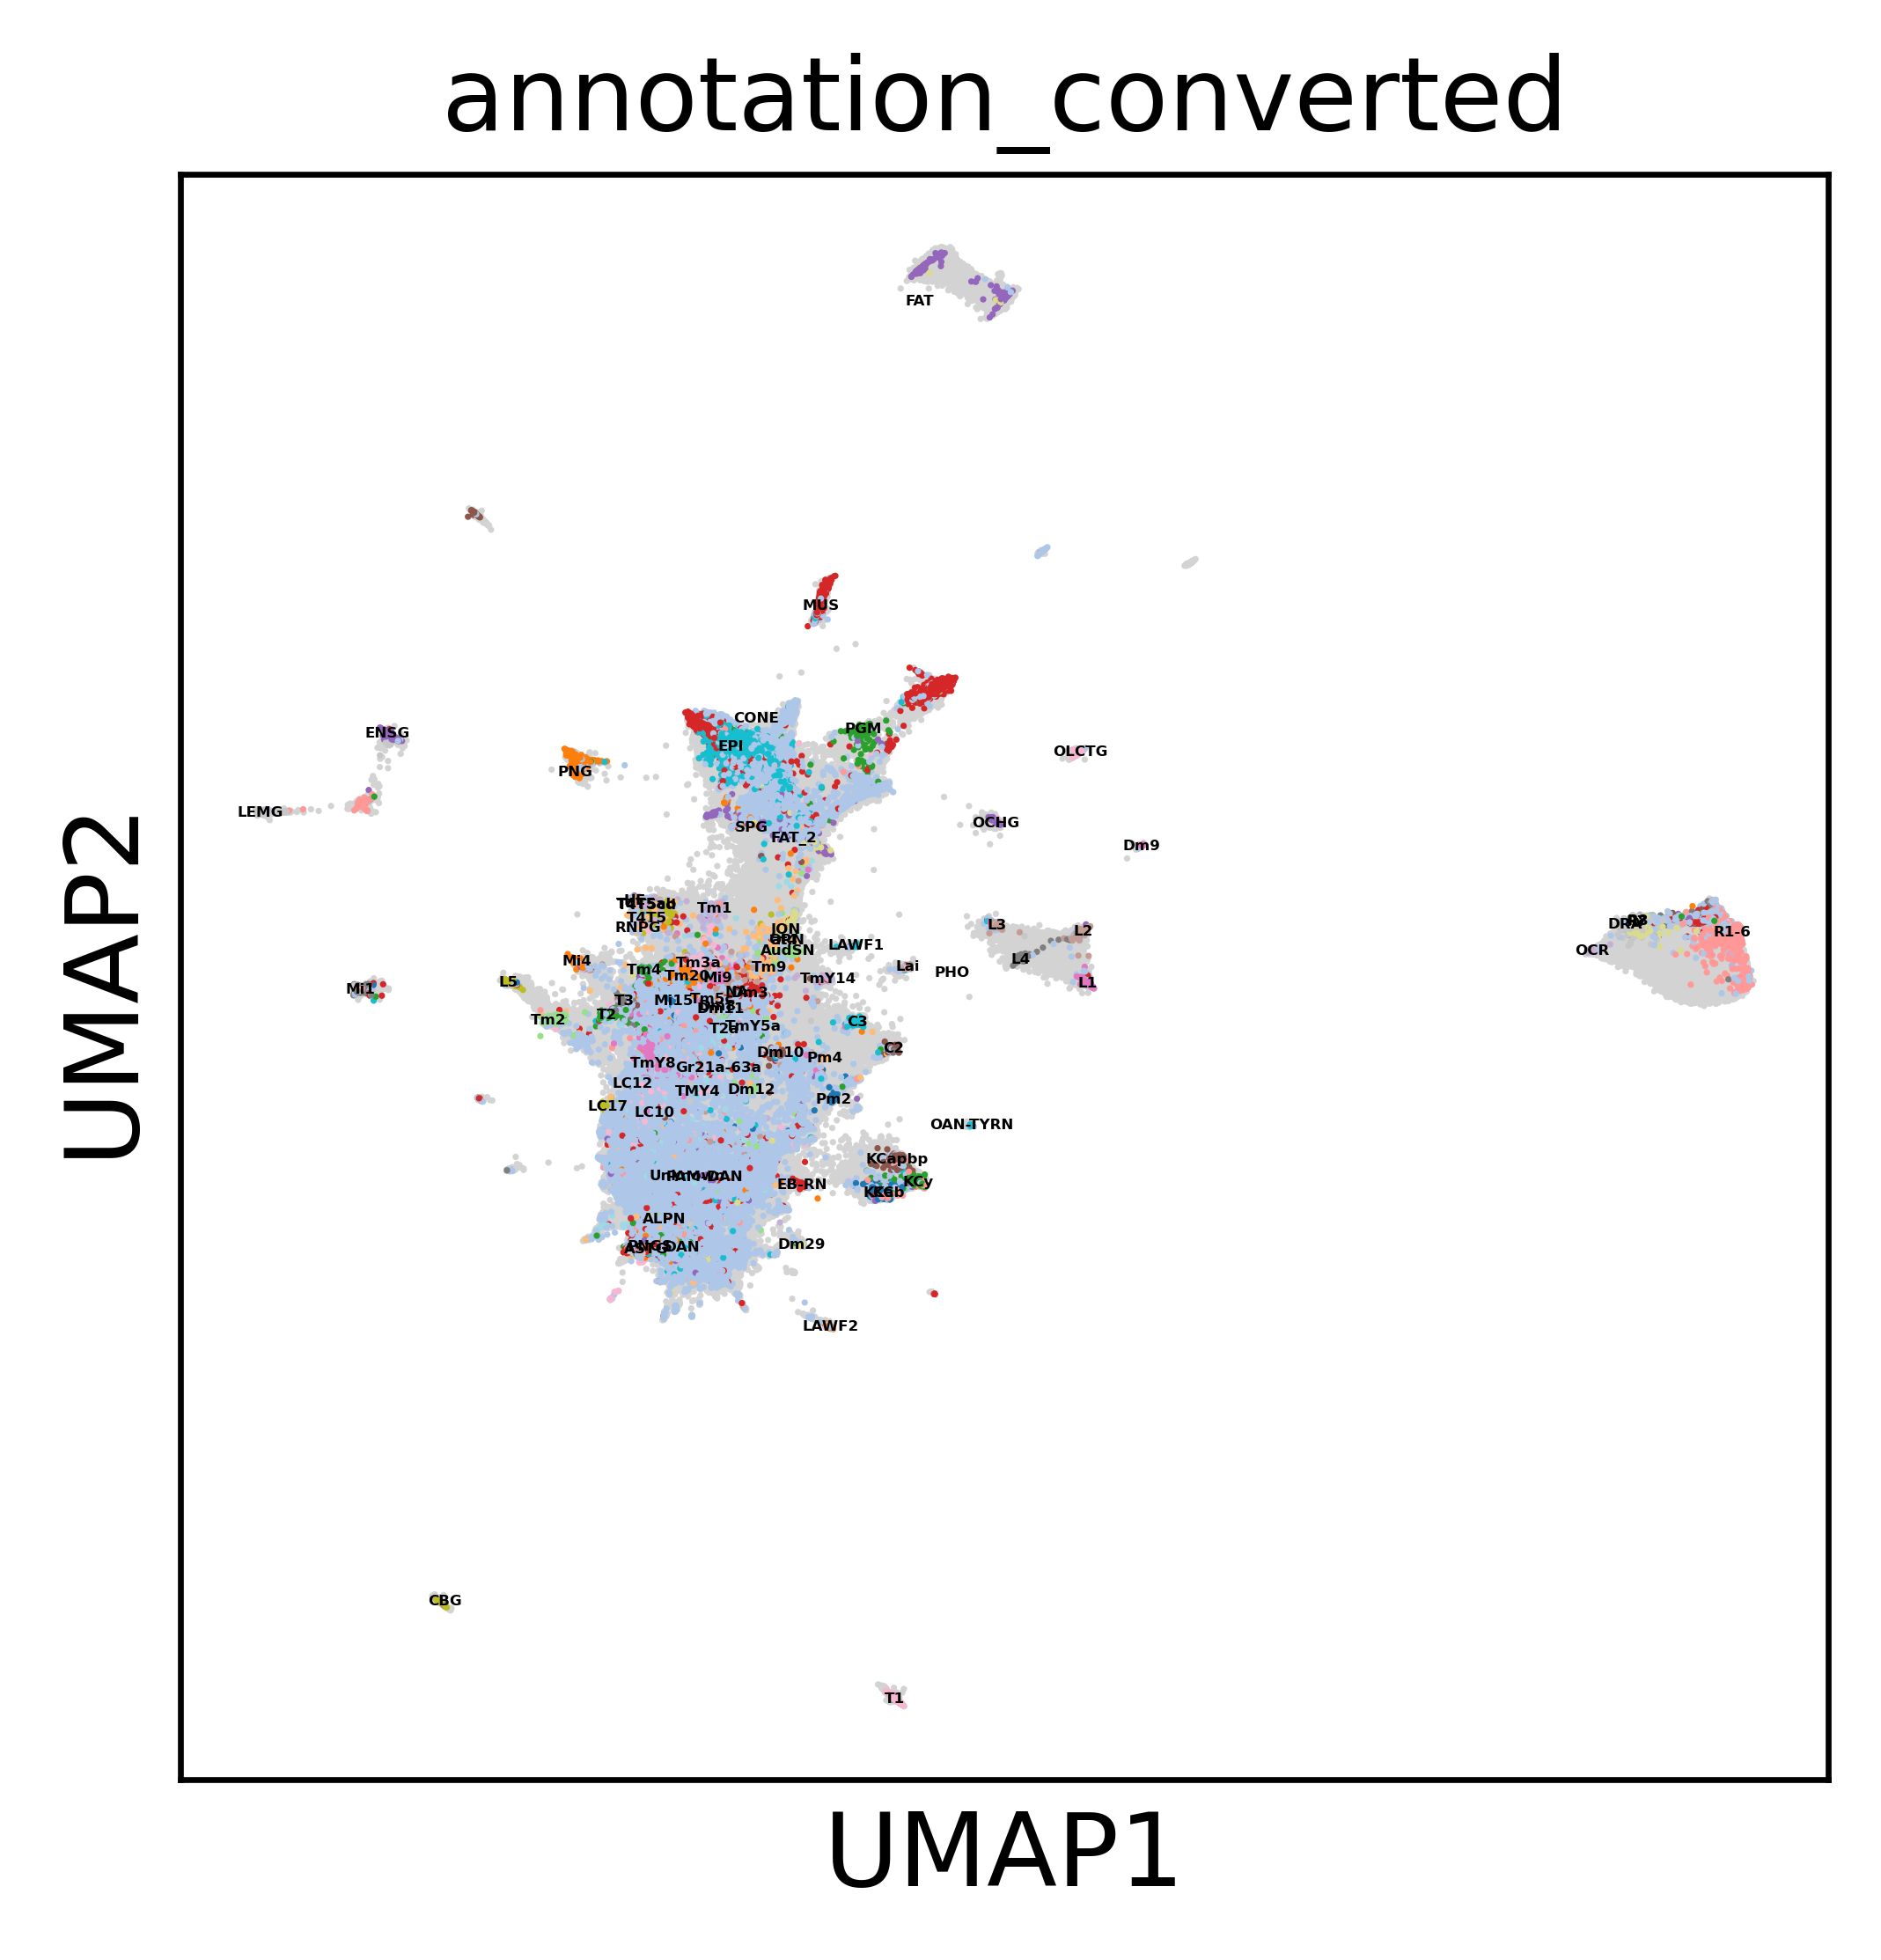

In [10]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique annotation labels
unique_annotations = integrated_adata.obs['annotation_converted'].unique()

# Generate a large set of distinct colors
num_colors = len(unique_annotations)
palette = sns.color_palette("tab20", num_colors)  # Use "tab20", "tab20b", "tab20c", or "hsv" for more colors
color_dict = dict(zip(unique_annotations, palette))

# Assign colors to annotation categories
integrated_adata.obs['annotation_converted'] = integrated_adata.obs['annotation_converted'].astype('string')
sc.pl.umap(integrated_adata, color='annotation_converted', palette=color_dict, legend_loc='on data', legend_fontsize=2, size = 3)


/ru-auth/local/home/pkim/miniconda3/envs/workshop_2024/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/ru-auth/local/home/pkim/miniconda3/envs/workshop_2024/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


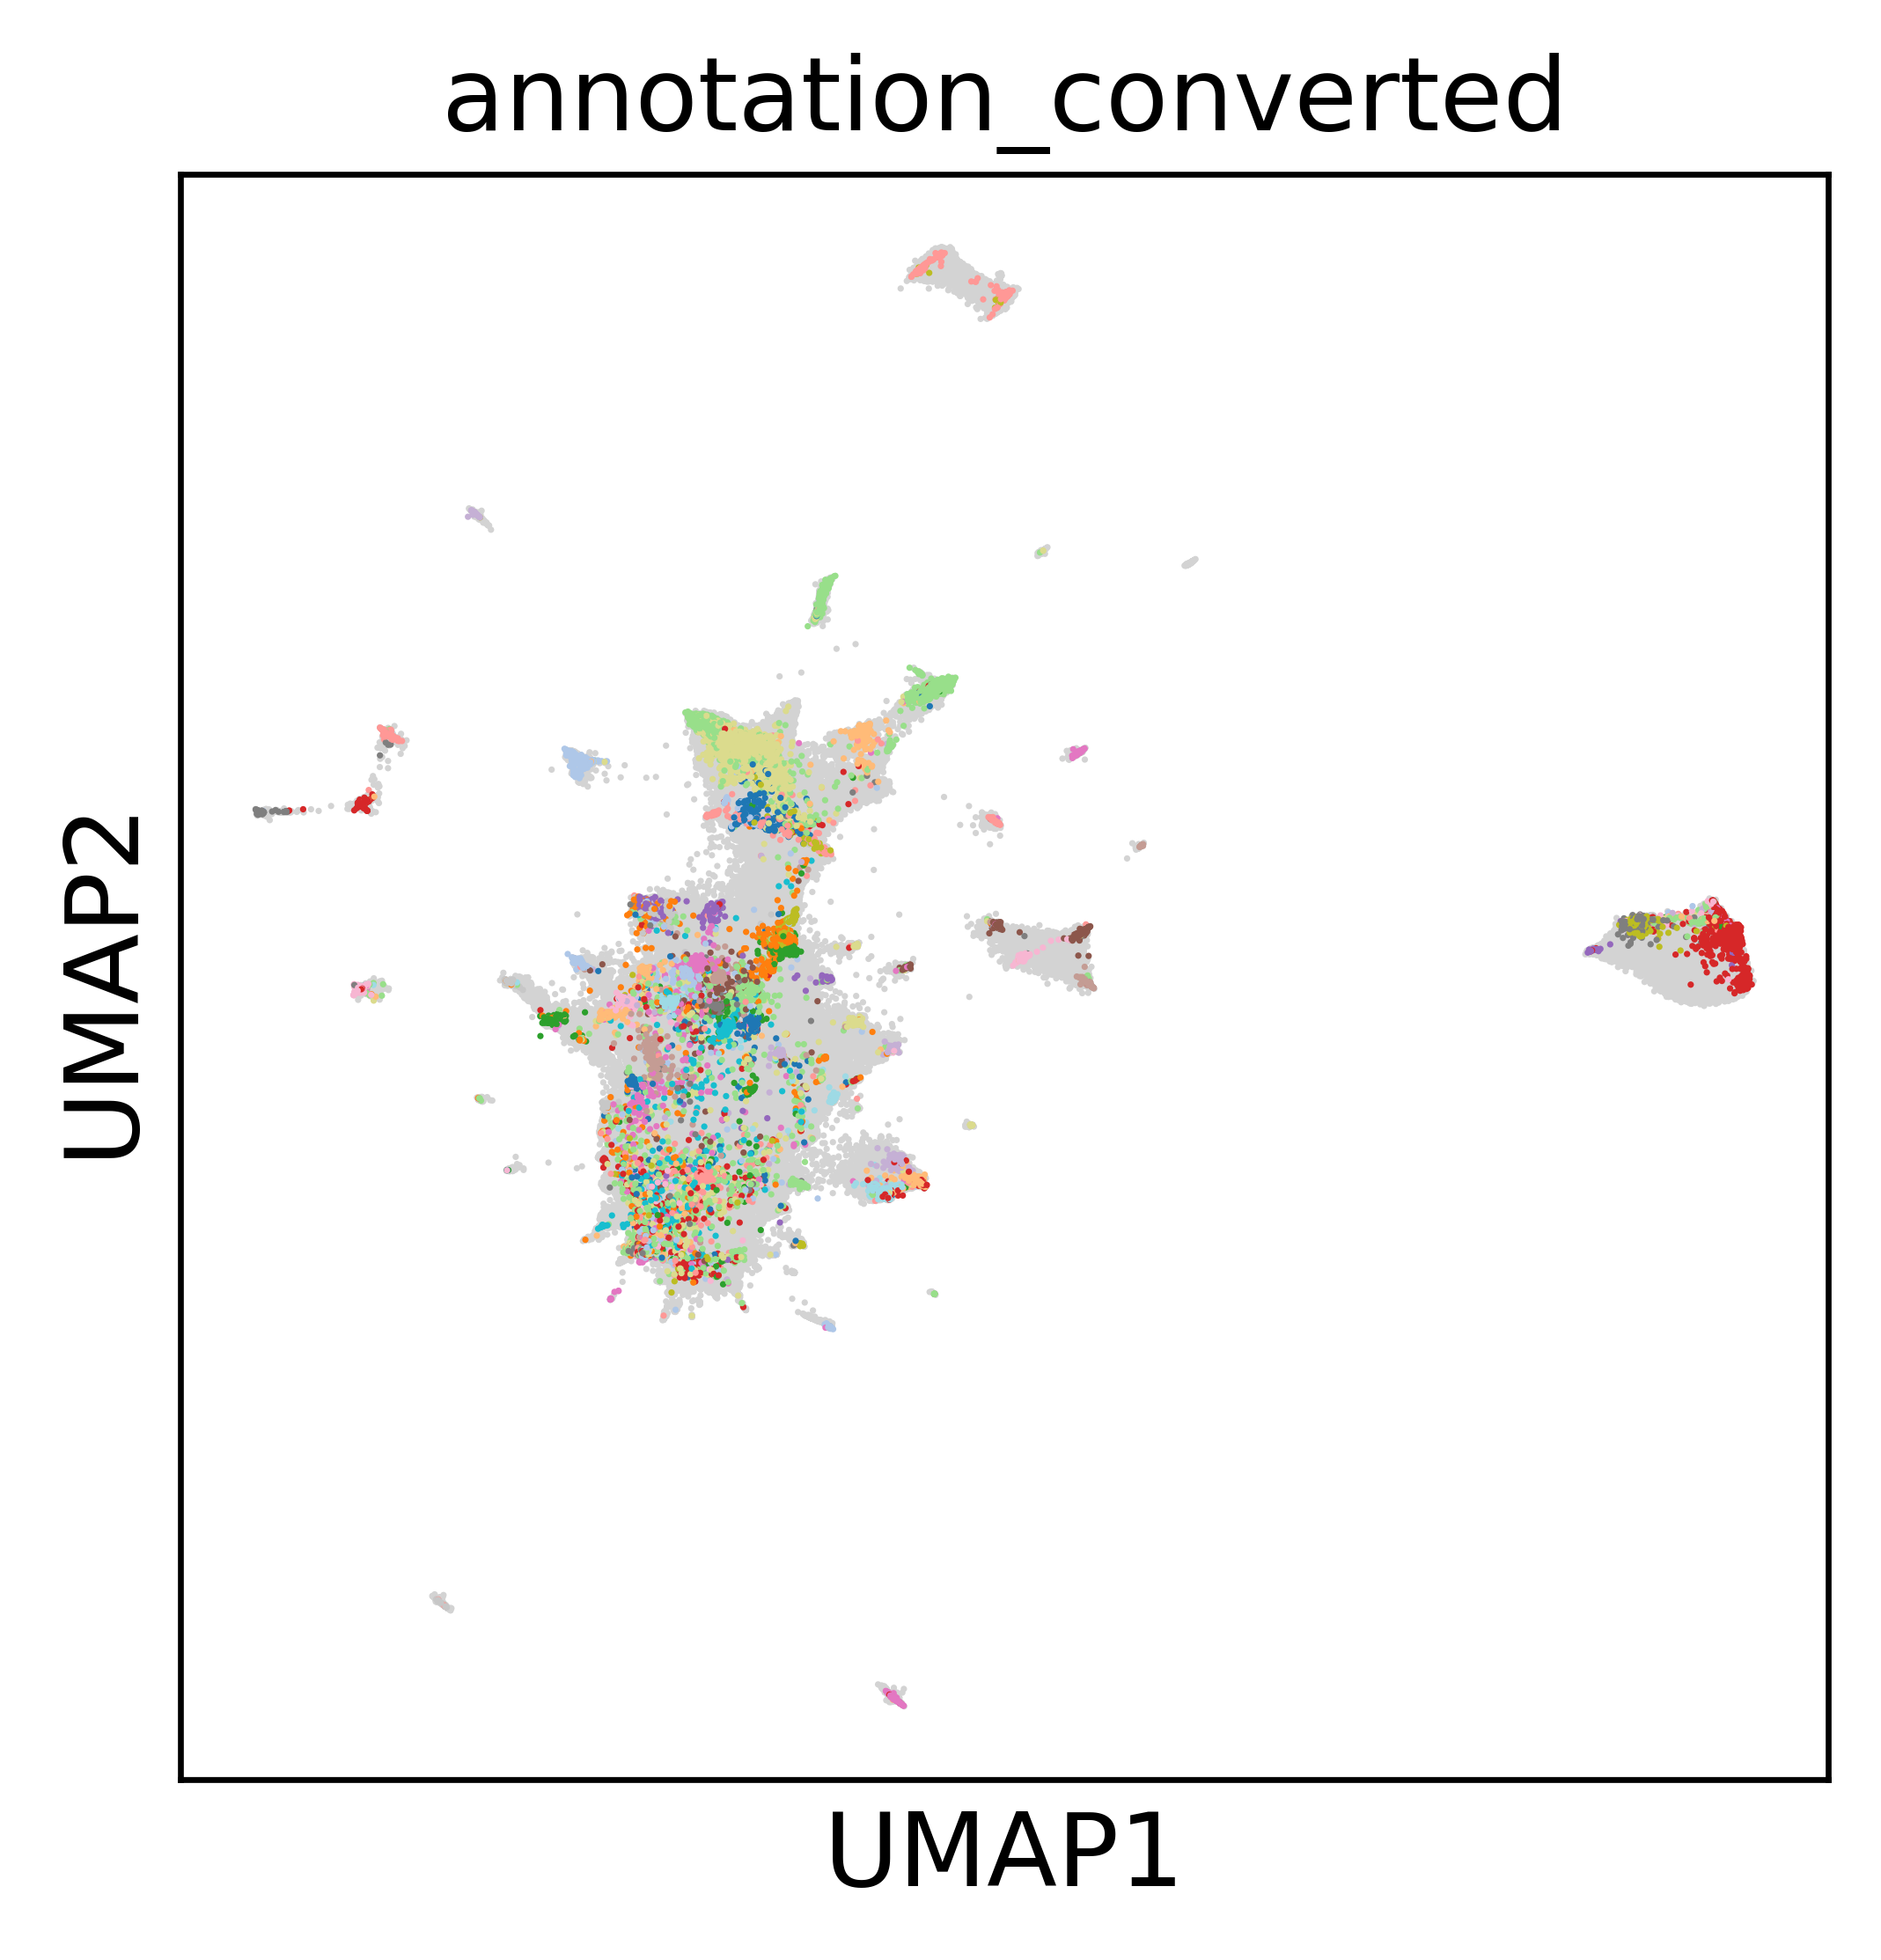

In [171]:
sc.pl.umap(integrated_adata, color = 'annotation_converted', legend_loc = 'none', legend_fontsize=2, size=3)

In [17]:
import numpy as np

integrated_adata.obs.loc[
    integrated_adata.obs['all_celltype'] == 'Unannotated', 
    'all_celltype'
] = np.nan


In [21]:
import numpy as np

integrated_adata.obs.loc[
    integrated_adata.obs['annotation_converted'] == 'Unknown', 
    'annotation_converted'
] = np.nan


In [8]:
import pandas as pd

def assign_main_class(adata, column_name='all_celltype'):
    """
    Adds a new column 'main_class' to an AnnData object based on simplified categories.
    """
    def map_to_main(label):
        if pd.isna(label):
            return 'Other'
        return main_class_map.get(label, 'Neuron')  # default to Neuron if not matched
    
    adata.obs['main_class'] = adata.obs[column_name].apply(map_to_main)
    return adata


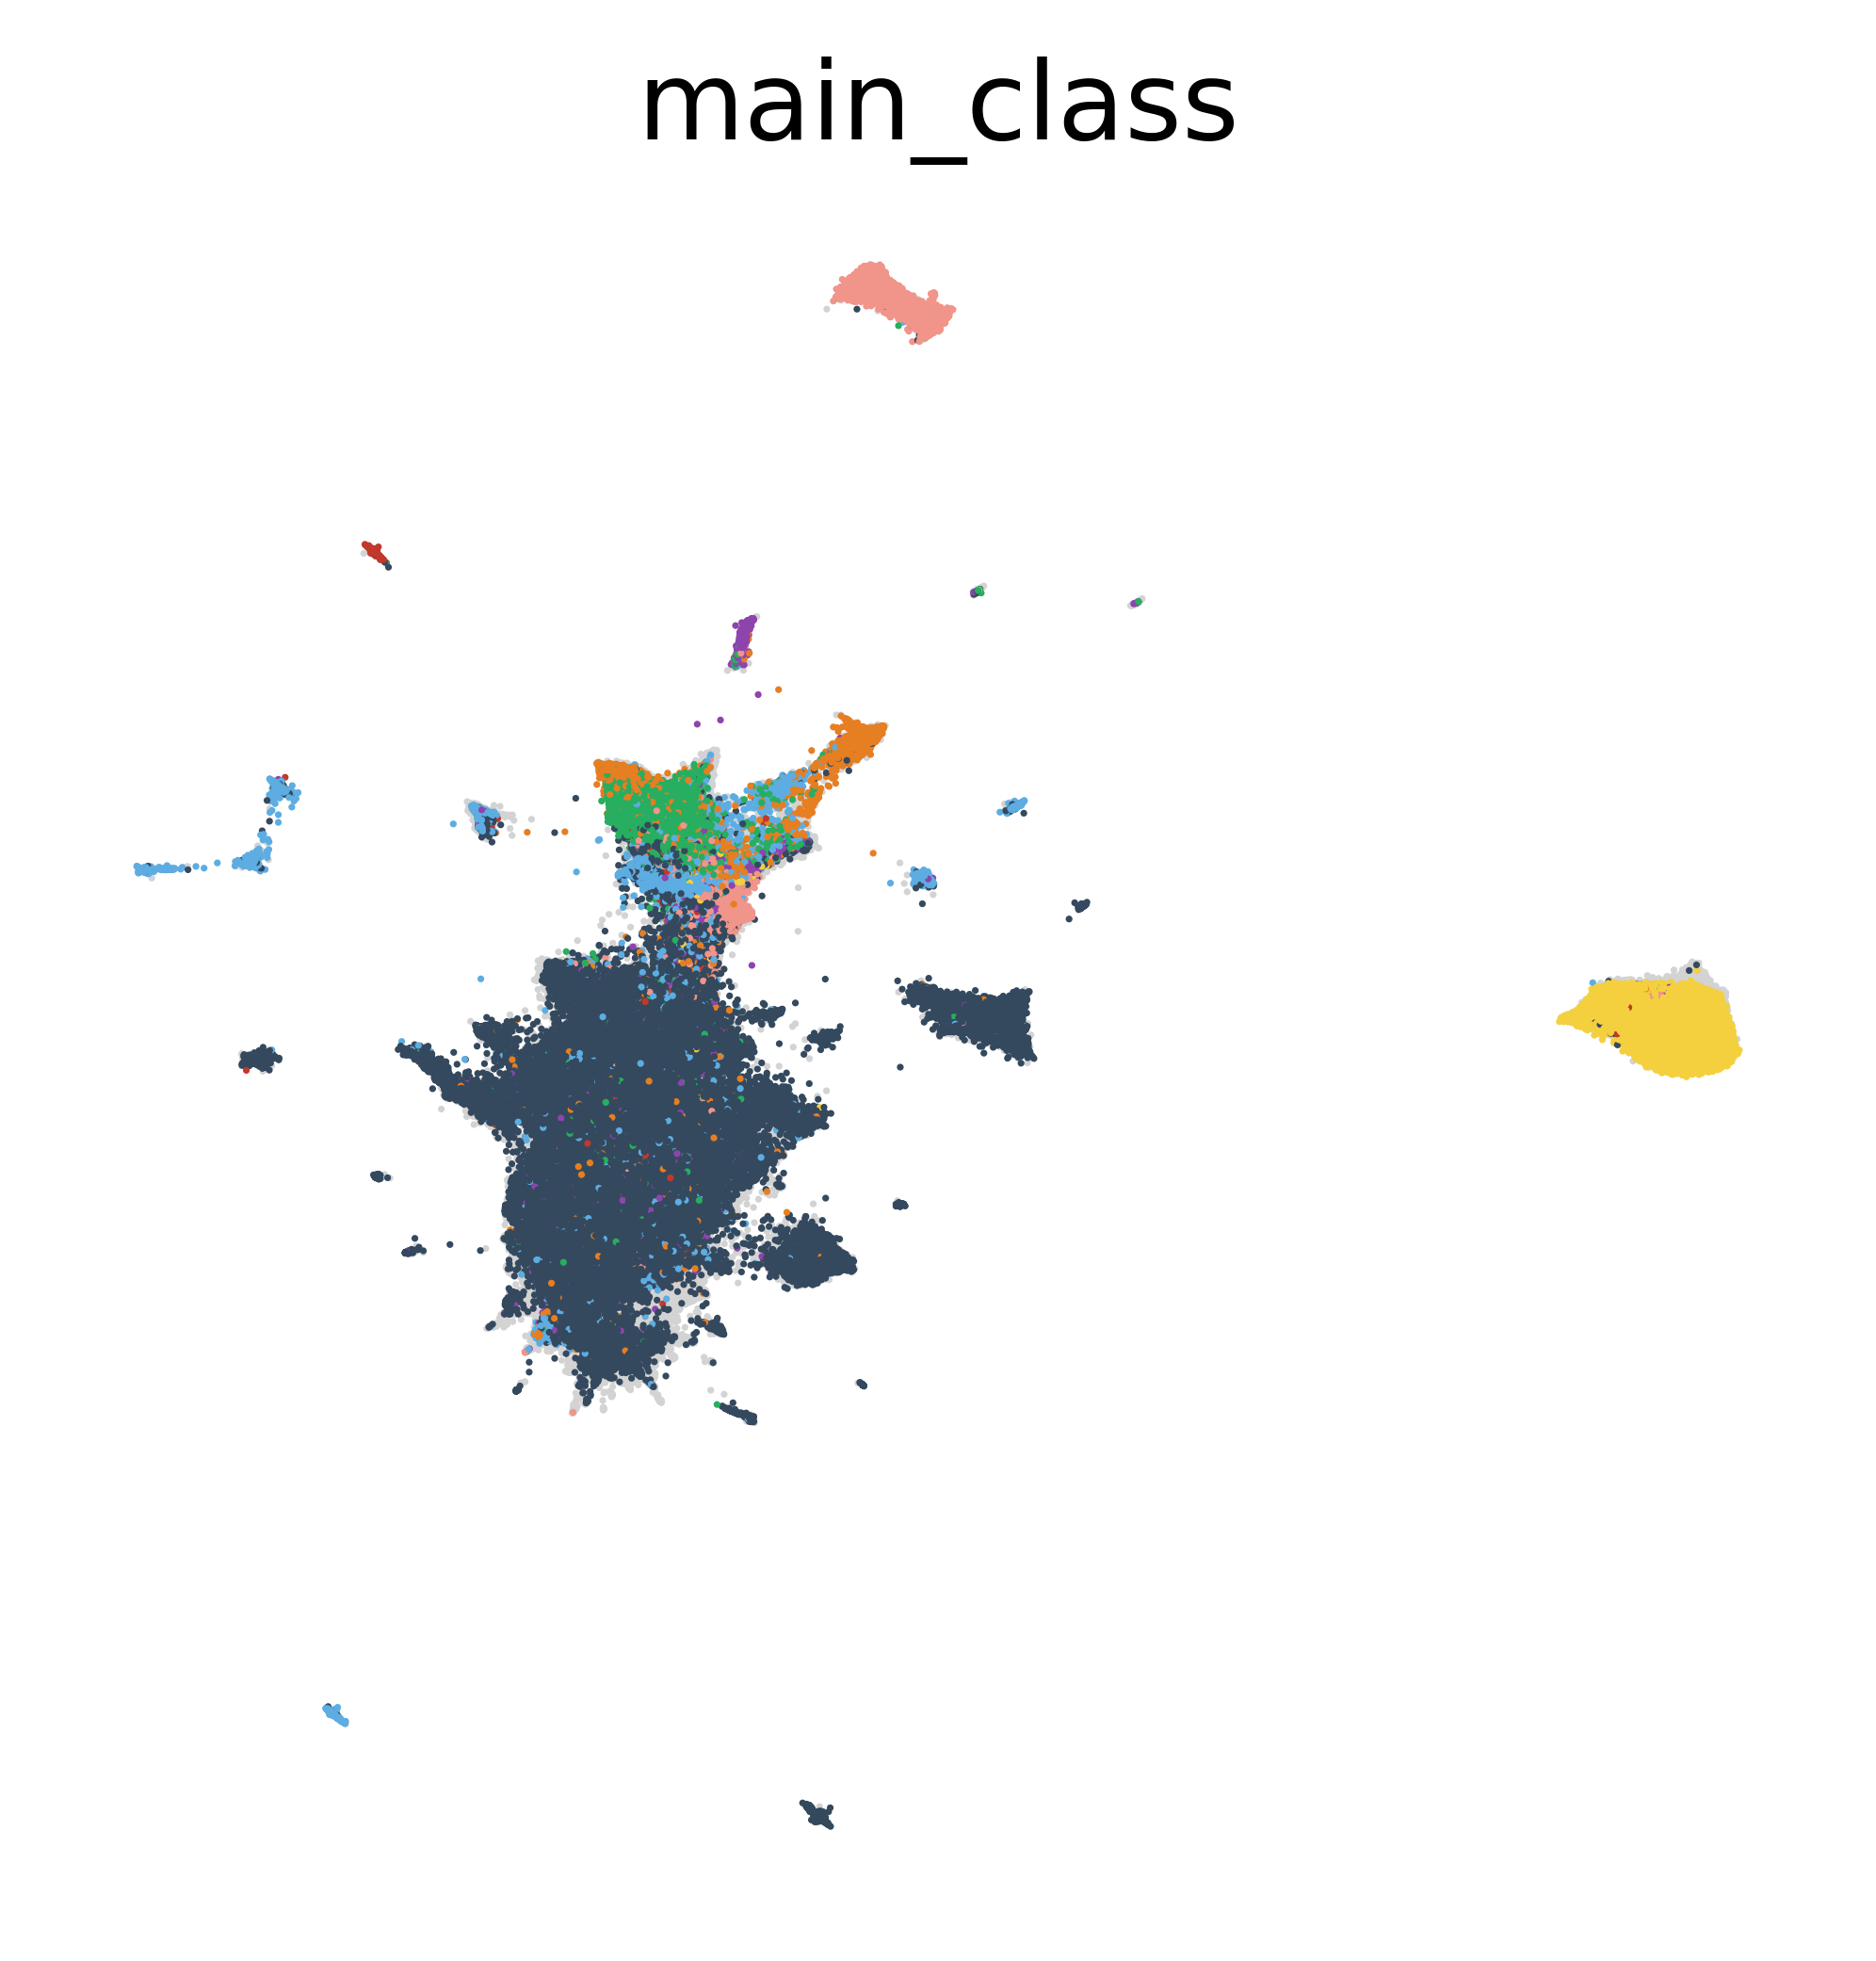

In [74]:
# Master mapping dictionary for both datasets
main_class_map = {
    # Photoreceptors
    'R1-6': 'Photoreceptor',
    'R7': 'Photoreceptor',
    'R8': 'Photoreceptor',
    'DRA': 'Photoreceptor',
    'OCR': 'Photoreceptor',

    # Cone
    'CONE-2': 'Cone',
    'CONE-1': 'Cone', 
    
    # Glia
    'SPG': 'Glia',
    'OCHG': 'Glia',
    'CHG': 'Glia',
    'PNG': 'Glia',
    'CG': 'Glia',
    'EG': 'Glia',
    'LEMG': 'Glia',
    'PGM': 'Glia',
    'ASTG': 'Glia',
    'ALG': 'Glia',

    # Fat
    'FAT-1': 'Fat',
    'FAT-2': 'Fat',

    #Epithelial
    'EPI': 'Epithelial',
    
    # Hemocytes
    'HE': 'Hemocytes',

    # Muscle
    'MUS': 'Muscle',

    # Neurons (catch-all for neuronal subtypes)
    'KC': 'Neuron',
    'KCy': 'Neuron',
    'KCab': 'Neuron',
    'KCapbp': 'Neuron',
    'ORN': 'Neuron', 
    'AudSN': 'Neuron', 
    'JON': 'Neuron', 
    'EB-RN': 'Neuron',
    'PAM-DAN': 'Neuron', 
    'DAN': 'Neuron',
    'SERN': 'Neuron',
    'OAN': 'Neuron',
    'OAN-TYRN': 'Neuron',
    'TYRN': 'Neuron',
    'Tm5a': 'Neuron',
    'Lai': 'Neuron',
    'TmY3': 'Neuron',
    'T4T5': 'Neuron',
    'TmY4': 'Neuron',
    'LC12': 'Neuron',
    'JON': 'Neuron',
    'T1': 'Neuron',
    'AL-PN': 'Neuron',
    'L3': 'Neuron', 
    'T4T5ab': 'Neuron',
    'LC17': 'Neuron',
    'LPLC2': 'Neuron',
    'Tm9': 'Neuron', 
    'LC4': 'Neuron',
    'TmY14': 'Neuron',
    'LC10a': 'Neuron',
    'Tm1': 'Neuron',
    'L2': 'Neuron',
    'EB-RN': 'Neuron',
    'Mi1': 'Neuron',
    'KCab': 'Neuron',
    'KCapbp': 'Neuron',
    'Mi15': 'Neuron',
    'Mi4': 'Neuron',
    'Mi9': 'Neuron',
    'T2': 'Neuron',
    'T2a': 'Neuron',
    'Tm2': 'Neuron', 
    'T4T5cd': 'Neuron',
    'CLKN': 'Neuron',
    'Dm9': 'Neuron',
    'Dm10': 'Neuron',
    'DAN': 'Neuron',
    'KCy': 'Neuron',
    'LAWF1': 'Neuron',
    'L5': 'Neuron',
    'T3': 'Neuron',
    'PAM-DAN': 'Neuron',
    'LC10b': 'Neuron',
    'L1': 'Neuron',
    'L4': 'Neuron',
    'ORN': 'Neuron',
    'PB': 'Neuron',
    'Dm3': 'Neuron',
    'LLPC1': 'Neuron',
    'Dm8': 'Neuron',
    'LPC1': 'Neuron',
    'LC14': 'Neuron',
    'TmY8': 'Neuron',
    'Tm4': 'Neuron',
    'LAWF2': 'Neuron',
    'dFB': 'Neuron',
    'Dm2': 'Neuron',
    'C3': 'Neuron',
    'LC16': 'Neuron',
    'LPLC1': 'Neuron',
    'C2': 'Neuron',
    'LC21': 'Neuron',
    'Dm12': 'Neuron',
    'TmY5a': 'Neuron',
    'Pm4': 'Neuron',
    'Tm20': 'Neuron',
    'AudSN': 'Neuron',
    'LC22-LPLC4': 'Neuron',
    'LC11': 'Neuron',
    'SERN': 'Neuron',
    'LC10d': 'Neuron',
    'Pm3': 'Neuron',
    'Dm4': 'Neuron',
    'LC18': 'Neuron', 
    'Dm11': 'Neuron',
    'LC6': 'Neuron',
    'Dm1': 'Neuron',
    'LC20': 'Neuron',
    'OAN': 'Neuron',
    'Pm2': 'Neuron',
    'Pm1': 'Neuron',
    'TYRN': 'Neuron',
    'Tm5c': 'Neuron',
    'LC13': 'Neuron',
    'DCN': 'Neuron',
    'Tm29': 'Neuron',

    # Miscellaneous / Unknown
    'Unannotated': 'Unannotated'
}

# Canonical order (same for both)
MAIN_CLASSES = [
    'Photoreceptor','Cone','Glia','Fat','Epithelial','Hemocytes','Muscle','Neuron','Unannotated'
]

MAIN_COLORS = {
    'Photoreceptor': '#F4D03F',
    'Cone':          '#E67E22',
    'Glia':          '#5DADE2',
    'Fat':           '#F1948A',
    'Epithelial':    '#27AE60',
    'Hemocytes':     '#C0392B',
    'Muscle':        '#8E44AD',
    'Neuron':        '#34495E',
    'Unannotated':   '#BDC3C7',
}

def assign_main_class(adata, column_name):
    def _map(lbl):
        if pd.isna(lbl):
            return 'Unannotated'
        return main_class_map.get(lbl, 'Unannotated')
    adata.obs['main_class'] = adata.obs[column_name].apply(_map)
    # Force identical category set/order in both objects
    adata.obs['main_class'] = pd.Categorical(adata.obs['main_class'], categories=MAIN_CLASSES, ordered=False)
    # Store the palette in the same order as MAIN_CLASSES
    adata.uns['main_class_colors'] = [MAIN_COLORS[c] for c in MAIN_CLASSES]
    return adata

# Apply to both datasets (using your chosen source column for each)
adata_1 = assign_main_class(integrated_adata.copy(), column_name='all_celltype')

# Ensure stable categories/colors across datasets
MAIN_CLASSES = ['Photoreceptor','Cone','Glia','Fat','Epithelial','Hemocytes','Muscle','Neuron','Unannotated']
adata_1.obs['main_class'] = pd.Categorical(adata_1.obs['main_class'].astype('object').fillna('Unannotated'),
                                           categories=MAIN_CLASSES, ordered=False)

# Build list of non-Unannotated groups actually present
keep = [c for c in MAIN_CLASSES if c != 'Unannotated' and (adata_1.obs['main_class'] == c).any()]

# 1) Unannotated first (background)
ax = sc.pl.umap(
    adata_1, color='main_class', groups=['Unannotated'],
    size=2, alpha=0.15, frameon=False, legend_loc=None, title='Dopp', show=False
)

# 2) Then overlay all other classes
sc.pl.umap(
    adata_1, color='main_class', groups=keep,
    size=3, alpha=1.0, frameon=False, legend_loc=None,
    ax=ax, show=True
)


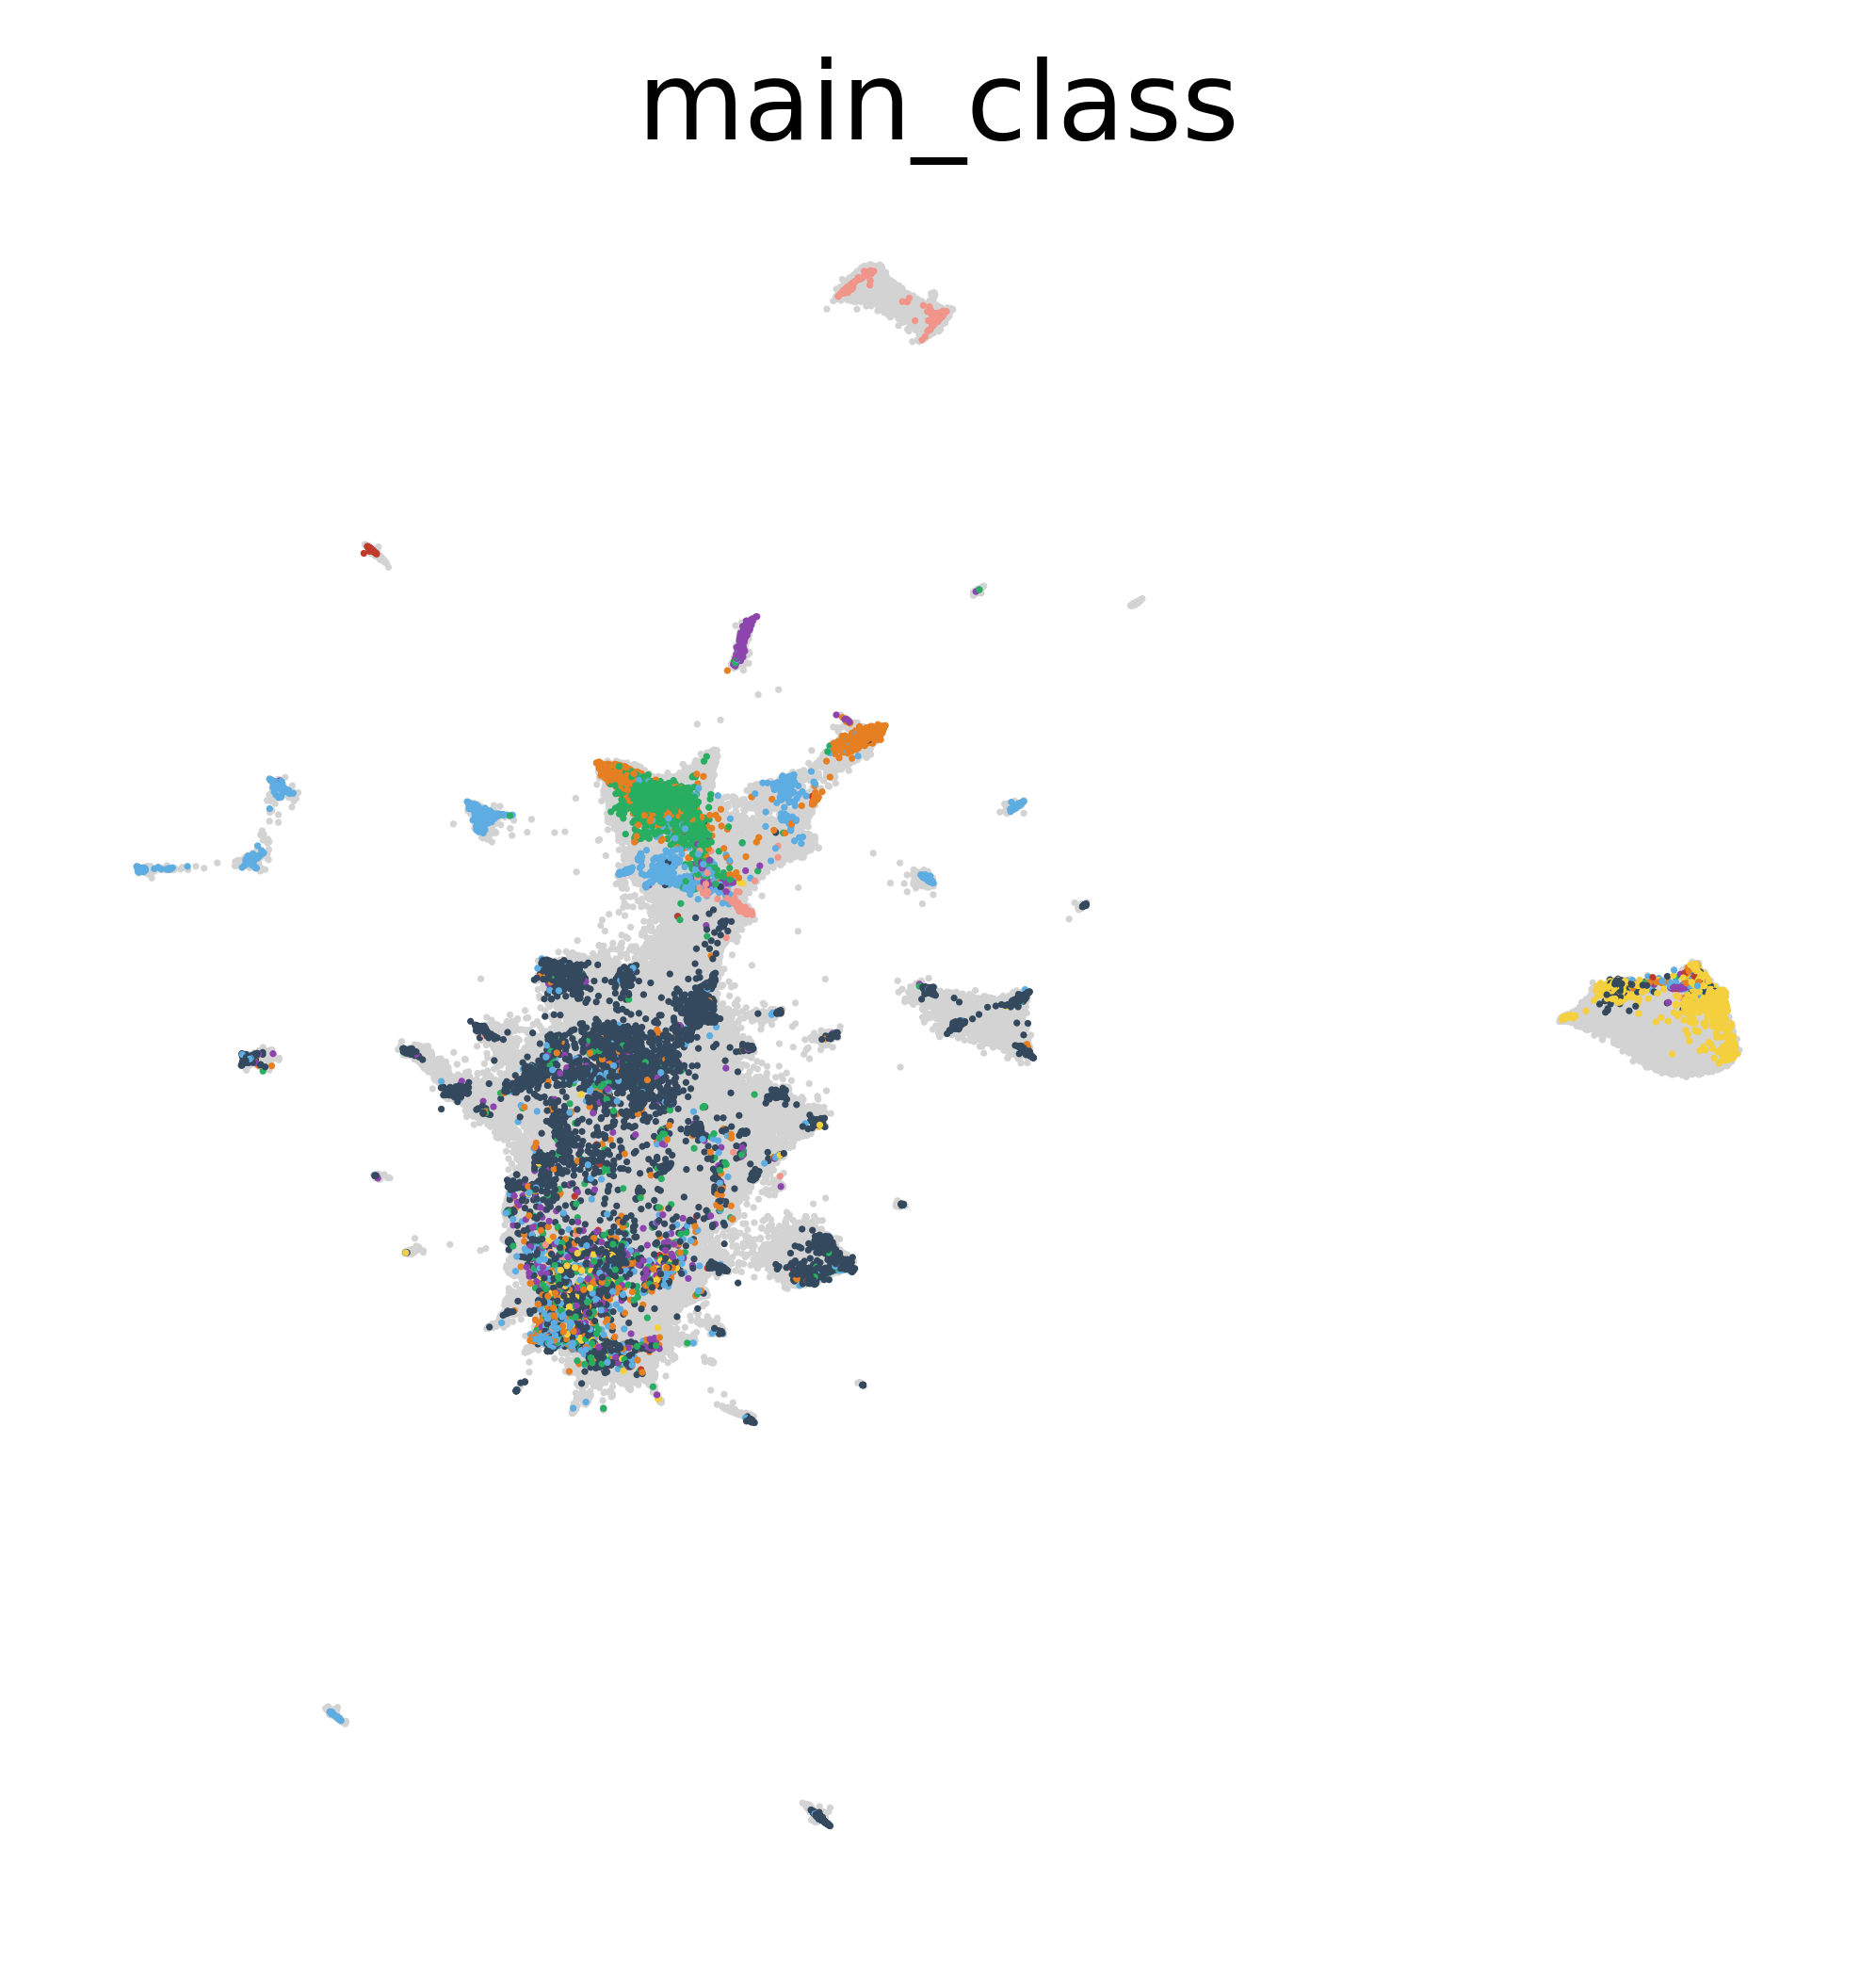

In [76]:
# Master mapping dictionary for both datasets


main_class_map = {
    # Photoreceptors
    'R1-6': 'Photoreceptor', 'R7': 'Photoreceptor', 'R8': 'Photoreceptor',
    'DRA': 'Photoreceptor', 'OCR': 'Photoreceptor', 'PHO': 'Photoreceptor',
    
    # Cone
    'CONE': 'Cone',
    'CONE-1':'Cone',
    'CONE-2':'Cone',
    
    # Glia
    'SPG': 'Glia', 'OCHG': 'Glia', 'CHG': 'Glia', 'PNG': 'Glia', 'RNPG': 'Glia', 'PNGS': 'Glia', 'ASTG': 'Glia',
    'CG': 'Glia', 'ENSG': 'Glia', 'LEMG': 'Glia', 'PGM': 'Glia', 'OLCTG': 'Glia', 'CBG': 'Glia',

    # Fat
    'FAT': 'Fat',
    'FAT-1': 'Fat',
    'FAT-2': 'Fat',

    #Epithelial
    'EPI': 'Epithelial',
    
    # Hemocytes
    'HE': 'Hemocytes',

    # Muscle
    'MUS': 'Muscle',
    
    # Neurons (catch-all for neuronal subtypes)
    'LAWF2': 'Neuron',
    'T4T5': 'Neuron',
    'KCy': 'Neuron',
    'AudSN': 'Neuron',
    'KCapbp': 'Neuron',
    'L2': 'Neuron',
    'TmY8': 'Neuron',
    'Mi1': 'Neuron',
    'Dm8': 'Neuron',
    'T4T5ab': 'Neuron',
    'T2a': 'Neuron',
    'KCab': 'Neuron',
    'Mi4': 'Neuron',
    'ORN': 'Neuron', 
    'T2': 'Neuron', 
    'Tm2': 'Neuron', 
    'Dm3': 'Neuron', 
    'KC': 'Neuron', 
    'T4T5cd': 'Neuron', 
    'Dm10': 'Neuron', 
    'L3': 'Neuron',
    'Mi9': 'Neuron', 
    'T1': 'Neuron', 
    'L4': 'Neuron', 
    'R8': 'Neuron', 
    'L5': 'Neuron', 
    'JON': 'Neuron', 
    'LAWF1': 'Neuron', 
    'TMY4': 'Neuron', 
    'Pm2': 'Neuron', 
    'LC12': 'Neuron', 
    'Tm9': 'Neuron', 
    'Dm12': 'Neuron', 
    'Tm1': 'Neuron',
    'C2': 'Neuron', 
    'Lai': 'Neuron', 
    'L1': 'Neuron', 
    'Tm3a': 'Neuron', 
    'T3': 'Neuron', 
    'C3': 'Neuron',
    'ALPN': 'Neuron',
    'Mi15': 'Neuron',
    'TmY5a': 'Neuron',
    'Tm20': 'Neuron',
    'Pm4': 'Neuron',
    'Tm4': 'Neuron',
    'Dm11': 'Neuron',
    'EB-RN': 'Neuron',
    'DAN': 'Neuron',
    'PAM-DAN': 'Neuron',
    'TmY14': 'Neuron', 
    'Tm5c': 'Neuron',
    'Dm9': 'Neuron',
    'LC10': 'Neuron',
    'LC17': 'Neuron',
    'Dm29': 'Neuron',
    'OAN-TYRN': 'Neuron',
    'at4': 'Neuron',
    'Gr21a-63a': 'Neuron',

    # Miscellaneous / Unknown
    'Unknown': 'Unannotated'
}


# Canonical order (same for both)
MAIN_CLASSES = [
    'Photoreceptor','Cone','Glia','Fat','Epithelial','Hemocytes','Muscle','Neuron','Unannotated'
]

MAIN_COLORS = {
    'Photoreceptor': '#F4D03F',
    'Cone':          '#E67E22',
    'Glia':          '#5DADE2',
    'Fat':           '#F1948A',
    'Epithelial':    '#27AE60',
    'Hemocytes':     '#C0392B',
    'Muscle':        '#8E44AD',
    'Neuron':        '#34495E',
    'Unannotated':   '#BDC3C7',
}

def assign_main_class(adata, column_name):
    def _map(lbl):
        if pd.isna(lbl):
            return 'Unannotated'
        return main_class_map.get(lbl, 'Unannotated')
    adata.obs['main_class'] = adata.obs[column_name].apply(_map)
    # Force identical category set/order in both objects
    adata.obs['main_class'] = pd.Categorical(adata.obs['main_class'], categories=MAIN_CLASSES, ordered=False)
    # Store the palette in the same order as MAIN_CLASSES
    adata.uns['main_class_colors'] = [MAIN_COLORS[c] for c in MAIN_CLASSES]
    return adata

# Apply to both datasets (using your chosen source column for each)
adata_2 = assign_main_class(integrated_adata.copy(), column_name='annotation_converted')

# Ensure stable categories/colors across datasets
MAIN_CLASSES = ['Photoreceptor','Cone','Glia','Fat','Epithelial','Hemocytes','Muscle','Neuron','Unannotated']
adata_2.obs['main_class'] = pd.Categorical(adata_2.obs['main_class'].astype('object').fillna('Unannotated'),
                                           categories=MAIN_CLASSES, ordered=False)

# Build list of non-Unannotated groups actually present
keep = [c for c in MAIN_CLASSES if c != 'Unannotated' and (adata_2.obs['main_class'] == c).any()]

# 1) Unannotated first (background)
ax = sc.pl.umap(
    adata_2, color='main_class', groups=['Unannotated'],
    size=2, alpha=0.15, frameon=False, legend_loc=None, title='Dopp', show=False
)

# 2) Then overlay all other classes
sc.pl.umap(
    adata_2, color='main_class', groups=keep,
    size=3, alpha=1.0, frameon=False, legend_loc=None,
    ax=ax, show=True
)


In [40]:
integrated_adata.obs['annotation_converted'] = (
    integrated_adata.obs['annotation_converted'].astype('string').replace('Unknown', 'Unannotated')
)
integrated_adata.obs['annotation_converted'] = (
    integrated_adata.obs['annotation_converted'].astype('string').replace('OLCTG', 'Unannotated')
)
integrated_adata.obs['annotation_converted'] = (
    integrated_adata.obs['annotation_converted'].astype('string').replace('SPG', 'Unannotated')
)
integrated_adata.obs['annotation_converted'] = (
    integrated_adata.obs['annotation_converted'].astype('string').replace('ENSG', 'EG')
)
integrated_adata.obs['annotation_converted'] = (
    integrated_adata.obs['annotation_converted'].astype('string').replace('FAT_2', 'FAT')
)
integrated_adata.obs['annotation_converted'] = (
    integrated_adata.obs['annotation_converted'].astype('string').replace('ALPN', 'AL-PN')
)
integrated_adata.obs['annotation_converted'] = (
    integrated_adata.obs['annotation_converted'].astype('string').replace('PHO', 'Unannotated')
)
integrated_adata.obs['annotation_converted'] = (
    integrated_adata.obs['annotation_converted'].astype('string').replace('at4', 'Unannotated')
)
integrated_adata.obs['annotation_converted'] = (
    integrated_adata.obs['annotation_converted'].astype('string').replace('Gr21a-63a', 'Unannotated')
)
integrated_adata.obs['annotation_converted'] = (
    integrated_adata.obs['annotation_converted'].astype('string').replace('PNGS', 'Unannotated')
)
integrated_adata.obs['annotation_converted'] = (
    integrated_adata.obs['annotation_converted'].astype('string').replace('ASTG', 'ALG')
)
#integrated_adata.obs['annotation_converted'] = (
#    integrated_adata.obs['annotation_converted'].astype('string').replace('Unannotated', np.nan)
#)

In [41]:
integrated_adata.obs['all_celltype'] = (
    integrated_adata.obs['all_celltype'].astype('string').replace('CONE-1', 'CONE')
)
integrated_adata.obs['all_celltype'] = (
    integrated_adata.obs['all_celltype'].astype('string').replace('CONE-2', 'CONE')
)
integrated_adata.obs['all_celltype'] = (
    integrated_adata.obs['all_celltype'].astype('string').replace('FAT-1', 'FAT')
)
integrated_adata.obs['all_celltype'] = (
    integrated_adata.obs['all_celltype'].astype('string').replace('FAT-2', 'FAT')
)
integrated_adata.obs['all_celltype'] = (
    integrated_adata.obs['all_celltype'].astype('string').replace('DCN', 'Unannotated')
)
#integrated_adata.obs['all_celltype'] = (
#    integrated_adata.obs['all_celltype'].astype('string').replace('Unannotated', np.nan)
#)



In [39]:
integrated_adata = sc.read_h5ad('/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:01:31/fca_adata_integrated_2.h5ad')

In [77]:
#integrated_adata.write_h5ad('/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:01:31/fca_adata_integrated_2.h5ad')

# OZEL

In [78]:
ozel = sc.read_h5ad("/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2024:10:11/ozel.h5ad")

In [79]:
# Identify mitochondrial genes
ozel.var['mt'] = ozel.var_names.str.startswith('mt:')
ozel.var['tRNA'] = ozel.var_names.str.contains('tRNA')
ozel.var['ribo'] = ozel.var_names.str.contains('rRNA')

In [80]:
# Normalize and log-transform `ozel`
sc.pp.normalize_total(ozel, target_sum=1e4)
sc.pp.log1p(ozel)

# Identify highly variable genes for `ozel`
sc.pp.highly_variable_genes(ozel, flavor='seurat', n_top_genes=5000, inplace=True)

# Identify genes to exclude from common gene selection
excluded_genes = set(adata.var_names[adata.var['mt'] | adata.var['tRNA'] | adata.var['ribo']]) | \
                 set(ozel.var_names[ozel.var['mt'] | ozel.var['tRNA'] | ozel.var['ribo']])

# Get the original common genes based on highly variable genes
common_genes = list(set(adata.var_names[adata.var['highly_variable']]) &
                    set(ozel.var_names[ozel.var['highly_variable']]))

# Remove excluded genes from common genes
common_genes = list(set(common_genes) - excluded_genes)


/ru-auth/local/home/pkim/miniconda3/envs/workshop_2024/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


In [81]:
adata_subset = adata[:, common_genes]
ozel_subset = ozel[:, common_genes]


In [74]:
len(common_genes)

1682

In [82]:
# Concatenate adata and ozel after subsetting to common genes
import anndata as ad
combined_adata_ozel = ad.concat([adata_subset, ozel_subset], axis=0, join='outer', label='dataset', keys=['adata', 'ozel'])

# Prepare dataset list for Scanorama
adata_ozel_list = [combined_adata_ozel[combined_adata_ozel.obs['dataset'] == batch] for batch in combined_adata_ozel.obs['dataset'].unique()]

# Integrate using Scanorama
import scanorama
integrated_ozel_data = scanorama.correct_scanpy(adata_ozel_list, return_dimred=True)


Found 1686 genes among all datasets
[[0.         0.35403625]
 [0.         0.        ]]
Processing datasets (0, 1)


In [83]:
# Combine the integrated Scanorama datasets
integrated_ozel_adata = ad.concat(
    integrated_ozel_data,
    axis=0,
    label='dataset',
    keys=combined_adata_ozel.obs['dataset'].unique(),
    merge='same'
)

# Assign Scanorama embeddings
integrated_ozel_adata.obsm['X_scanorama'] = np.vstack([a.obsm['X_scanorama'] for a in integrated_ozel_data])


In [84]:
sc.tl.pca(integrated_ozel_adata, n_comps=120, svd_solver='arpack')
sc.pp.neighbors(integrated_ozel_adata, n_neighbors=50, n_pcs=120)
sc.tl.umap(integrated_ozel_adata, min_dist=0.01)

In [84]:
sc.set_figure_params(dpi = 300)

/ru-auth/local/home/pkim/miniconda3/envs/workshop_2024/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/ru-auth/local/home/pkim/miniconda3/envs/workshop_2024/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


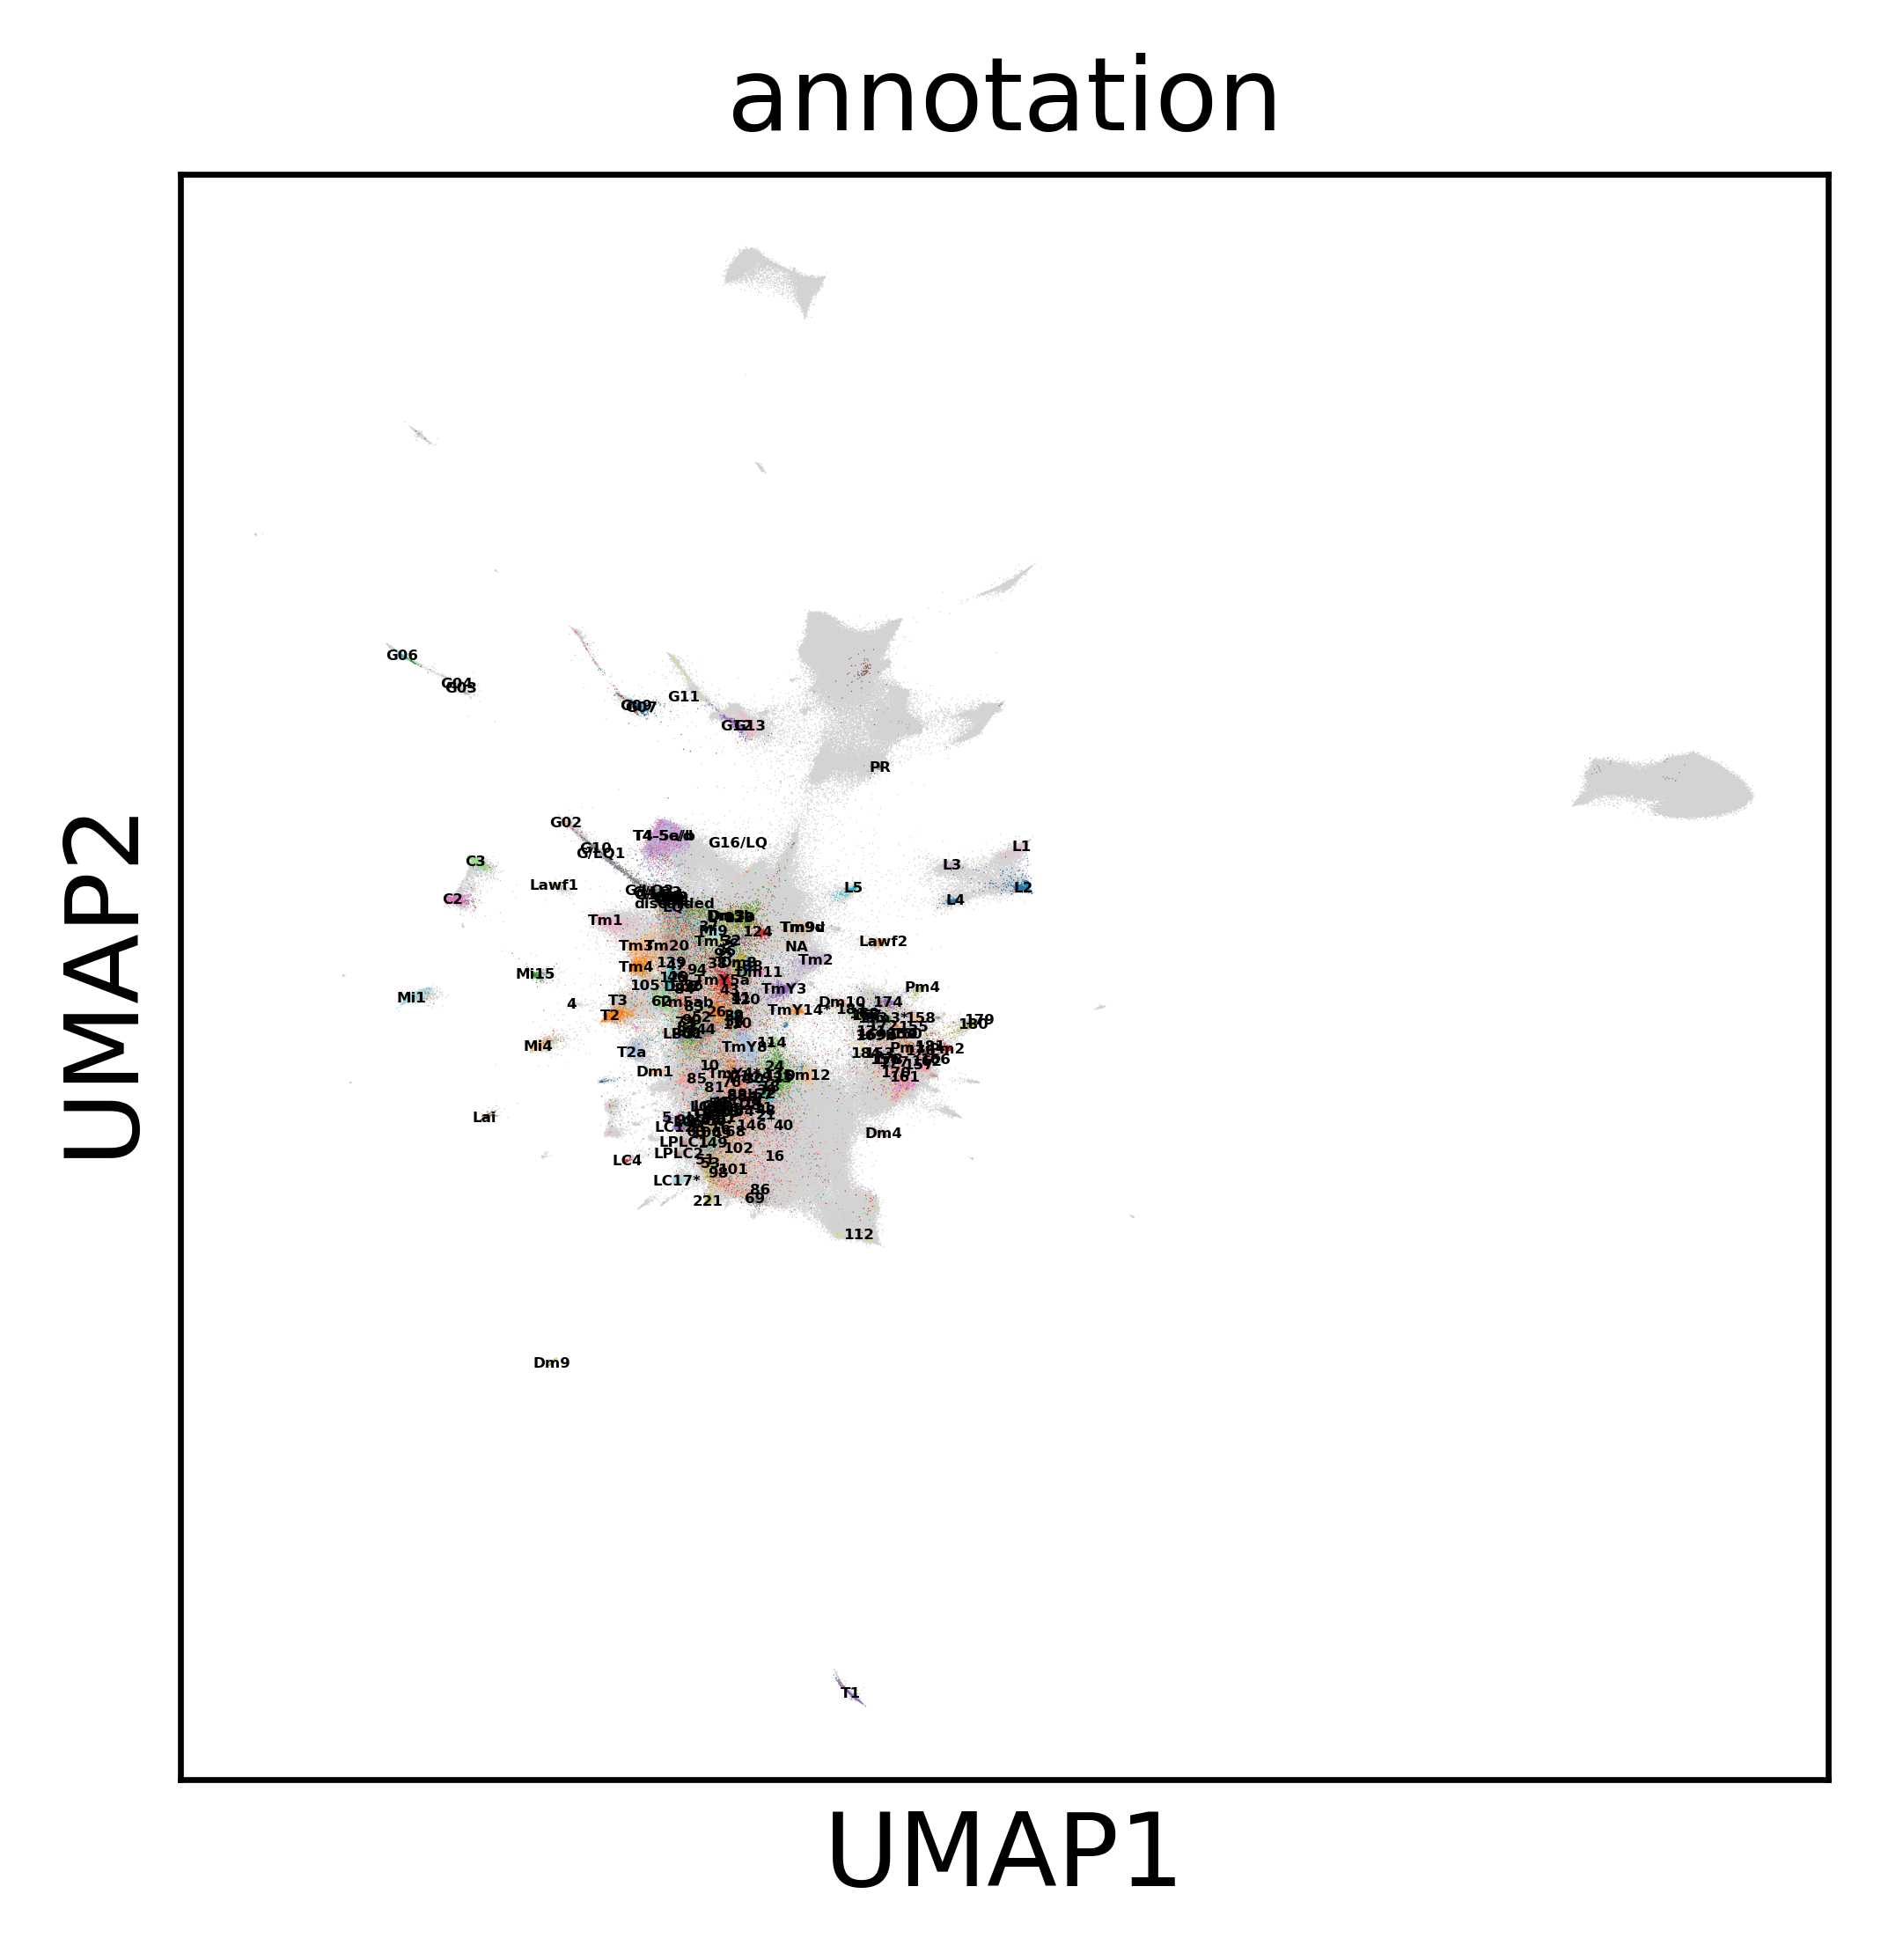

In [86]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique annotation labels
unique_annotations = integrated_ozel_adata.obs['annotation'].unique()

# Generate a large set of distinct colors
num_colors = len(unique_annotations)
palette = sns.color_palette("tab20", num_colors)  # Use "tab20", "tab20b", "tab20c", or "hsv" for more colors
color_dict = dict(zip(unique_annotations, palette))

# Assign colors to annotation categories
sc.pl.umap(integrated_ozel_adata, color='annotation', palette=color_dict, legend_loc='on data', legend_fontsize=2)


/ru-auth/local/home/pkim/miniconda3/envs/workshop_2024/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/ru-auth/local/home/pkim/miniconda3/envs/workshop_2024/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


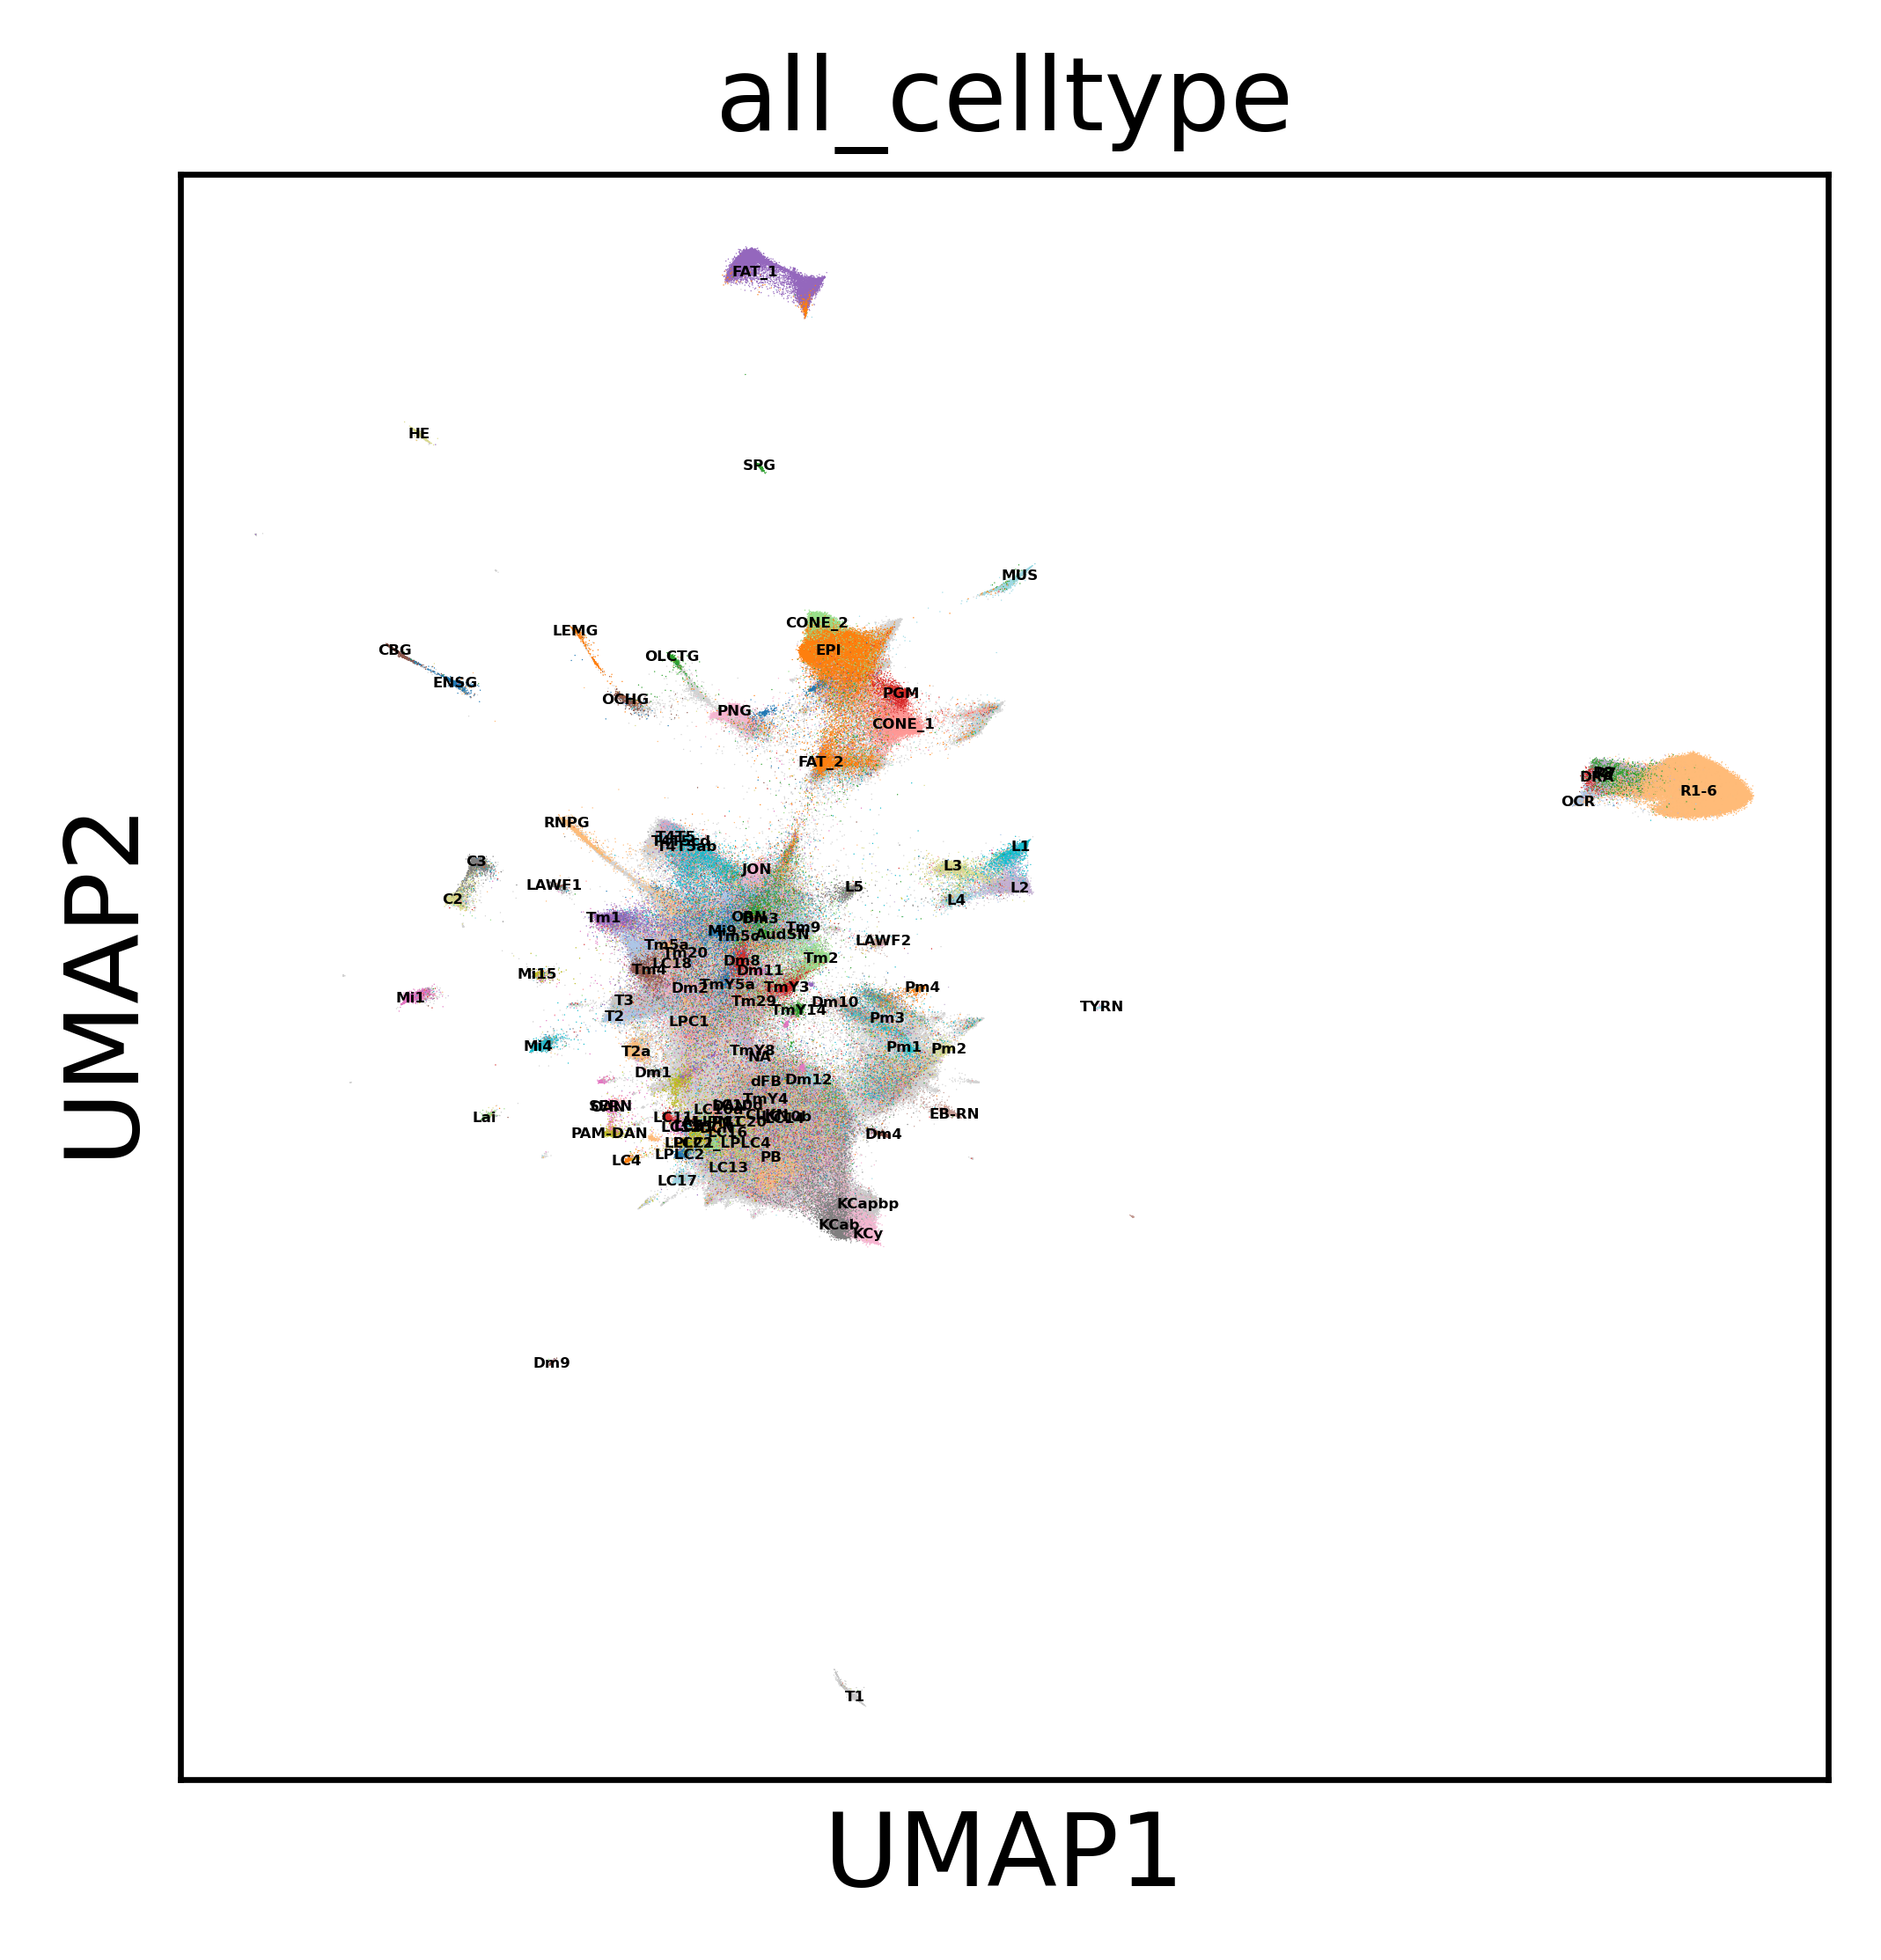

In [88]:
sc.pl.umap(integrated_ozel_adata, color = 'all_celltype', legend_loc = 'on data', legend_fontsize=2)

In [97]:
adata = integrated_ozel_adata.copy()

In [39]:
import pandas as pd

# Ensure sample names are aligned
matching_barcodes = adata.obs['sample'][adata.obs['sample'].isin(bdata.obs_names)]

# Create a mapping from integrated_ozel_adata to adata
barcode_to_annotation = bdata.obs['annotation'].reindex(matching_barcodes.index)

# Assign the new annotations to adata.obs
adata.obs.loc[barcode_to_annotation.index, 'ozel_3'] = barcode_to_annotation


In [24]:
import numpy as np
# Convert integer-like strings to NaN
integrated_ozel_adata.obs['annotation_converted'] = integrated_ozel_adata.obs['annotation_converted'].apply(
    lambda x: np.nan if str(x).isdigit() else x
)
# Convert to categorical, ensuring NaNs are handled correctly
integrated_ozel_adata.obs['annotation_converted'] = pd.Categorical(
    integrated_ozel_adata.obs['annotation_converted']
)

In [20]:
integrated_ozel_adata.obs['annotation_converted'] = integrated_ozel_adata.obs['annotation_converted'].astype("category")

In [99]:
print(integrated_ozel_adata.obs['all_celltype'].unique().tolist())
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['all_celltype'] == 'Unannotated', 'all_celltype'] = np.nan

['Unannotated', 'Tm5a', 'R1-6', 'R7', 'Lai', 'TmY3', 'CONE-1', 'EPI', 'FAT-1', 'T4T5', 'OCHG', 'TmY4', 'LC12', 'JON', 'T1', 'AL-PN', 'L3', 'T4T5ab', 'LC17', 'LPLC2', 'Tm9', 'LC4', 'ALG', 'TmY14', 'CONE-2', 'PGM', 'LC10a', 'Tm1', 'L2', 'CG', 'EB-RN', 'Mi1', 'KCab', 'KCapbp', 'Mi15', 'HE', 'Mi4', 'MUS', 'Mi9', 'T2', 'FAT-2', 'T2a', 'SPG', 'Tm2', 'DRA', 'T4T5cd', 'CLKN', 'R8', 'Dm9', 'Dm10', 'DAN', 'KCy', 'LAWF1', 'L5', 'T3', 'PAM-DAN', 'PNG', 'LC10b', 'L1', 'L4', 'EG', 'ORN', 'PB', 'Dm3', 'LLPC1', 'Dm8', 'LPC1', 'CHG', 'LC14', 'TmY8', 'Tm4', 'LAWF2', 'dFB', 'Dm2', 'C3', 'LC16', 'LPLC1', 'C2', 'LEMG', 'LC21', 'Dm12', 'TmY5a', 'OCR', 'Pm4', 'Tm20', 'AudSN', 'LC22-LPLC4', 'LC11', 'SERN', 'LC10d', 'Pm3', 'Dm4', 'LC18', 'Dm11', 'LC6', 'Dm1', 'LC20', 'OAN', 'Pm2', 'Pm1', 'TYRN', 'Tm5c', 'LC13', 'DCN', 'Tm29', nan]


/ru-auth/local/home/pkim/miniconda3/envs/workshop_2024/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/ru-auth/local/home/pkim/miniconda3/envs/workshop_2024/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


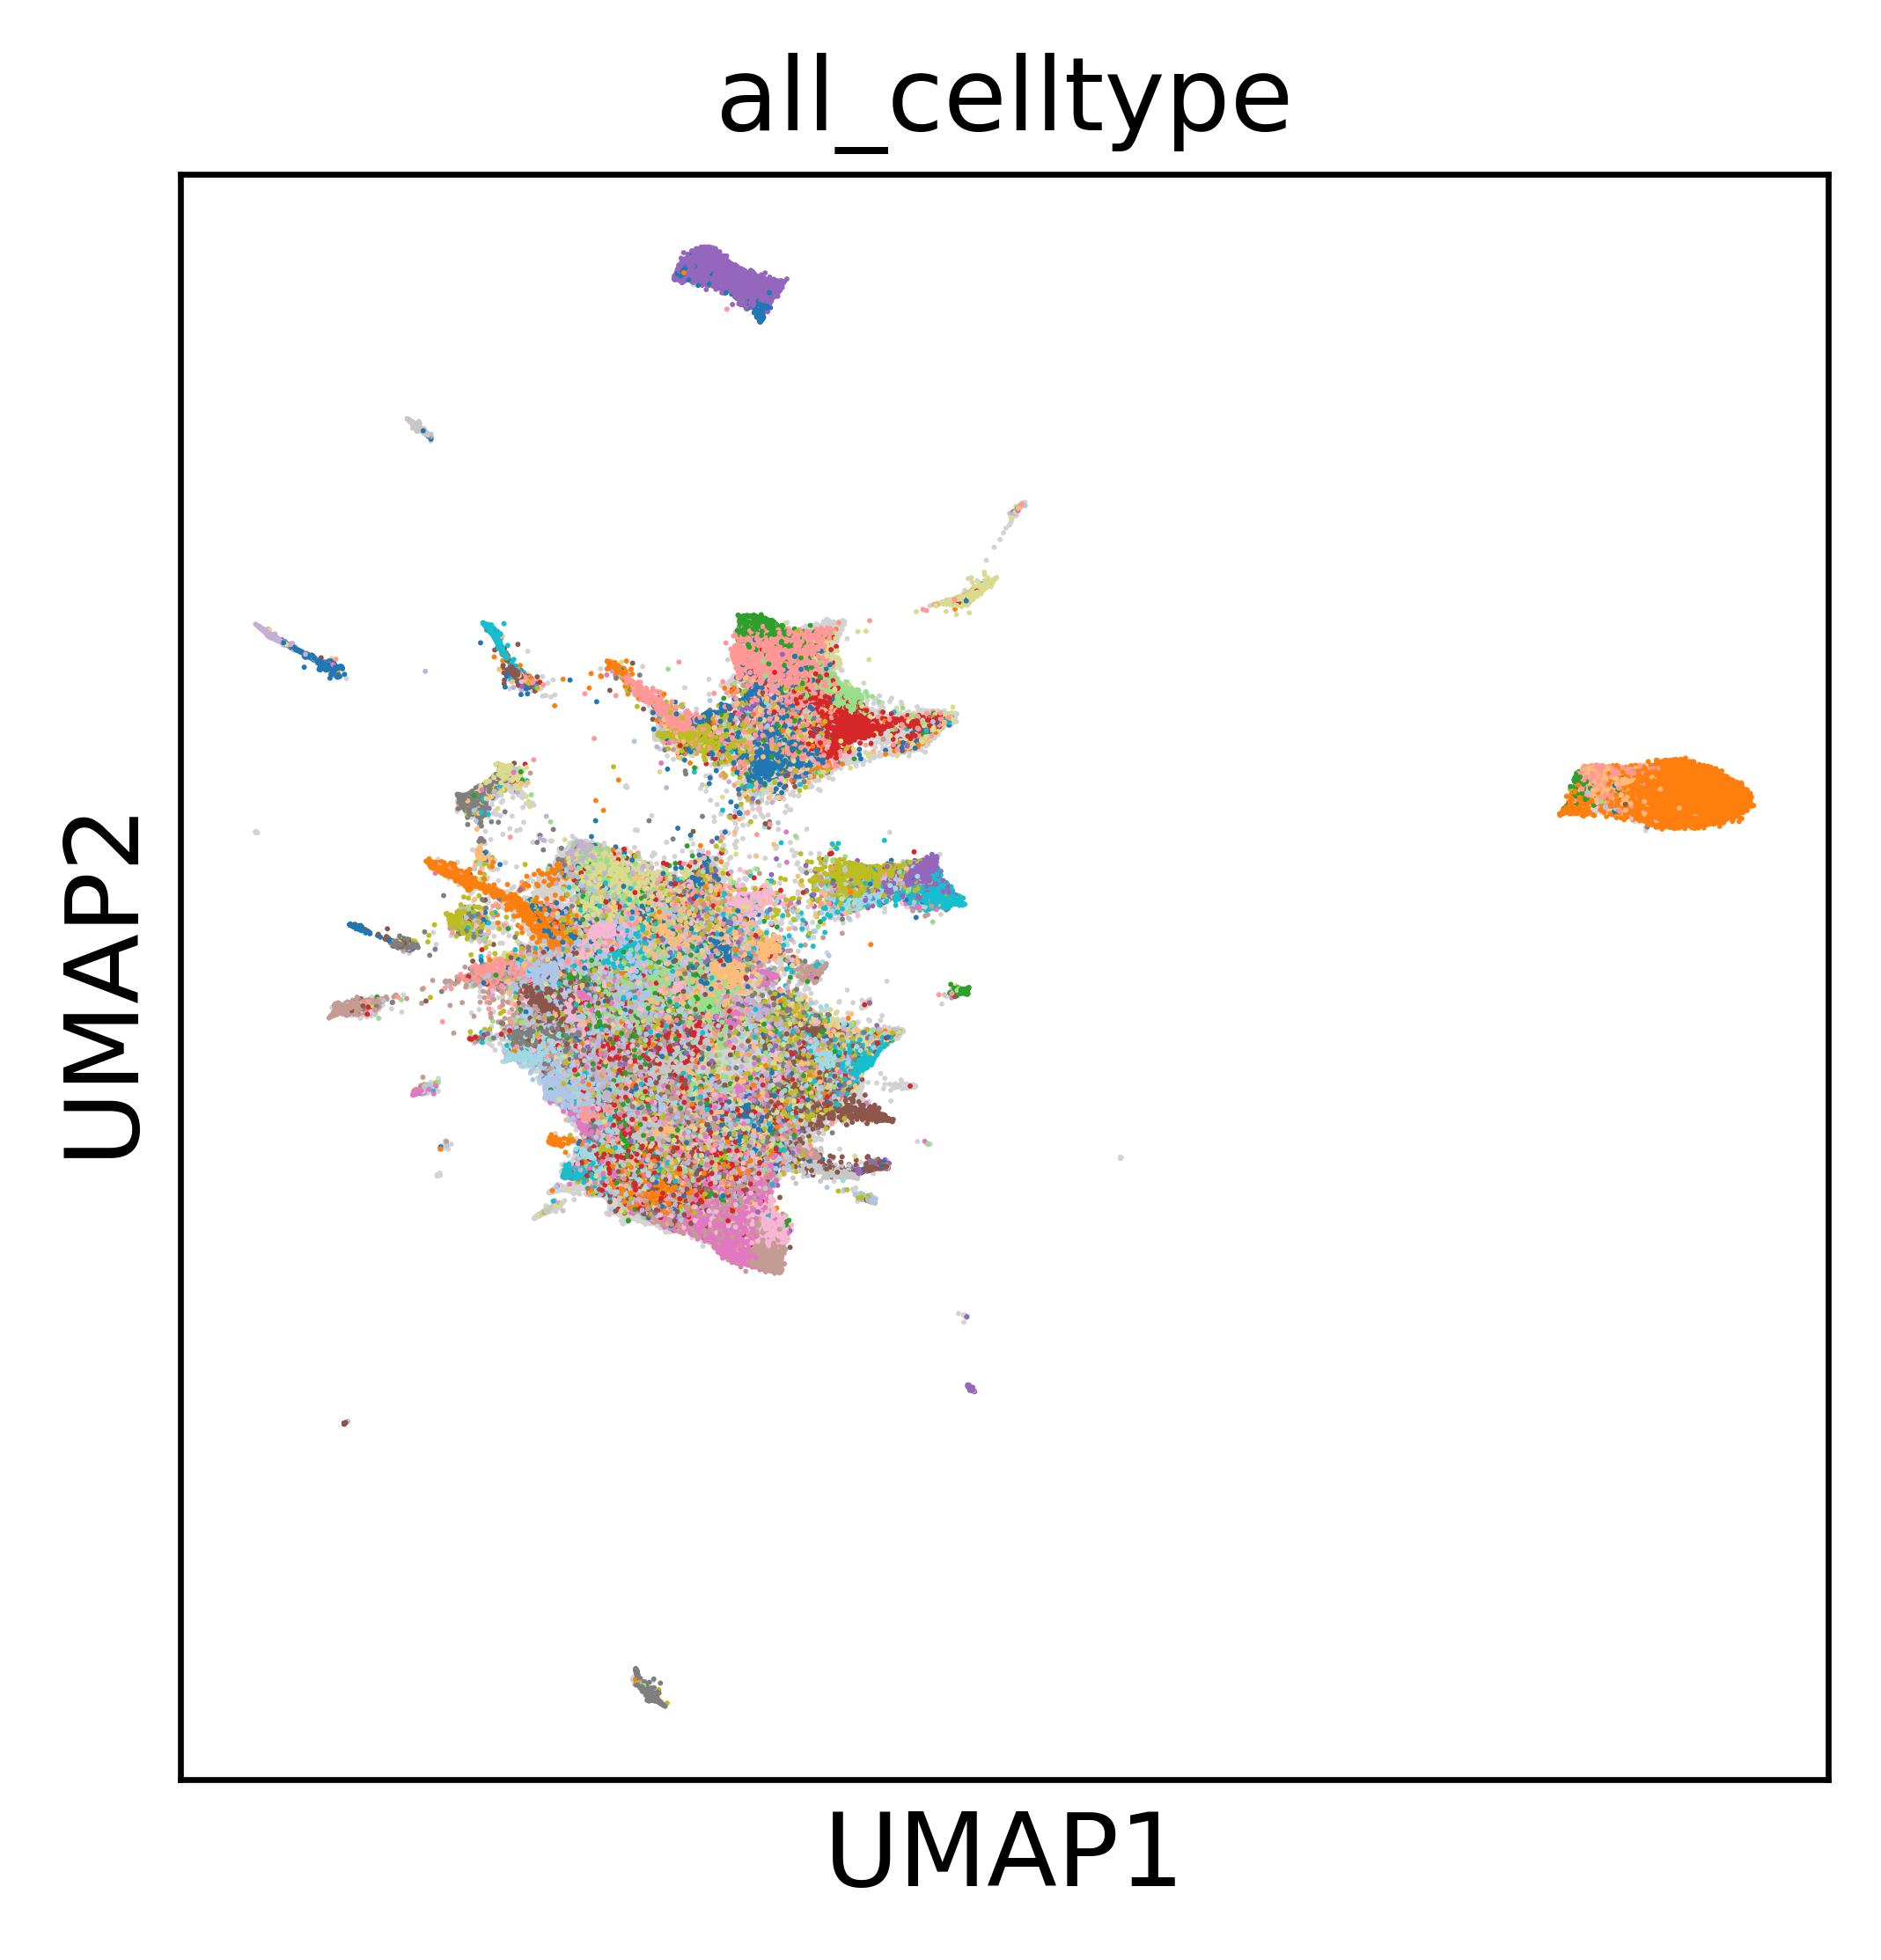

In [137]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique annotation labels
unique_annotations = integrated_ozel_adata.obs['all_celltype'].unique()

# Generate a large set of distinct colors
num_colors = len(unique_annotations)
palette = sns.color_palette("tab20", num_colors)  # Use "tab20", "tab20b", "tab20c", or "hsv" for more colors
color_dict = dict(zip(unique_annotations, palette))

# Assign colors to annotation categories
integrated_ozel_adata.obs['all_celltype'] = integrated_ozel_adata.obs['all_celltype'].astype('string')
sc.pl.umap(integrated_ozel_adata, color='all_celltype', palette=color_dict, legend_loc=None, legend_fontsize=2, size = 2)


In [97]:
#Ferriera et al. 2023 annotations
integrated_ozel_adata.obs['annotation'] = integrated_ozel_adata.obs['annotation'].astype(str)
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['annotation'] == 'G/LQ1', 'annotation'] = 'AST'
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['annotation'] == 'G10', 'annotation'] = 'AST'
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['annotation'] == 'G02', 'annotation'] = 'ALG'
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['annotation'] == 'G13', 'annotation'] = 'PNG'
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['annotation'] == 'G/LQ4', 'annotation'] = 'ENG'
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['annotation'] == 'G01', 'annotation'] = 'ENG'
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['annotation'] == 'G07', 'annotation'] = 'DSG'
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['annotation'] == 'G/LQ3', 'annotation'] = 'ICG'
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['annotation'] == 'G03', 'annotation'] = 'MENG'
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['annotation'] == 'G04', 'annotation'] = 'MENG'
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['annotation'] == 'G12', 'annotation'] = 'Chalice'
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['annotation'] == 'G05', 'annotation'] = 'CG'
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['annotation'] == 'G06', 'annotation'] = 'CG'
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['annotation'] == 'G14ab', 'annotation'] = 'LEMG'
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['annotation'] == 'G16/LQ', 'annotation'] = 'PC'
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['annotation'] == 'G08', 'annotation'] = 'OC'
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['annotation'] == 'G11', 'annotation'] = 'SPG'
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['annotation'] == 'G09', 'annotation'] = 'PS'
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['annotation'] == 'G/LQ2', 'annotation'] = 'AST'
integrated_ozel_adata.obs['annotation'] = integrated_ozel_adata.obs['annotation'].astype('category')

In [104]:
#El-Danaf et al. 2025 annotations
integrated_ozel_adata.obs['annotation'] = integrated_ozel_adata.obs['annotation'].astype(str)
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['annotation'] == '221', 'annotation'] = 'LC9'
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['annotation'] == '5', 'annotation'] = 'LC11'
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['annotation'] == '98', 'annotation'] = 'LC13'
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['annotation'] == '139', 'annotation'] = 'LC18'
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['annotation'] == '87', 'annotation'] = 'LC20'
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['annotation'] == '99', 'annotation'] = 'LC21'
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['annotation'] == '149', 'annotation'] = 'LC22-LPLC4'
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['annotation'] == '57', 'annotation'] = 'LC25'
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['annotation'] == '100', 'annotation'] = 'LC15-LC16-LC24-LC26'
integrated_ozel_adata.obs['annotation'] = integrated_ozel_adata.obs['annotation'].astype('category')

/ru-auth/local/home/pkim/miniconda3/envs/workshop_2024/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/ru-auth/local/home/pkim/miniconda3/envs/workshop_2024/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


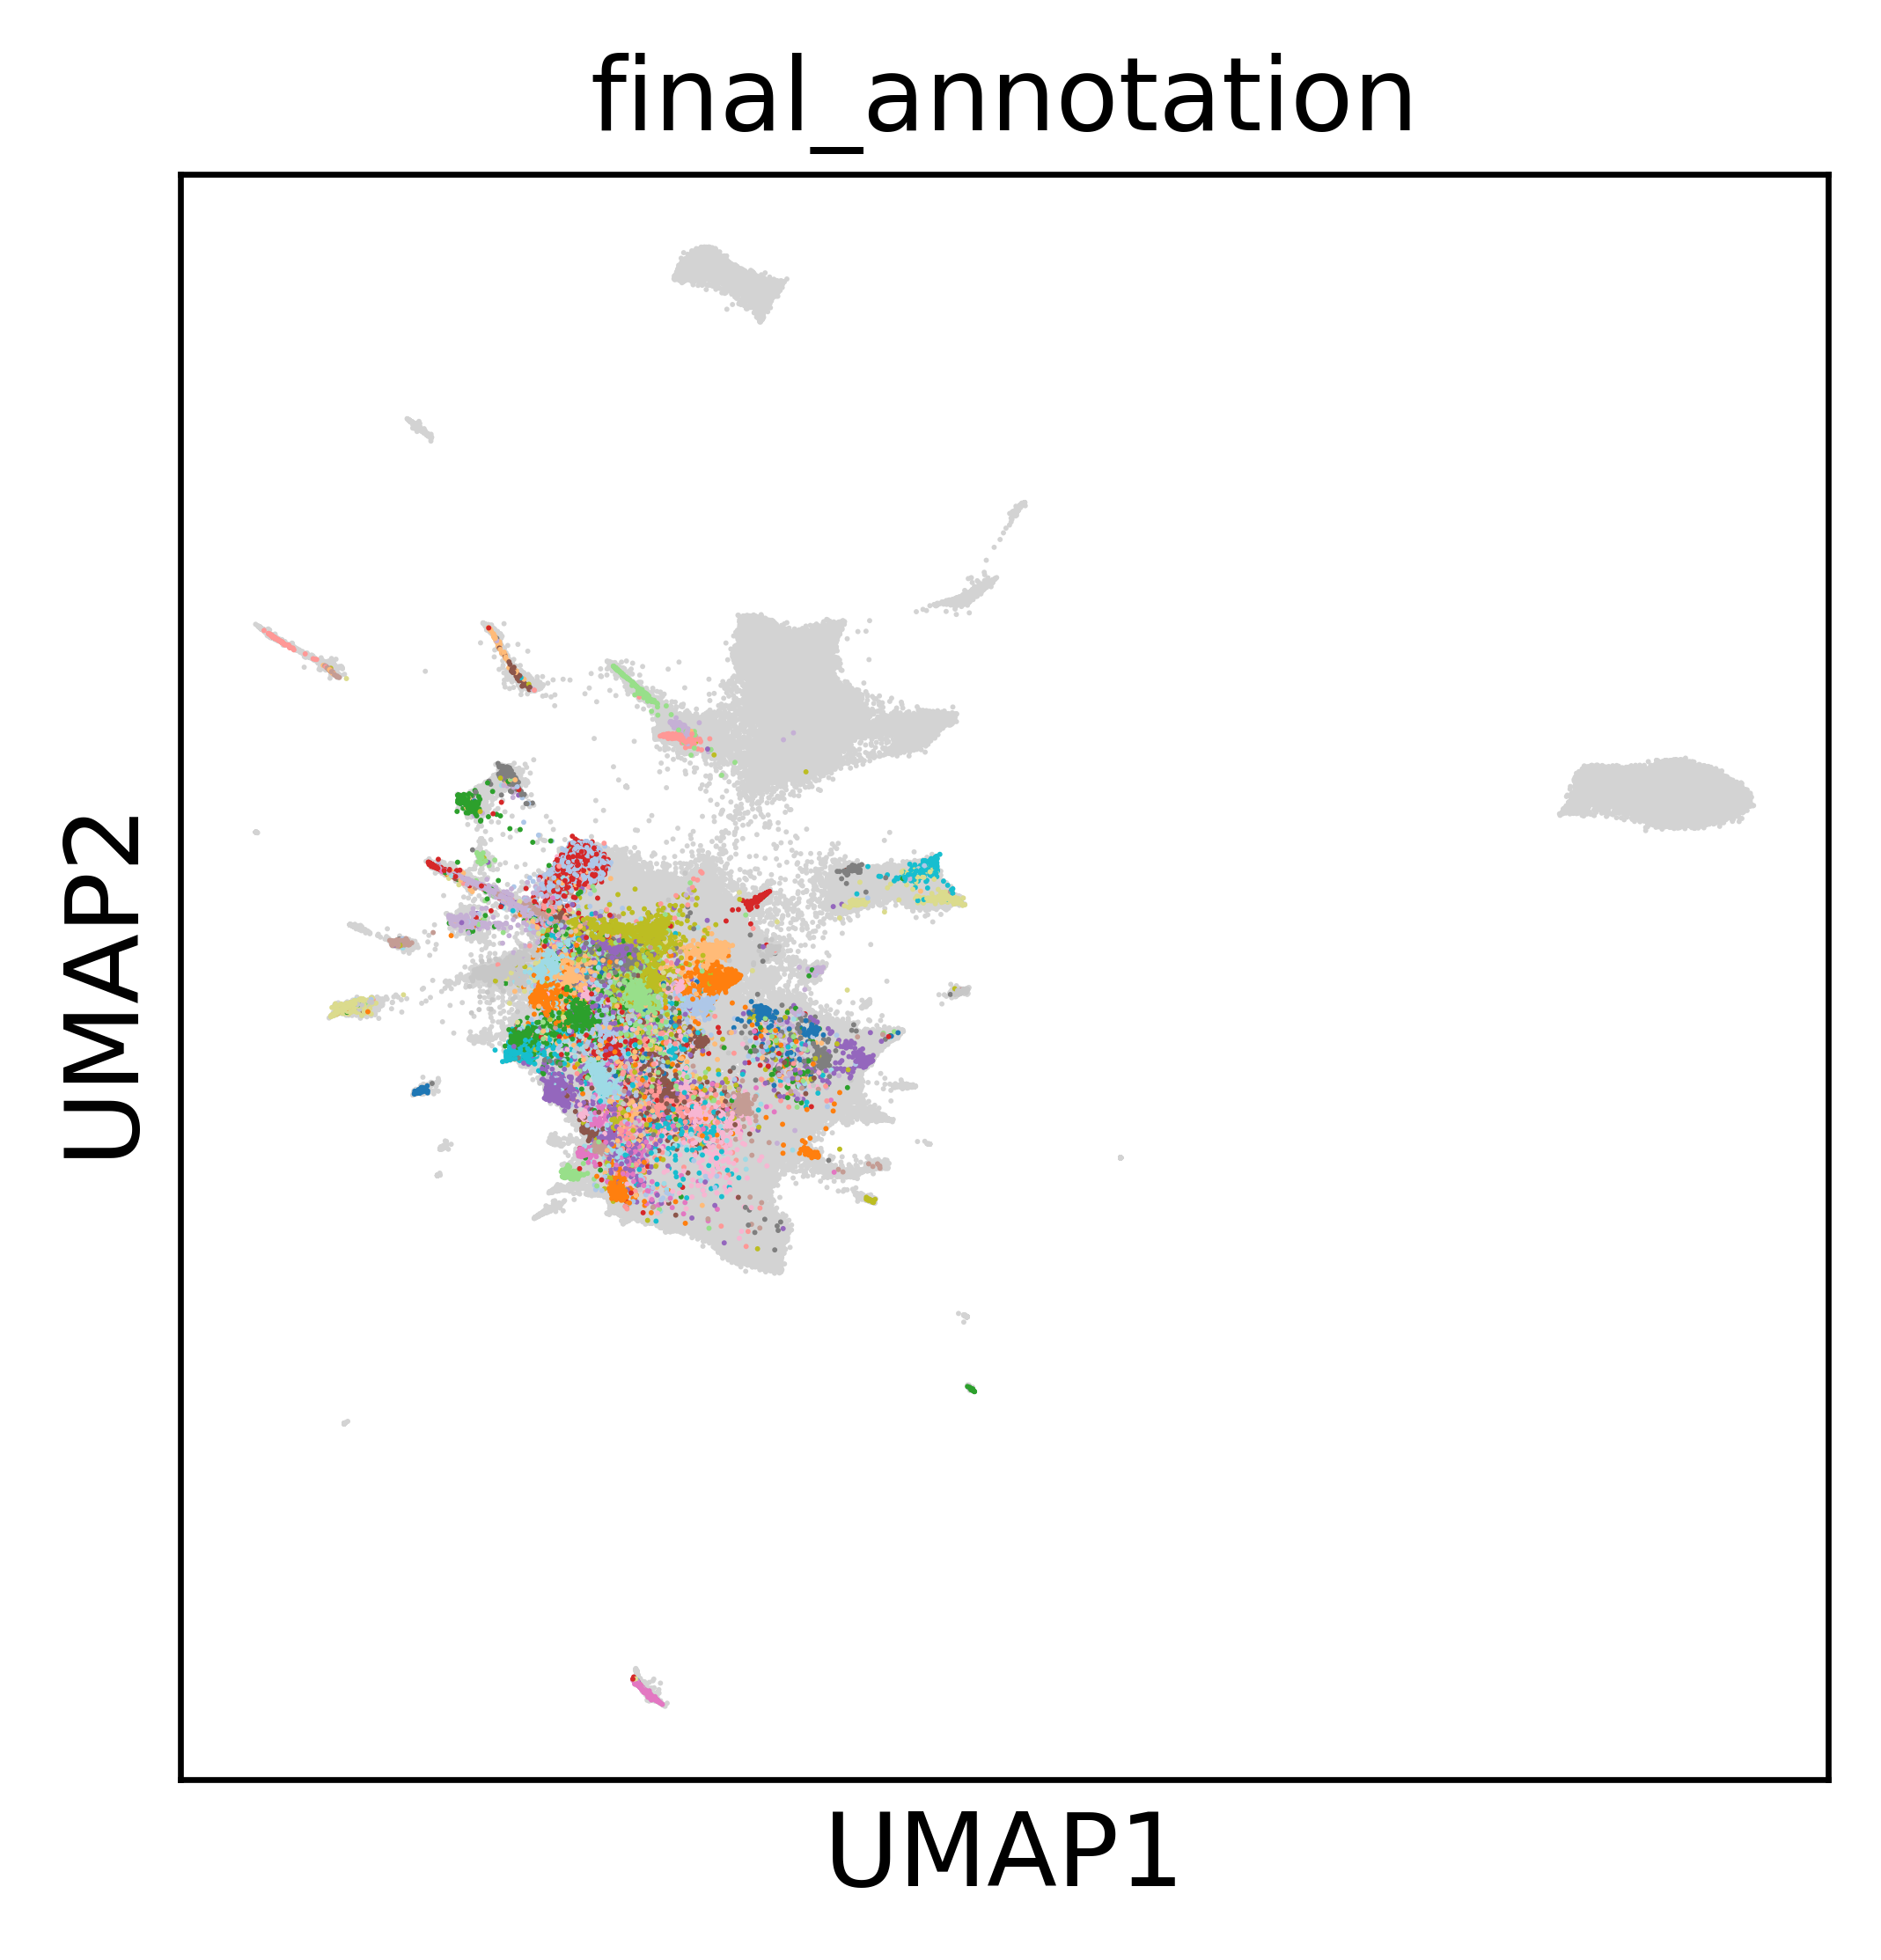

In [141]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique annotation labels
unique_annotations = integrated_ozel_adata.obs['final_annotation'].unique()

# Generate a large set of distinct colors
num_colors = len(unique_annotations)
palette = sns.color_palette("tab20", num_colors)  # Use "tab20", "tab20b", "tab20c", or "hsv" for more colors
color_dict = dict(zip(unique_annotations, palette))

# Assign colors to annotation categories
integrated_ozel_adata.obs['final_annotation'] = integrated_ozel_adata.obs['final_annotation'].astype('string')
sc.pl.umap(integrated_ozel_adata, color='final_annotation', palette=color_dict, legend_loc="on data", legend_fontsize=2, size = 2)


/ru-auth/local/home/pkim/miniconda3/envs/workshop_2024/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/ru-auth/local/home/pkim/miniconda3/envs/workshop_2024/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


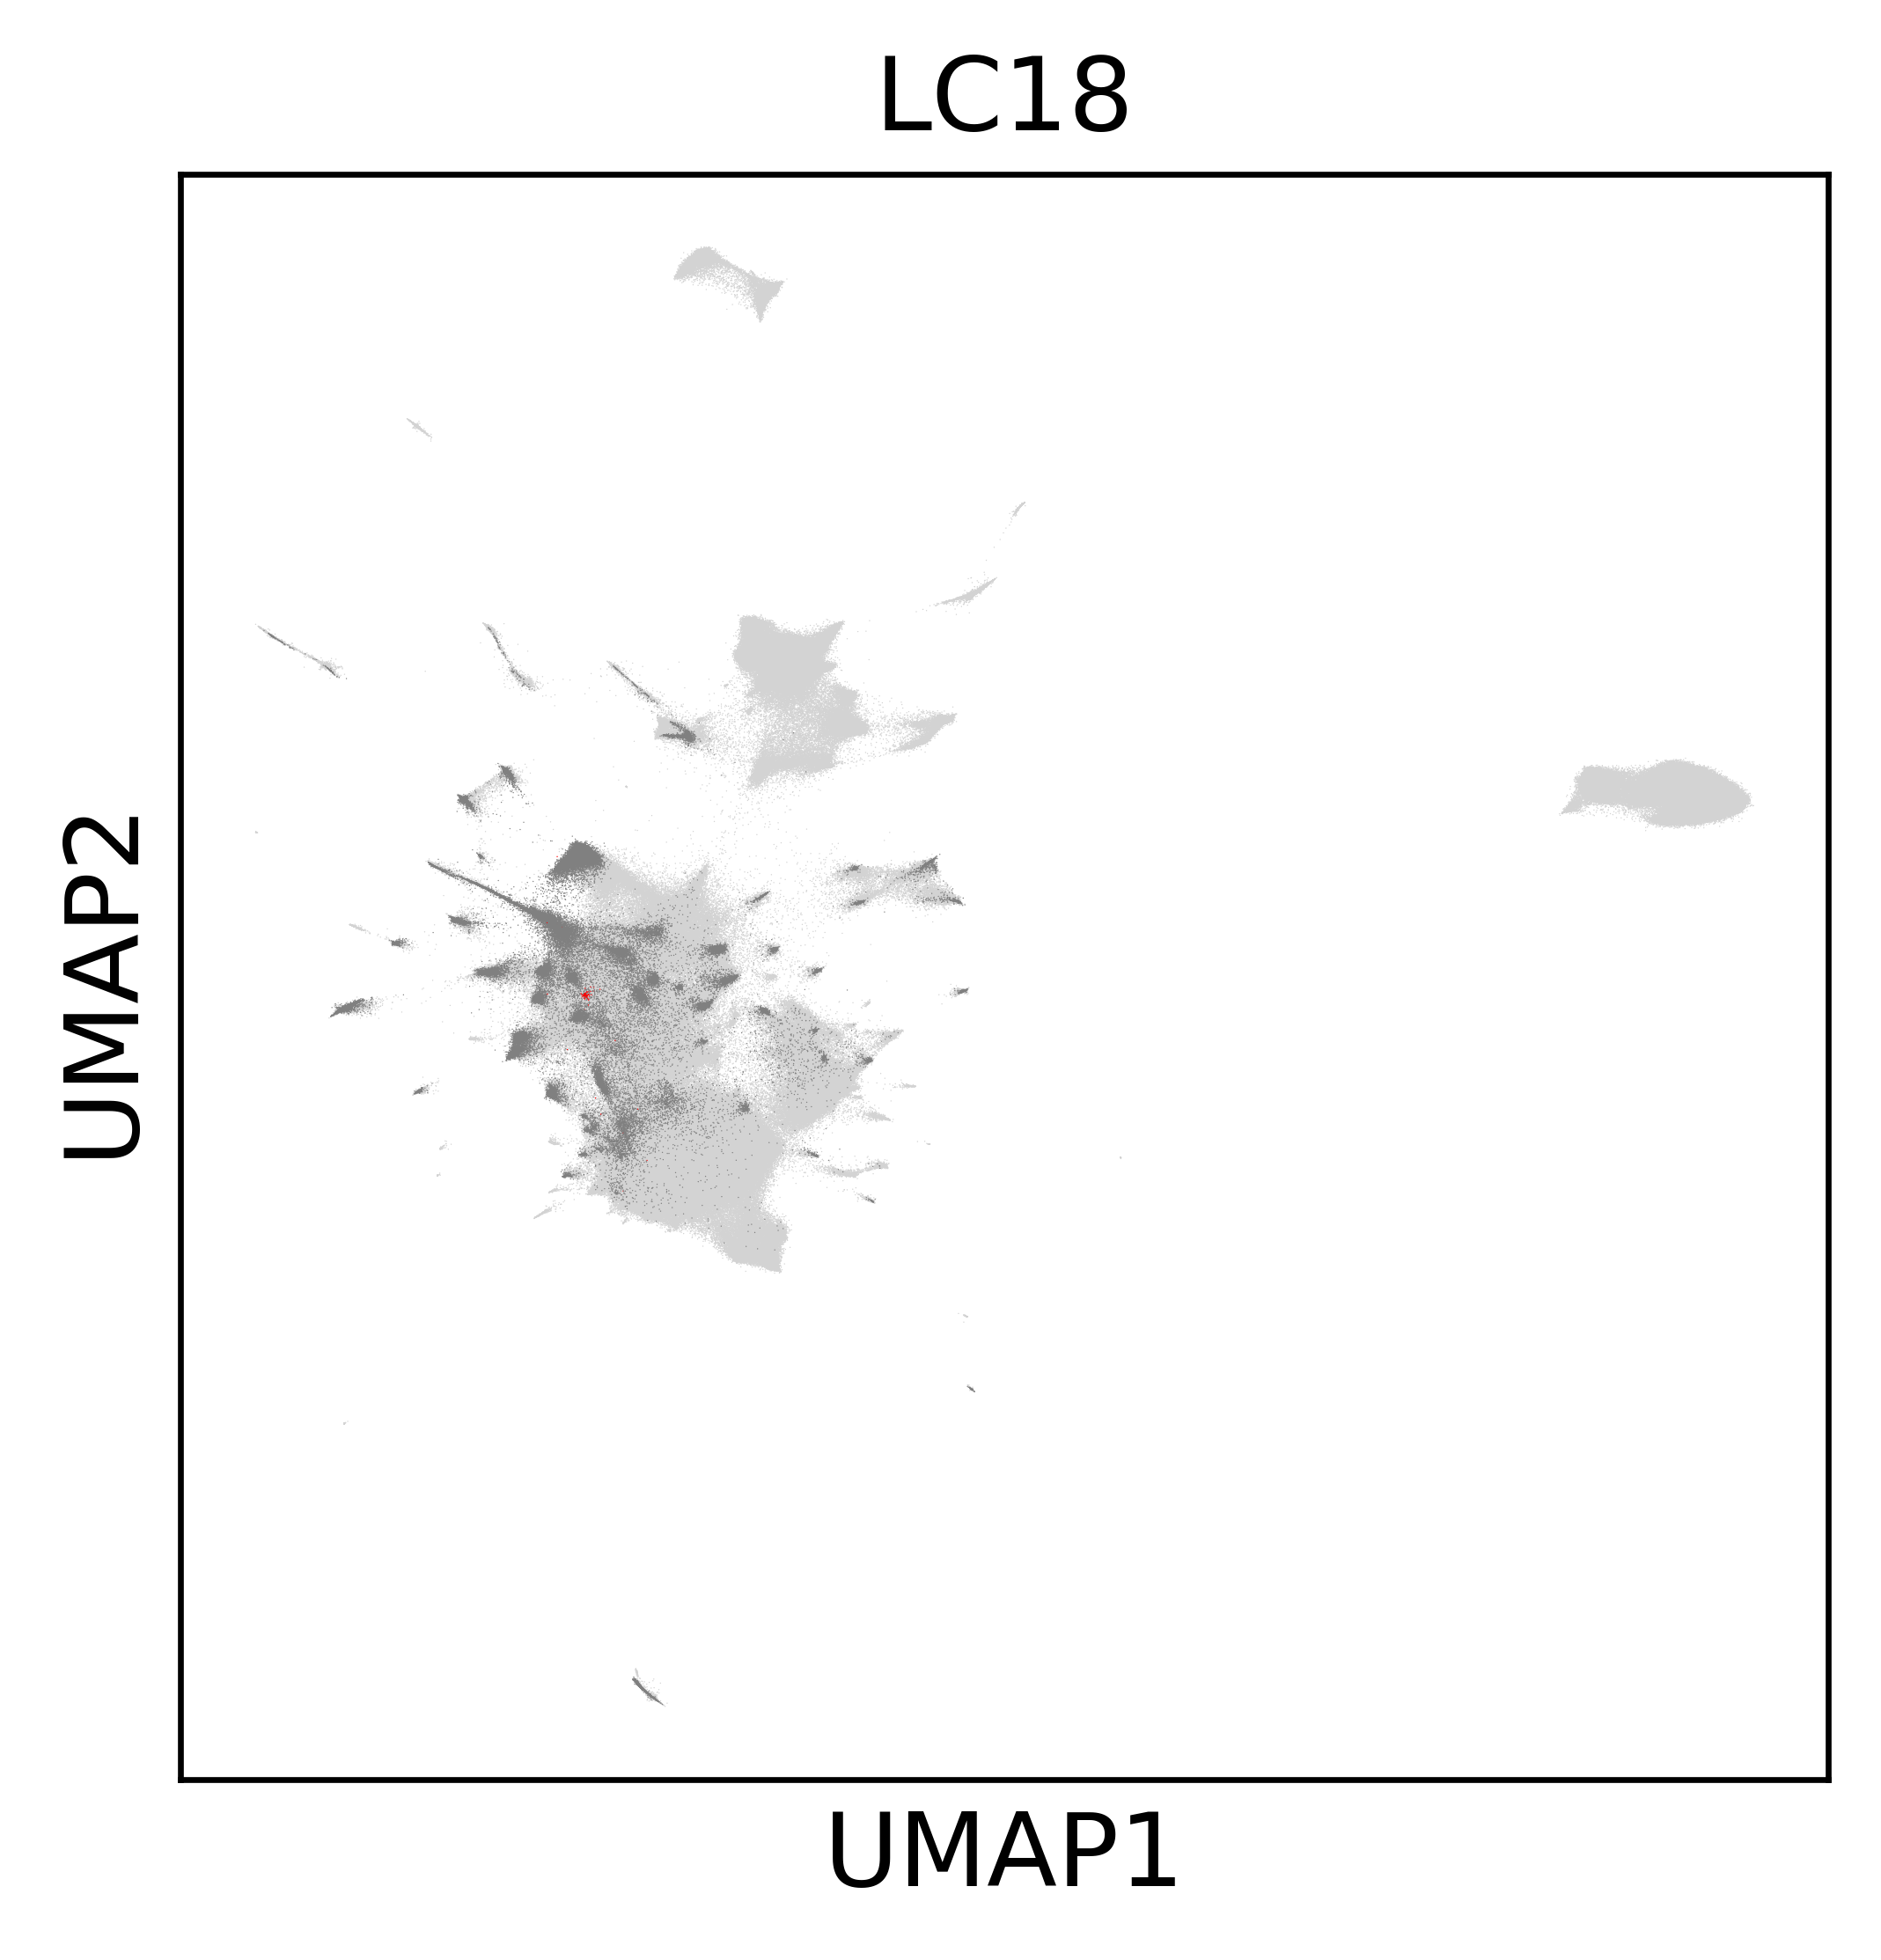

In [169]:
import numpy as np
import pandas as pd
import scanpy as sc

celltype = "LC18"
key = "final_annotation"

# 1) Ensure categorical dtype (required for *_colors palettes)
integrated_ozel_adata.obs[key] = integrated_ozel_adata.obs[key].astype("category")

# 2) Build a palette aligned to the categories
cats = integrated_ozel_adata.obs[key].cat.categories
if celltype not in set(cats):
    print(f"Warning: '{celltype}' not found in {key} categories.")

palette = ["red" if c == celltype else "grey" for c in cats]

# 3) Register the palette for this key
integrated_ozel_adata.uns[f"{key}_colors"] = palette

# 4) Plot
sc.pl.umap(
    integrated_ozel_adata,
    color=[key],
    legend_loc=None,
    title=celltype
)


In [110]:
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['annotation'] == 'discarded', 'annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['annotation'] == 'nan', 'annotation'] = np.nan

In [113]:
#integrated_ozel_adata.obs['final_annotation'] = integrated_ozel_adata.obs['annotation']

In [149]:
integrated_ozel_adata.obs['final_annotation'] = integrated_ozel_adata.obs['final_annotation'].astype('string')

In [150]:
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == 'Dm3a', 'final_annotation'] = 'Dm3'
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == 'Dm3b', 'final_annotation'] = 'Dm3'
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == 'Tm9d', 'final_annotation'] = 'Tm9'
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == 'Tm9v', 'final_annotation'] = 'Tm9'
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == 'LC10a', 'final_annotation'] = 'LC10'
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == 'LC10b', 'final_annotation'] = 'LC10'
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == 'LC10d', 'final_annotation'] = 'LC10'

In [147]:
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == 'LC25', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == 'LC9', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '158', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == 'PC', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == 'PS', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '138', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == 'DSG', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '59', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '49', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '88a', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '105', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '176', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '45', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '44', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '46', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '114', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '22', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '67', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '92', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '62', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '124', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '102', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '41', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '191', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '83', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '103', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '129', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '36', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '96', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '24', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '88b', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '80', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '37', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '170', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '73', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '123', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '56', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '20', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '51', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '160', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '69', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '159', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '82', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '112', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '29', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '26', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '68', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '23', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '84', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '71', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '171', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == 'PR', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '184', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == 'LQ', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '167', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '94', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '85', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '173', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '13', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '52', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '169a', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '53', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '81', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '179', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '47', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '43', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '50', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '58', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '174', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '86', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '63', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '65', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '95', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '116', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '90', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '168', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '48', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '177', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '146', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '183', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '76', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '32', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '4', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '11', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '153', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '74', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '120', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '30', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '156', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '172', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '28', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '17', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '39', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '38', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '16', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '161', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == 'ICG', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '93', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '180', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '101', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == 'MENG', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '21', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '10', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '148', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '106', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '162', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '18', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '155', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '115', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '181', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '157', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '154', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '40', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '91', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '54', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '169b', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '166', 'final_annotation'] = np.nan
integrated_ozel_adata.obs.loc[integrated_ozel_adata.obs['final_annotation'] == '178', 'final_annotation'] = np.nan


In [5]:
integrated_ozel_adata = sc.read_h5ad('/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:01:31/ozel_adata_integrated_3.h5ad')

In [91]:
#integrated_ozel_adata.write_h5ad('/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:01:31/ozel_adata_integrated_3.h5ad')

In [86]:
sc.set_figure_params(dpi = 300)

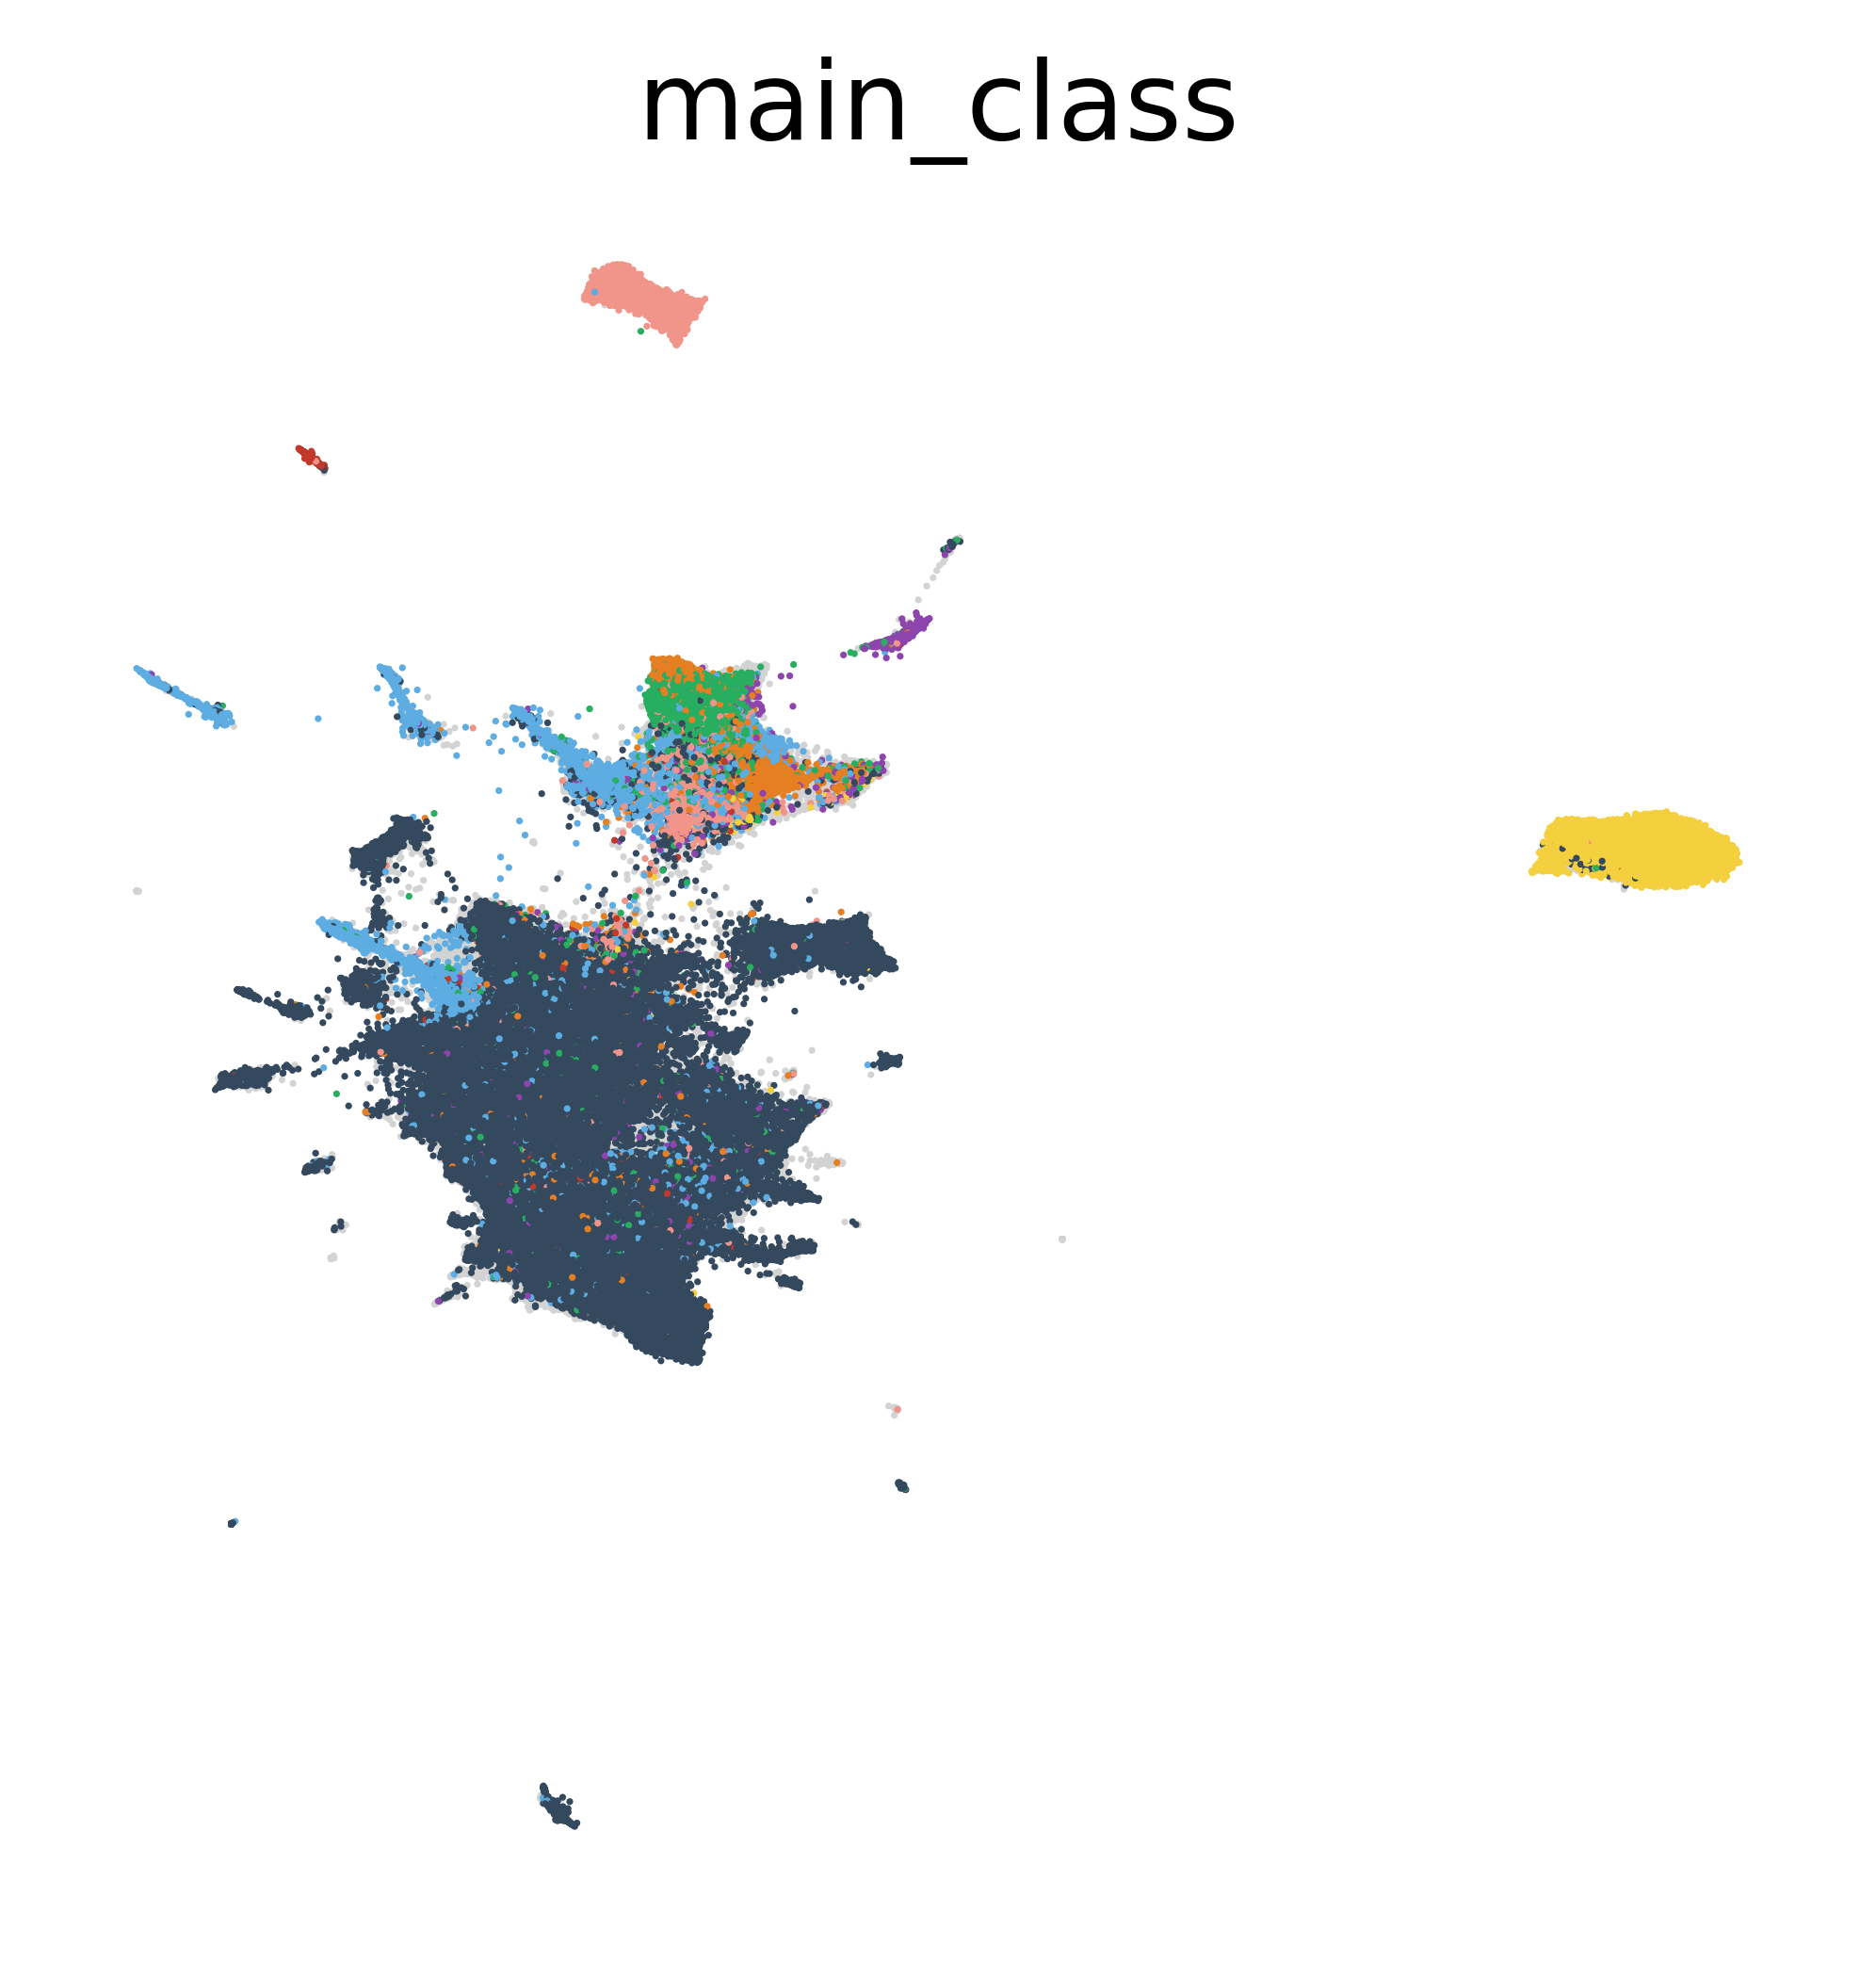

In [69]:
# Master mapping dictionary for both datasets
main_class_map = {
    # Photoreceptors
    'R1-6': 'Photoreceptor',
    'R7': 'Photoreceptor',
    'R8': 'Photoreceptor',
    'DRA': 'Photoreceptor',
    'OCR': 'Photoreceptor',

    # Cone
    'CONE-2': 'Cone',
    'CONE-1': 'Cone', 
    
    # Glia
    'SPG': 'Glia',
    'OCHG': 'Glia',
    'CHG': 'Glia',
    'PNG': 'Glia',
    'CG': 'Glia',
    'EG': 'Glia',
    'LEMG': 'Glia',
    'PGM': 'Glia',
    'ASTG': 'Glia',
    'ALG': 'Glia',

    # Fat
    'FAT-1': 'Fat',
    'FAT-2': 'Fat',

    #Epithelial
    'EPI': 'Epithelial',
    
    # Hemocytes
    'HE': 'Hemocytes',

    # Muscle
    'MUS': 'Muscle',

    # Neurons (catch-all for neuronal subtypes)
    'KC': 'Neuron',
    'KCy': 'Neuron',
    'KCab': 'Neuron',
    'KCapbp': 'Neuron',
    'ORN': 'Neuron', 
    'AudSN': 'Neuron', 
    'JON': 'Neuron', 
    'EB-RN': 'Neuron',
    'PAM-DAN': 'Neuron', 
    'DAN': 'Neuron',
    'SERN': 'Neuron',
    'OAN': 'Neuron',
    'OAN-TYRN': 'Neuron',
    'TYRN': 'Neuron',
    'Tm5a': 'Neuron',
    'Lai': 'Neuron',
    'TmY3': 'Neuron',
    'T4T5': 'Neuron',
    'TmY4': 'Neuron',
    'LC12': 'Neuron',
    'JON': 'Neuron',
    'T1': 'Neuron',
    'AL-PN': 'Neuron',
    'L3': 'Neuron', 
    'T4T5ab': 'Neuron',
    'LC17': 'Neuron',
    'LPLC2': 'Neuron',
    'Tm9': 'Neuron', 
    'LC4': 'Neuron',
    'TmY14': 'Neuron',
    'LC10a': 'Neuron',
    'Tm1': 'Neuron',
    'L2': 'Neuron',
    'EB-RN': 'Neuron',
    'Mi1': 'Neuron',
    'KCab': 'Neuron',
    'KCapbp': 'Neuron',
    'Mi15': 'Neuron',
    'Mi4': 'Neuron',
    'Mi9': 'Neuron',
    'T2': 'Neuron',
    'T2a': 'Neuron',
    'Tm2': 'Neuron', 
    'T4T5cd': 'Neuron',
    'CLKN': 'Neuron',
    'Dm9': 'Neuron',
    'Dm10': 'Neuron',
    'DAN': 'Neuron',
    'KCy': 'Neuron',
    'LAWF1': 'Neuron',
    'L5': 'Neuron',
    'T3': 'Neuron',
    'PAM-DAN': 'Neuron',
    'LC10b': 'Neuron',
    'L1': 'Neuron',
    'L4': 'Neuron',
    'ORN': 'Neuron',
    'PB': 'Neuron',
    'Dm3': 'Neuron',
    'LLPC1': 'Neuron',
    'Dm8': 'Neuron',
    'LPC1': 'Neuron',
    'LC14': 'Neuron',
    'TmY8': 'Neuron',
    'Tm4': 'Neuron',
    'LAWF2': 'Neuron',
    'dFB': 'Neuron',
    'Dm2': 'Neuron',
    'C3': 'Neuron',
    'LC16': 'Neuron',
    'LPLC1': 'Neuron',
    'C2': 'Neuron',
    'LC21': 'Neuron',
    'Dm12': 'Neuron',
    'TmY5a': 'Neuron',
    'Pm4': 'Neuron',
    'Tm20': 'Neuron',
    'AudSN': 'Neuron',
    'LC22-LPLC4': 'Neuron',
    'LC11': 'Neuron',
    'SERN': 'Neuron',
    'LC10d': 'Neuron',
    'Pm3': 'Neuron',
    'Dm4': 'Neuron',
    'LC18': 'Neuron', 
    'Dm11': 'Neuron',
    'LC6': 'Neuron',
    'Dm1': 'Neuron',
    'LC20': 'Neuron',
    'OAN': 'Neuron',
    'Pm2': 'Neuron',
    'Pm1': 'Neuron',
    'TYRN': 'Neuron',
    'Tm5c': 'Neuron',
    'LC13': 'Neuron',
    'DCN': 'Neuron',
    'Tm29': 'Neuron',

    # Miscellaneous / Unknown
    'Unannotated': 'Unannotated'
}

# Canonical order (same for both)
MAIN_CLASSES = [
    'Photoreceptor','Cone','Glia','Fat','Epithelial','Hemocytes','Muscle','Neuron','Unannotated'
]

MAIN_COLORS = {
    'Photoreceptor': '#F4D03F',
    'Cone':          '#E67E22',
    'Glia':          '#5DADE2',
    'Fat':           '#F1948A',
    'Epithelial':    '#27AE60',
    'Hemocytes':     '#C0392B',
    'Muscle':        '#8E44AD',
    'Neuron':        '#34495E',
    'Unannotated':   '#BDC3C7',
}

def assign_main_class(adata, column_name):
    def _map(lbl):
        if pd.isna(lbl):
            return 'Unannotated'
        return main_class_map.get(lbl, 'Unannotated')
    adata.obs['main_class'] = adata.obs[column_name].apply(_map)
    # Force identical category set/order in both objects
    adata.obs['main_class'] = pd.Categorical(adata.obs['main_class'], categories=MAIN_CLASSES, ordered=False)
    # Store the palette in the same order as MAIN_CLASSES
    adata.uns['main_class_colors'] = [MAIN_COLORS[c] for c in MAIN_CLASSES]
    return adata

# Apply to both datasets (using your chosen source column for each)
adata_1 = assign_main_class(integrated_ozel_adata.copy(), column_name='all_celltype')

# Ensure stable categories/colors across datasets
MAIN_CLASSES = ['Photoreceptor','Cone','Glia','Fat','Epithelial','Hemocytes','Muscle','Neuron','Unannotated']
adata_1.obs['main_class'] = pd.Categorical(adata_1.obs['main_class'].astype('object').fillna('Unannotated'),
                                           categories=MAIN_CLASSES, ordered=False)

# Build list of non-Unannotated groups actually present
keep = [c for c in MAIN_CLASSES if c != 'Unannotated' and (adata_1.obs['main_class'] == c).any()]

# 1) Unannotated first (background)
ax = sc.pl.umap(
    adata_1, color='main_class', groups=['Unannotated'],
    size=2, alpha=0.15, frameon=False, legend_loc=None, title='Dopp', show=False
)

# 2) Then overlay all other classes
sc.pl.umap(
    adata_1, color='main_class', groups=keep,
    size=3, alpha=1.0, frameon=False, legend_loc=None,
    ax=ax, show=True
)


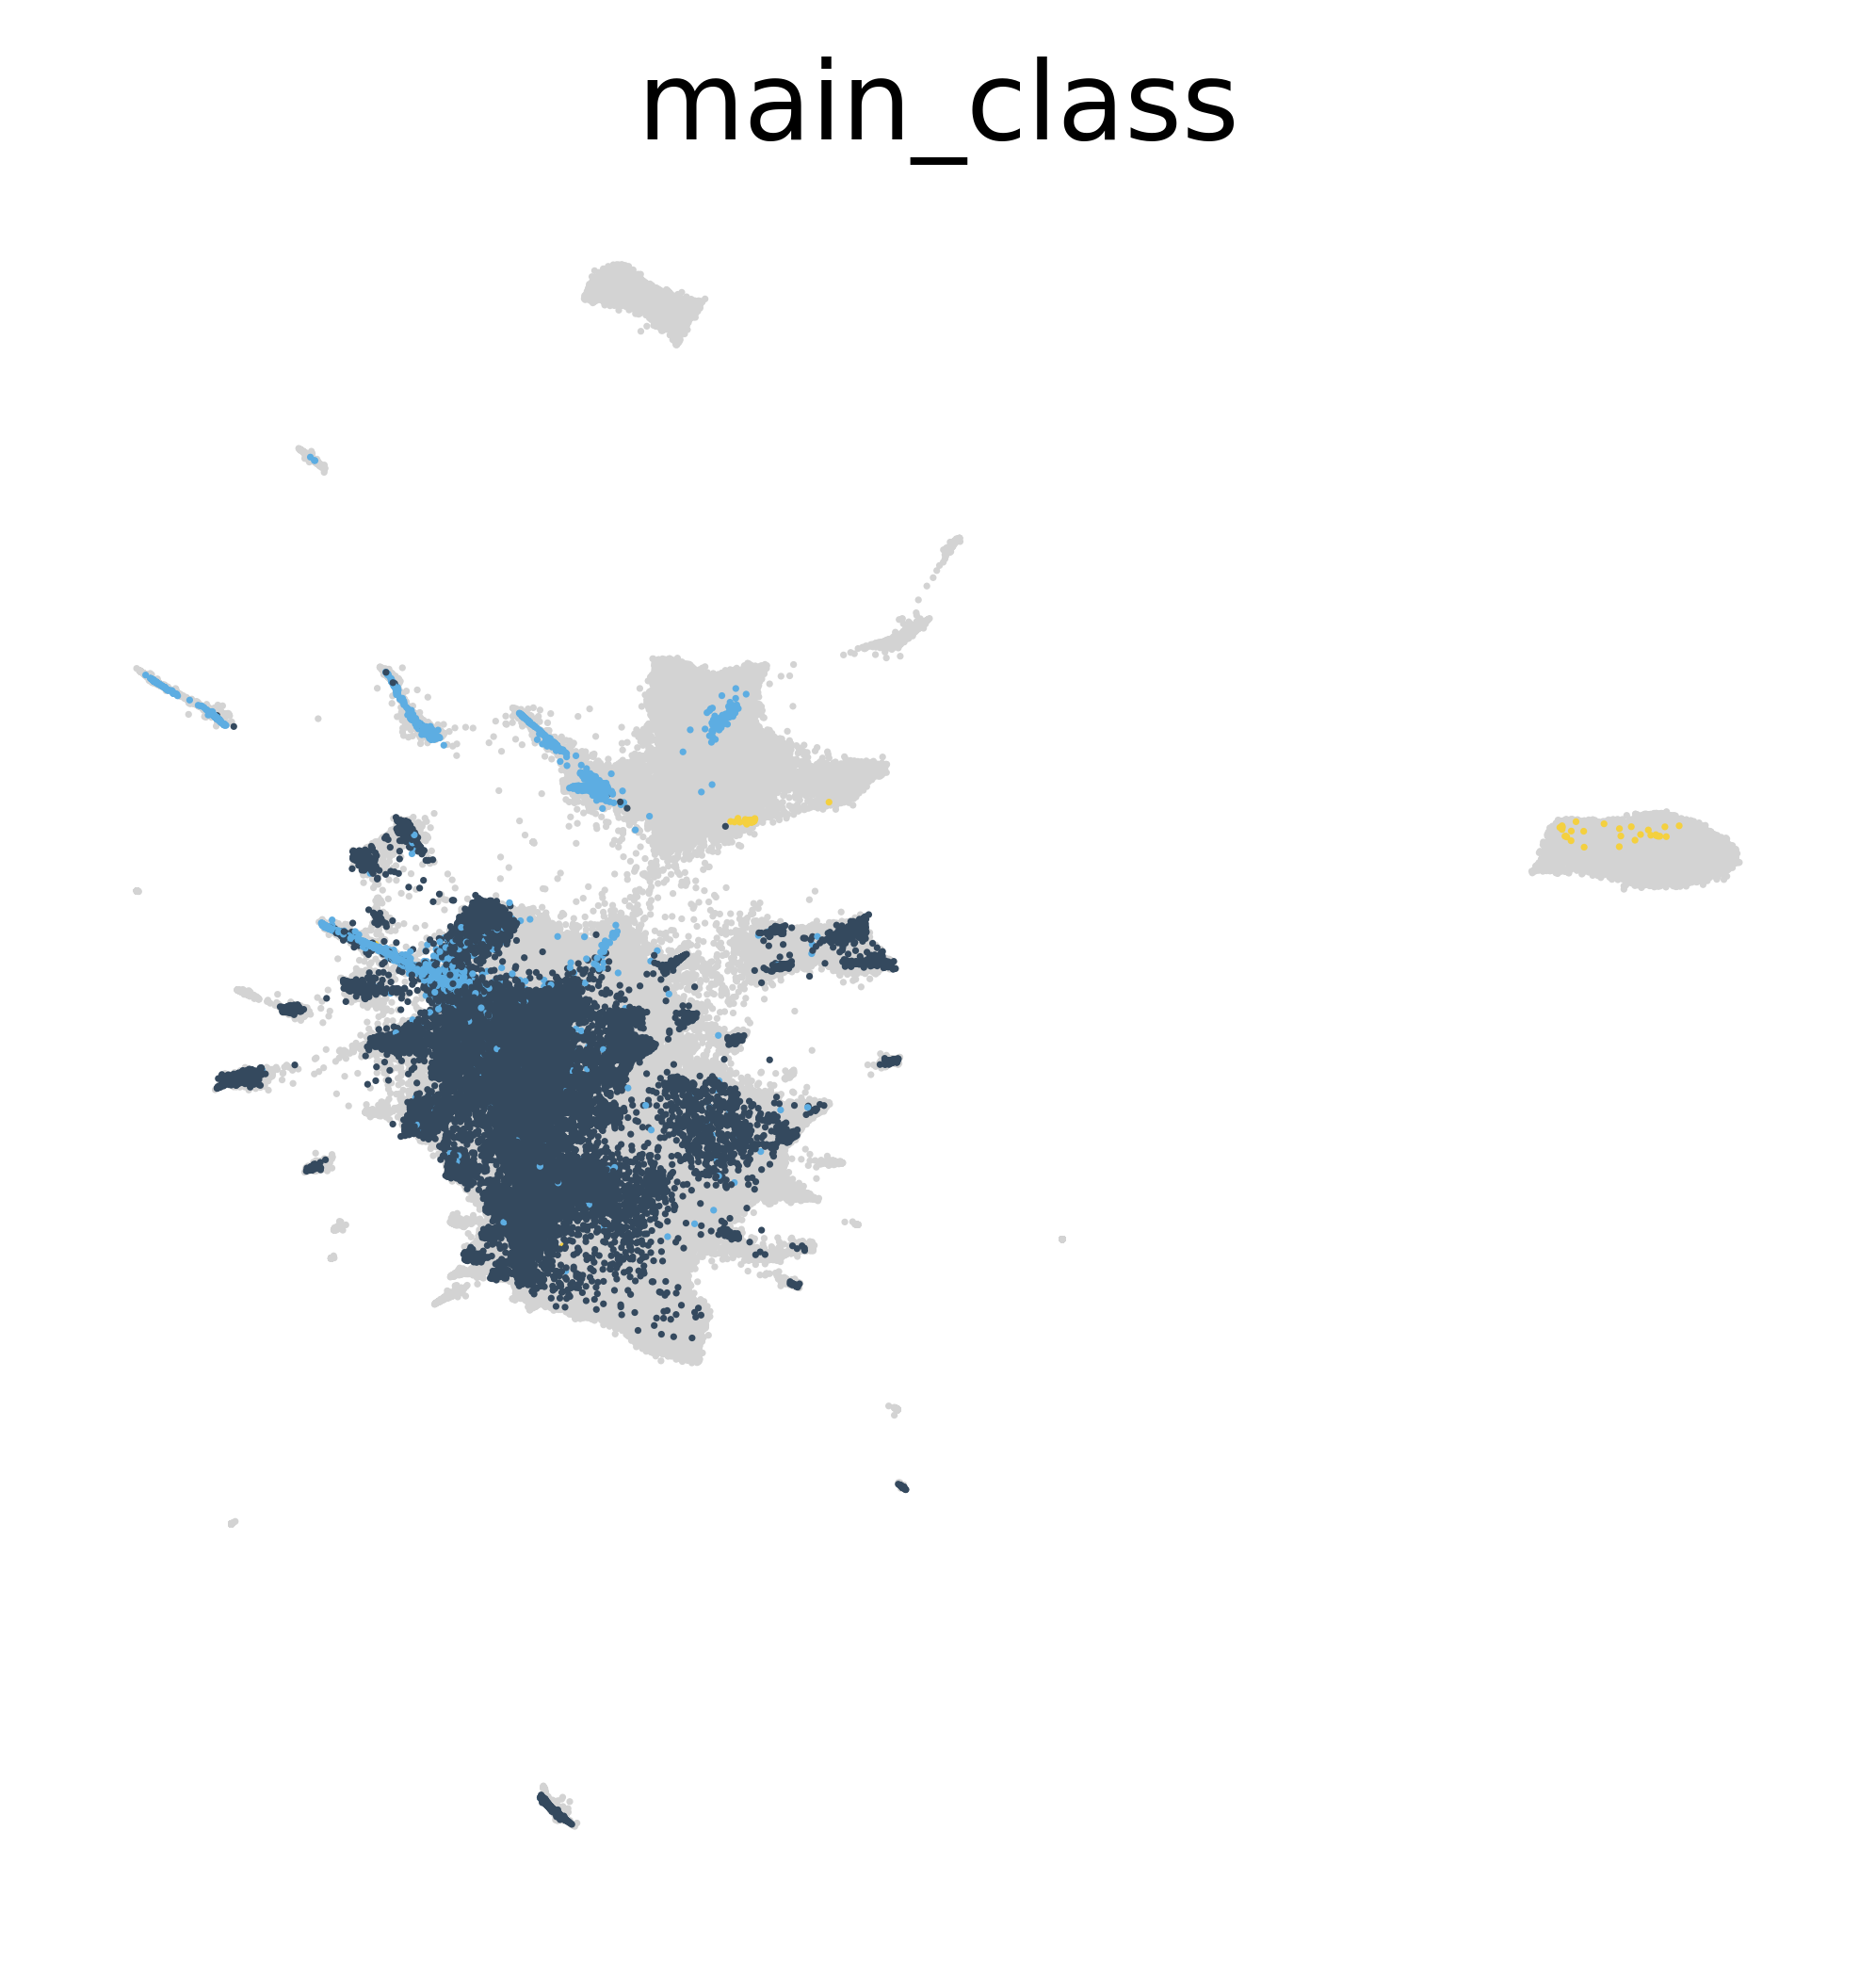

In [73]:
# Master mapping dictionary for both datasets

main_class_map = {
    # Photoreceptors
    'PR': 'Photoreceptor',
    
    # Glia
    'G13': 'Glia',
    'G/LQ1': 'Glia',
    'G/LQ2': 'Glia',
    'G10': 'Glia',
    'G11': 'Glia',
    'G16/LQ': 'Glia',
    'G14ab': 'Glia',
    'G09': 'Glia',
    'G/LQ4': 'Glia',
    'G07': 'Glia',
    'G01': 'Glia',
    'G03': 'Glia',
    'G04': 'Glia',
    'G02': 'Glia',
    'G05': 'Glia',
    'G12': 'Glia',
    'G08': 'Glia',
    'G/LQ3': 'Glia',
    'G06': 'Glia',
    
    # Neurons (catch-all for neuronal subtypes)
    'T4-5a/b': 'Neuron',
    'Tm4': 'Neuron',
    'Tm9v': 'Neuron',
    'C3': 'Neuron',
    'TmY5a': 'Neuron',
    'T4-5c/d': 'Neuron',
    'Mi9': 'Neuron',
    'TmY4*': 'Neuron',
    'Dm12': 'Neuron',
    'T1': 'Neuron',
    'C2': 'Neuron',
    'Tm1': 'Neuron',
    'Dm8': 'Neuron',
    'L4': 'Neuron',
    'T2': 'Neuron',
    'Tm3': 'Neuron',
    'Lawf1': 'Neuron',
    'Tm5ab': 'Neuron',
    'Tm2': 'Neuron',
    'Tm20': 'Neuron',
    'Dm2': 'Neuron',
    'LPC1': 'Neuron',
    'LLPC1': 'Neuron',
    'T2a': 'Neuron',
    'Lawf2': 'Neuron',
    'Dm1': 'Neuron',
    'Mi15': 'Neuron',
    'L3': 'Neuron',
    'Lai': 'Neuron',
    'Dm3a': 'Neuron',
    'Mi1': 'Neuron',
    'L2': 'Neuron',
    'TmY8*': 'Neuron',
    'Dm3b': 'Neuron',
    'Dm10': 'Neuron',
    'TmY3': 'Neuron',
    'Dm4': 'Neuron',
    'Pm4': 'Neuron',
    'L5': 'Neuron',
    'Tm9d': 'Neuron',
    'Tm29': 'Neuron',
    'LC16': 'Neuron',
    'Mi4': 'Neuron',
    'LC12*': 'Neuron',
    'LPLC2': 'Neuron',
    'Dm11': 'Neuron',
    'Tm5c': 'Neuron',
    'TmY14*': 'Neuron',
    'LC10a': 'Neuron',
    'L1': 'Neuron',
    'LC14': 'Neuron',
    'Pm3*': 'Neuron',
    'LC10d': 'Neuron',
    'Dm9': 'Neuron',
    'LC17*': 'Neuron',
    'LC6': 'Neuron',
    'Pm2': 'Neuron', 
    'LPLC1': 'Neuron',
    'Pm1': 'Neuron',
    'LC10b': 'Neuron',
    'LC4': 'Neuron',
    'T3': 'Neuron',
    '221': 'Neuron',
    '5': 'Neuron',
    '98': 'Neuron',
    '139': 'Neuron',
    '87': 'Neuron',
    '99': 'Neuron',
    '149': 'Neuron',
    '57': 'Neuron',
    '100': 'Neuron',

    # Miscellaneous / Unknown
    '59': 'Unannotated',
    '49': 'Unannotated',
    '88a': 'Unannotated',
    '105': 'Unannotated',
    '176': 'Unannotated',
    '45': 'Unannotated',
    '44': 'Unannotated',
    '46': 'Unannotated',
    '114': 'Unannotated', 
    '22': 'Unannotated',
    '67': 'Unannotated',
    '92': 'Unannotated',
    '62': 'Unannotated', 
    '124': 'Unannotated', 
    '102': 'Unannotated',
    '41': 'Unannotated',
    '191': 'Unannotated',
    '83': 'Unannotated',
    '103': 'Unannotated',
    '129': 'Unannotated',
    '36': 'Unannotated', 
    '96': 'Unannotated', 
    '24': 'Unannotated',
    '88b': 'Unannotated',
    '80': 'Unannotated',
    '37': 'Unannotated',
    '170': 'Unannotated',
    '73': 'Unannotated',
    '123': 'Unannotated',
    '138': 'Unannotated',
    '56': 'Unannotated', 
    '20': 'Unannotated',
    '51': 'Unannotated',
    '160': 'Unannotated', 
    '69': 'Unannotated', 
    '159': 'Unannotated',
    '82': 'Unannotated',
    '112': 'Unannotated',
    '29': 'Unannotated',
    '26': 'Unannotated', 
    '68': 'Unannotated', 
    '23': 'Unannotated', 
    '84': 'Unannotated', 
    '71': 'Unannotated', 
    '171': 'Unannotated',
    '184': 'Unannotated', 
    '167': 'Unannotated', 
    '94': 'Unannotated', 
    '85': 'Unannotated',
    '173': 'Unannotated', 
    '13': 'Unannotated', 
    '52': 'Unannotated',
    '169a': 'Unannotated', 
    '53': 'Unannotated', 
    '81': 'Unannotated',
    '179': 'Unannotated',
    '47': 'Unannotated', 
    '43': 'Unannotated', 
    '50': 'Unannotated', 
    '58': 'Unannotated', 
    '174': 'Unannotated', 
    '86': 'Unannotated', 
    '63': 'Unannotated', 
    '65': 'Unannotated',  
    '95': 'Unannotated', 
    '116': 'Unannotated', 
    '90': 'Unannotated',
    '168': 'Unannotated', 
    '48': 'Unannotated', 
    '177': 'Unannotated', 
    '146': 'Unannotated', 
    '183': 'Unannotated',
    '76': 'Unannotated', 
    '32': 'Unannotated', 
    '4': 'Unannotated',  
    '11': 'Unannotated', 
    '153': 'Unannotated',
    '74': 'Unannotated', 
    '120': 'Unannotated', 
    '30': 'Unannotated',  
    '156': 'Unannotated', 
    '172': 'Unannotated', 
    '28': 'Unannotated', 
    '17': 'Unannotated', 
    '39': 'Unannotated', 
    '38': 'Unannotated', 
    '16': 'Unannotated', 
    '161': 'Unannotated',
    '93': 'Unannotated', 
    '180': 'Unannotated', 
    '101': 'Unannotated',  
    '21': 'Unannotated', 
    '10': 'Unannotated', 
    '158': 'Unannotated',  
    '106': 'Unannotated',
    '162': 'Unannotated', 
    '18': 'Unannotated', 
    '155': 'Unannotated',
    '115': 'Unannotated',
    '181': 'Unannotated', 
    '157': 'Unannotated', 
    '154': 'Unannotated',
    '40': 'Unannotated', 
    '91': 'Unannotated', 
    '54': 'Unannotated', 
    '169b': 'Unannotated',
    '166': 'Unannotated', 
    '178': 'Unannotated',

    'Unknown': 'Unannotated',
    'LQ': 'Unannotated',
    'discarded': 'Unannotated',
}

# Canonical order (same for both)
MAIN_CLASSES = [
    'Photoreceptor','Cone','Glia','Fat','Epithelial','Hemocytes','Muscle','Neuron','Unannotated'
]

MAIN_COLORS = {
    'Photoreceptor': '#F4D03F',
    'Cone':          '#E67E22',
    'Glia':          '#5DADE2',
    'Fat':           '#F1948A',
    'Epithelial':    '#27AE60',
    'Hemocytes':     '#C0392B',
    'Muscle':        '#8E44AD',
    'Neuron':        '#34495E',
    'Unannotated':   '#BDC3C7',
}

def assign_main_class(adata, column_name):
    def _map(lbl):
        if pd.isna(lbl):
            return 'Unannotated'
        return main_class_map.get(lbl, 'Unannotated')
    adata.obs['main_class'] = adata.obs[column_name].apply(_map)
    # Force identical category set/order in both objects
    adata.obs['main_class'] = pd.Categorical(adata.obs['main_class'], categories=MAIN_CLASSES, ordered=False)
    # Store the palette in the same order as MAIN_CLASSES
    adata.uns['main_class_colors'] = [MAIN_COLORS[c] for c in MAIN_CLASSES]
    return adata

# Apply to both datasets (using your chosen source column for each)
adata_2 = assign_main_class(integrated_ozel_adata.copy(), column_name='annotation')

# Ensure stable categories/colors across datasets
MAIN_CLASSES = ['Photoreceptor','Cone','Glia','Fat','Epithelial','Hemocytes','Muscle','Neuron','Unannotated']
adata_2.obs['main_class'] = pd.Categorical(adata_2.obs['main_class'].astype('object').fillna('Unannotated'),
                                           categories=MAIN_CLASSES, ordered=False)

# Build list of non-Unannotated groups actually present
keep = [c for c in MAIN_CLASSES if c != 'Unannotated' and (adata_2.obs['main_class'] == c).any()]

# 1) Unannotated first (background)
ax = sc.pl.umap(
    adata_2, color='main_class', groups=['Unannotated'],
    size=2, alpha=0.15, frameon=False, legend_loc=None, title='Dopp', show=False
)

# 2) Then overlay all other classes
sc.pl.umap(
    adata_2, color='main_class', groups=keep,
    size=3, alpha=1.0, frameon=False, legend_loc=None,
    ax=ax, show=True
)


# Davie

In [96]:
davie = sc.read_h5ad("/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2024:10:11/davie.h5ad")

In [97]:
# Identify mitochondrial genes
davie.var['mt'] = davie.var_names.str.startswith('mt:')
davie.var['tRNA'] = davie.var_names.str.contains('tRNA')
davie.var['ribo'] = davie.var_names.str.contains('rRNA')

In [98]:
# Normalize and log-transform `ozel`
sc.pp.normalize_total(davie, target_sum=1e4)
sc.pp.log1p(davie)

# Identify highly variable genes for `ozel`
sc.pp.highly_variable_genes(davie, flavor='seurat', n_top_genes=5000, inplace=True)

# Identify genes to exclude from common gene selection
excluded_genes = set(adata.var_names[adata.var['mt'] | adata.var['tRNA'] | adata.var['ribo']]) | \
                 set(davie.var_names[davie.var['mt'] | davie.var['tRNA'] | davie.var['ribo']])

# Get the original common genes based on highly variable genes
common_genes = list(set(adata.var_names[adata.var['highly_variable']]) &
                    set(davie.var_names[davie.var['highly_variable']]))

# Remove excluded genes from common genes
common_genes = list(set(common_genes) - excluded_genes)

adata_subset = adata[:, common_genes]
davie_subset = davie[:, common_genes]

len(common_genes)

/ru-auth/local/home/pkim/miniconda3/envs/workshop_2024/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


2032

In [99]:
# Concatenate adata and ozel after subsetting to common genes
import anndata as ad
combined_adata_davie = ad.concat([adata_subset, davie_subset], axis=0, join='outer', label='dataset', keys=['adata', 'davie'])

# Prepare dataset list for Scanorama
adata_davie_list = [combined_adata_davie[combined_adata_davie.obs['dataset'] == batch] for batch in combined_adata_davie.obs['dataset'].unique()]

# Integrate using Scanorama
import scanorama
integrated_davie_data = scanorama.correct_scanpy(adata_davie_list, return_dimred=True)


Found 2032 genes among all datasets
[[0.         0.54611437]
 [0.         0.        ]]
Processing datasets (0, 1)


In [100]:
# Combine the integrated Scanorama datasets
integrated_davie_data = ad.concat(
    integrated_davie_data,
    axis=0,
    label='dataset',
    keys=combined_adata_davie.obs['dataset'].unique(),
    merge='same'
)

# Assign Scanorama embeddings
integrated_davie_data.obsm['X_scanorama'] = np.vstack([a.obsm['X_scanorama'] for a in integrated_davie_data])


In [101]:
sc.tl.pca(integrated_davie_data, n_comps=120, svd_solver='arpack')
sc.pp.neighbors(integrated_davie_data, n_neighbors=50, n_pcs=120)
sc.tl.umap(integrated_davie_data, min_dist=0.01)

/ru-auth/local/home/pkim/miniconda3/envs/workshop_2024/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/ru-auth/local/home/pkim/miniconda3/envs/workshop_2024/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


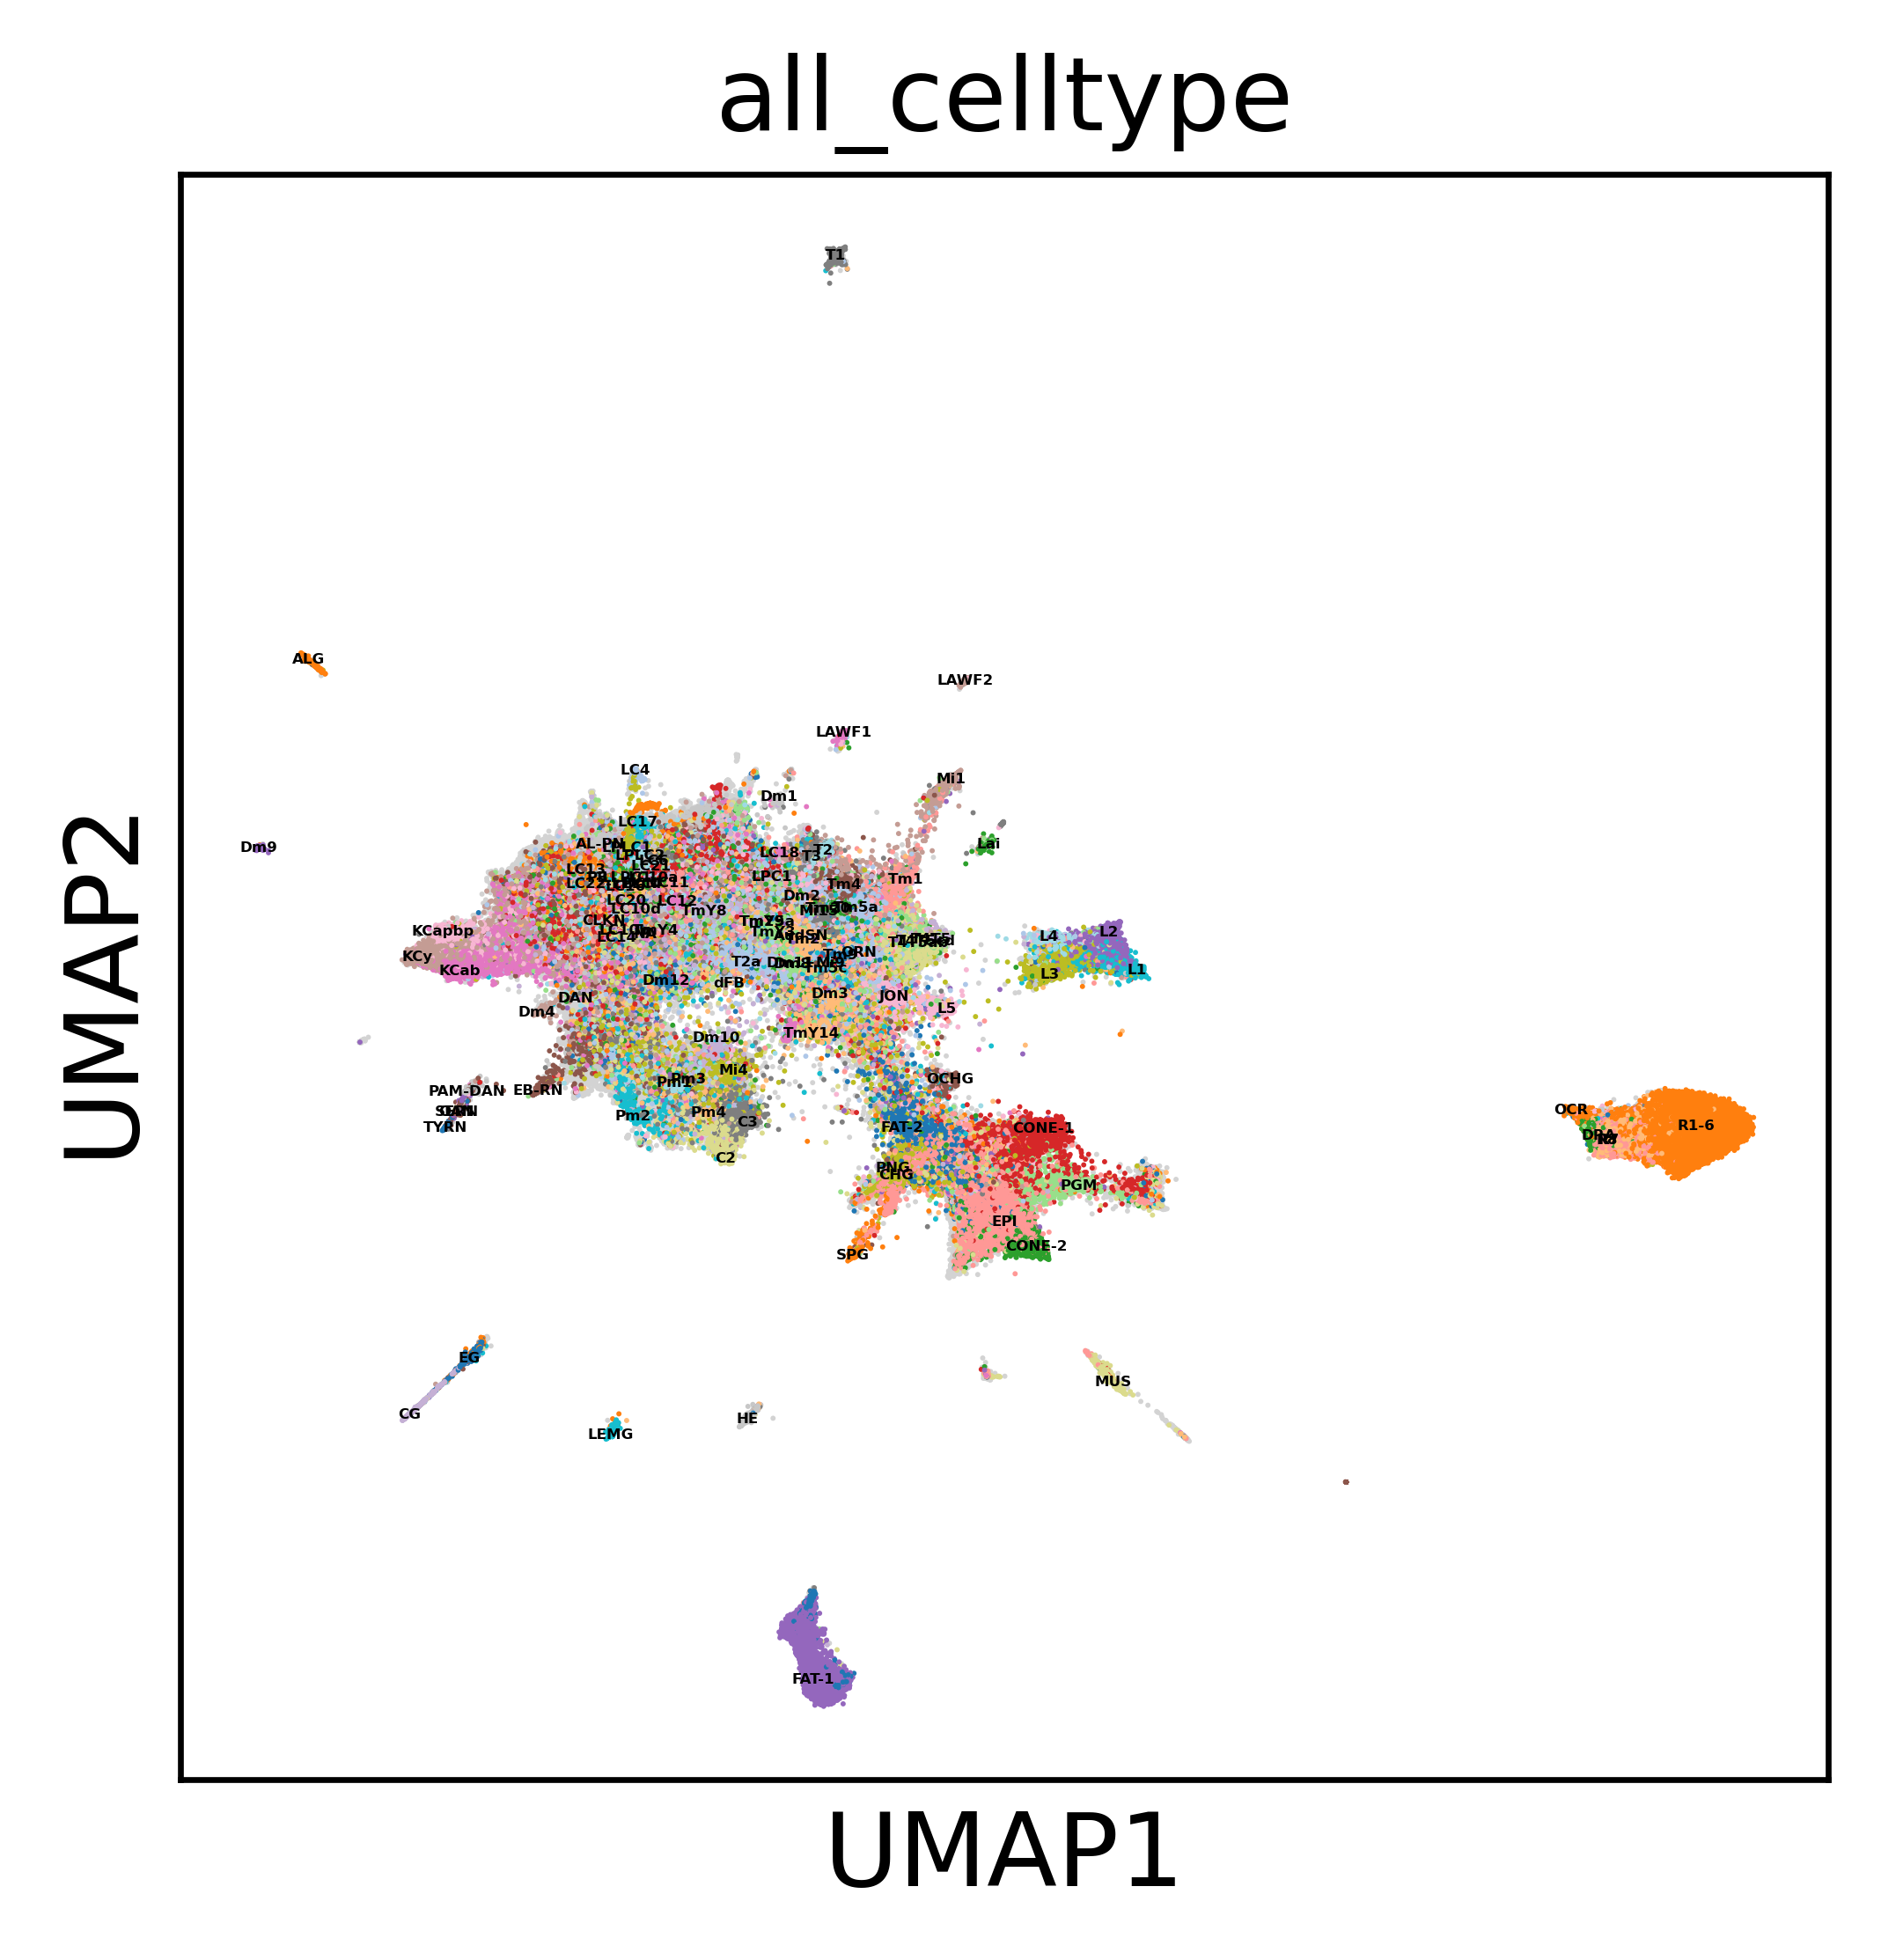

In [209]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique annotation labels
unique_annotations = integrated_davie_data.obs['all_celltype'].unique()

# Generate a large set of distinct colors
num_colors = len(unique_annotations)
palette = sns.color_palette("tab20", num_colors)  # Use "tab20", "tab20b", "tab20c", or "hsv" for more colors
color_dict = dict(zip(unique_annotations, palette))

# Assign colors to annotation categories
integrated_davie_data.obs['all_celltype'] = integrated_davie_data.obs['all_celltype'].astype('string')
sc.pl.umap(integrated_davie_data, color='all_celltype', palette=color_dict, legend_loc="on data", legend_fontsize=2, size = 2)


/ru-auth/local/home/pkim/miniconda3/envs/workshop_2024/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/ru-auth/local/home/pkim/miniconda3/envs/workshop_2024/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


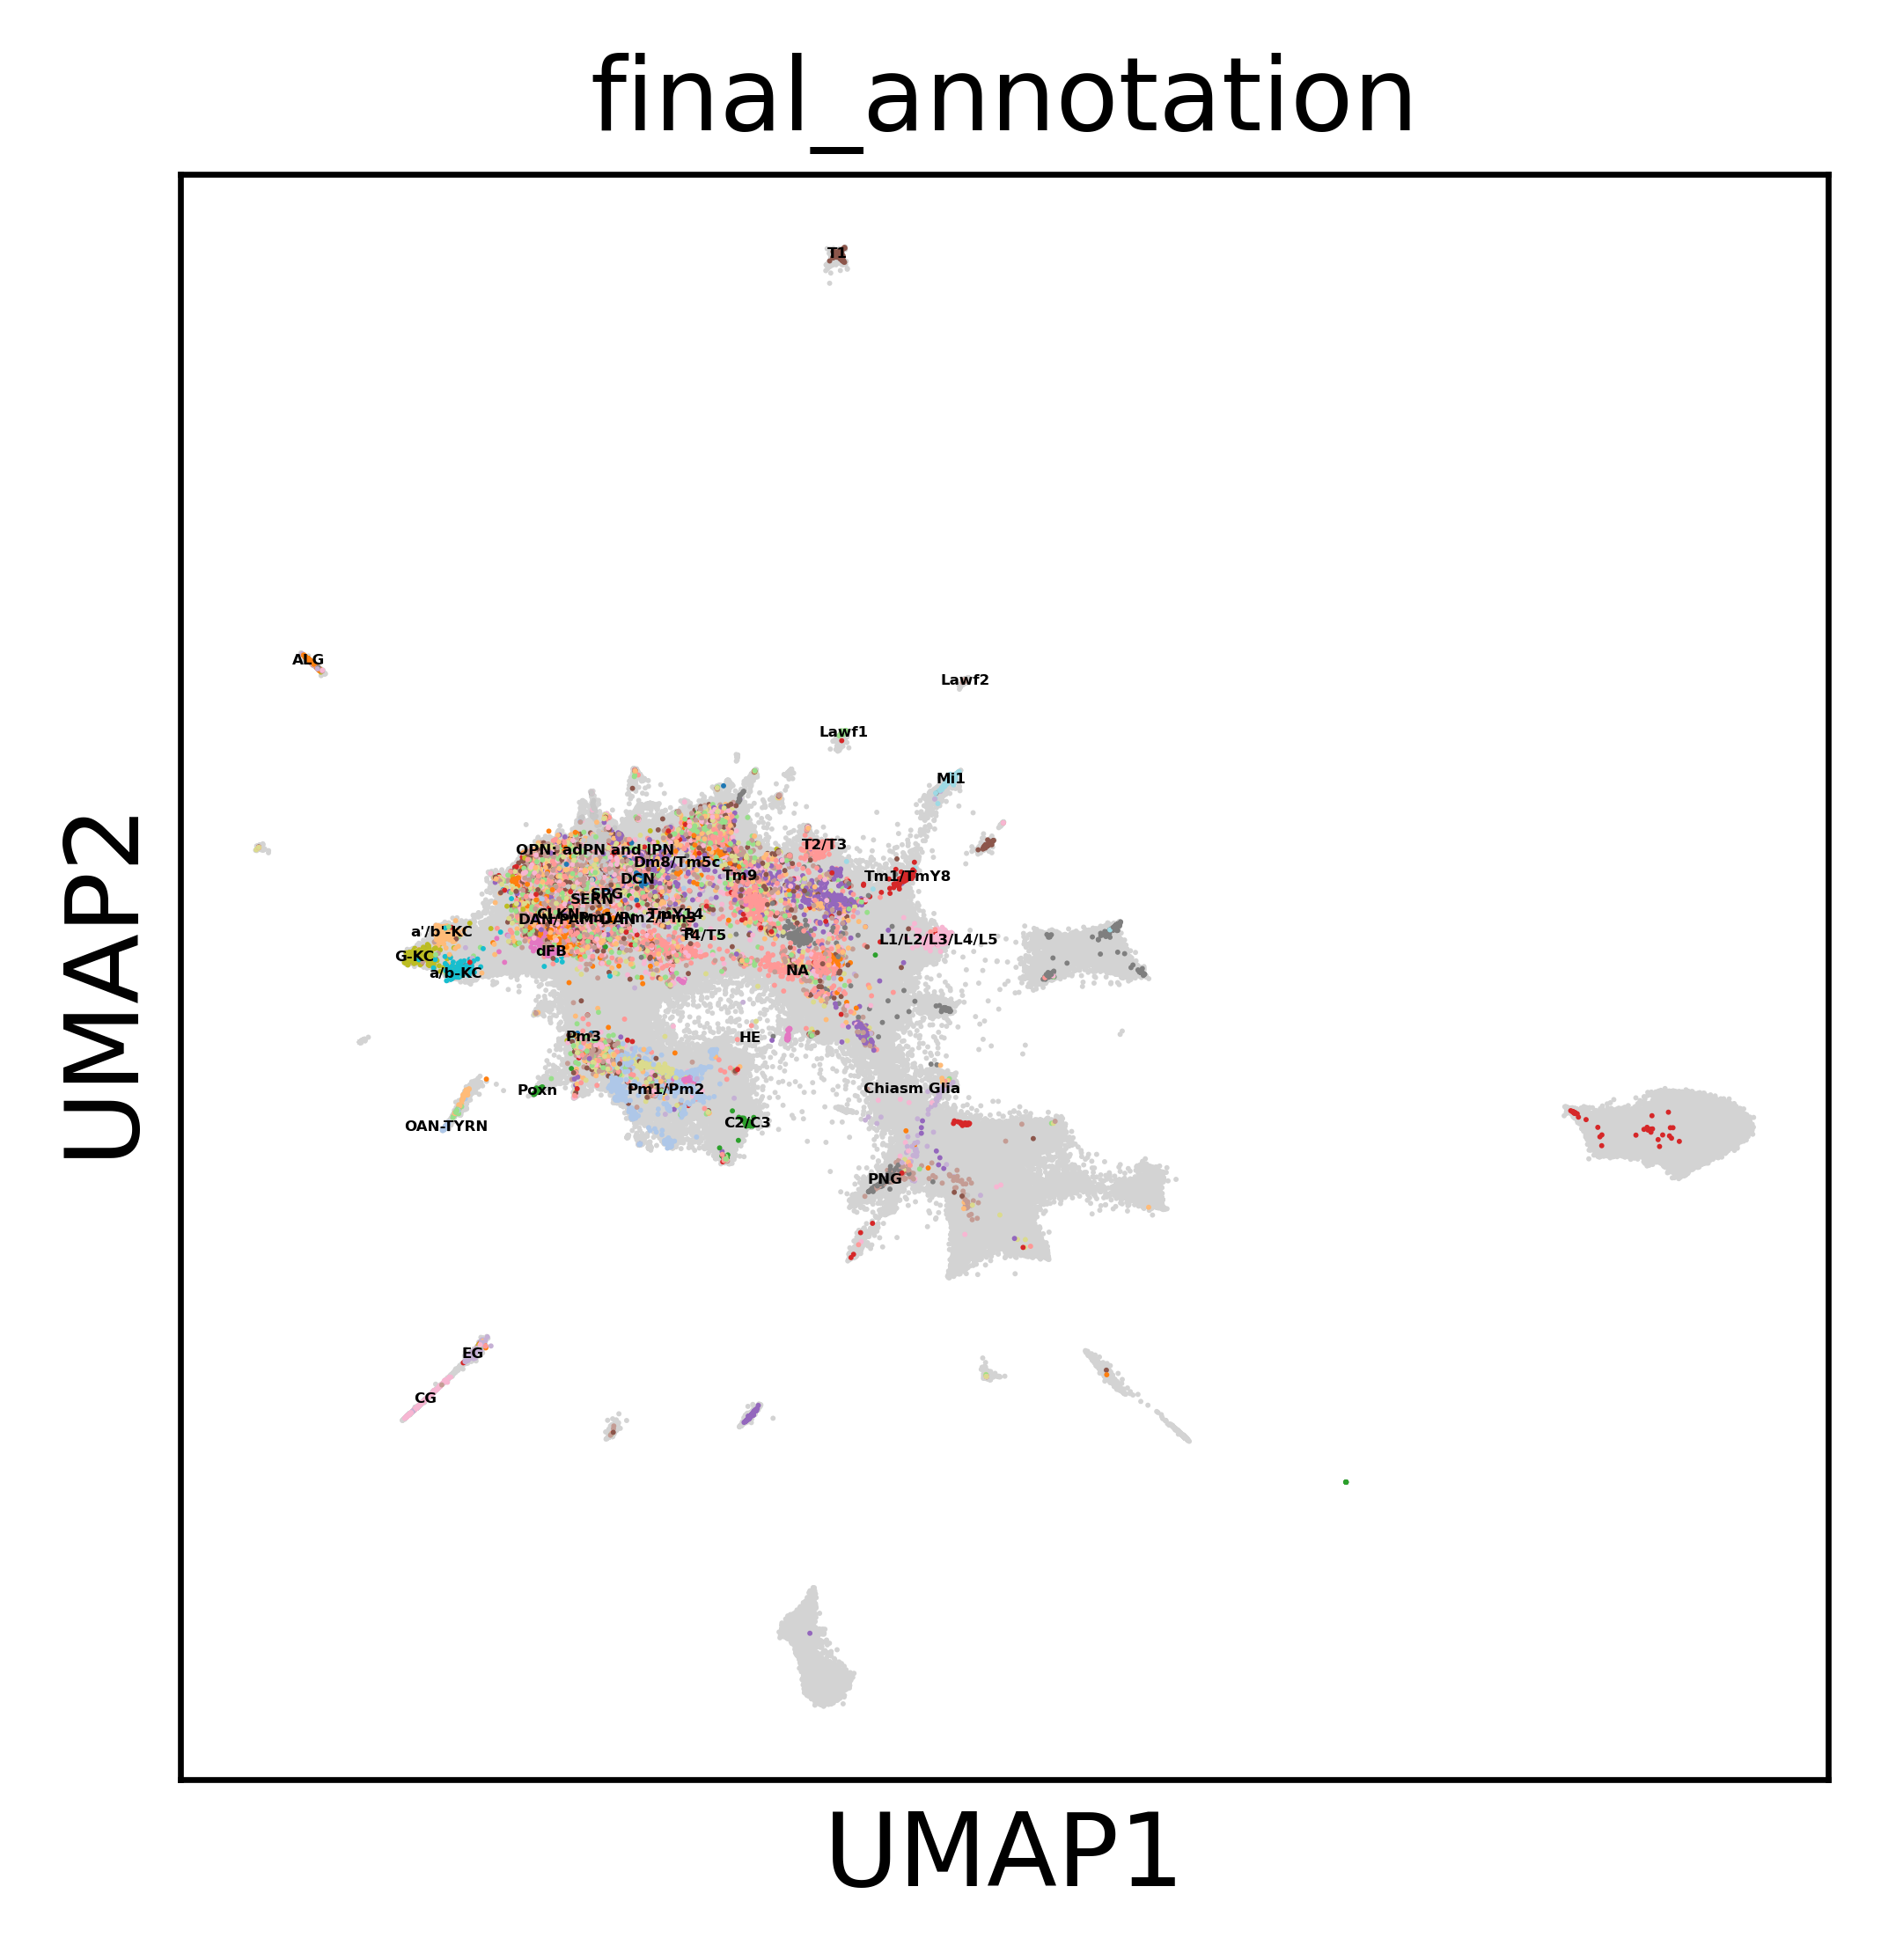

In [205]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique annotation labels
unique_annotations = integrated_davie_data.obs['final_annotation'].unique()

# Generate a large set of distinct colors
num_colors = len(unique_annotations)
palette = sns.color_palette("tab20", num_colors)  # Use "tab20", "tab20b", "tab20c", or "hsv" for more colors
color_dict = dict(zip(unique_annotations, palette))

# Assign colors to annotation categories
integrated_davie_data.obs['final_annotation'] = integrated_davie_data.obs['final_annotation'].astype('string')
sc.pl.umap(integrated_davie_data, color='final_annotation', palette=color_dict, legend_loc="on data", legend_fontsize=2, size = 2)


In [180]:
integrated_davie_data.obs.loc[integrated_davie_data.obs['all_celltype'] == 'Unannotated', 'all_celltype'] = np.nan

In [185]:
#integrated_davie_data.obs['final_annotation'] = integrated_davie_data.obs['annotation']

In [189]:
integrated_davie_data.obs['final_annotation'] = integrated_davie_data.obs['final_annotation'].astype('string')

In [204]:
integrated_davie_data.obs.loc[integrated_davie_data.obs['final_annotation'] == 'Clock neurons', 'final_annotation'] = "CLKN"
integrated_davie_data.obs.loc[integrated_davie_data.obs['final_annotation'] == 'Perineurial glia', 'final_annotation'] = "PNG"
integrated_davie_data.obs.loc[integrated_davie_data.obs['final_annotation'] == 'Cortex Glia', 'final_annotation'] = "CG"
integrated_davie_data.obs.loc[integrated_davie_data.obs['final_annotation'] == 'CCAP', 'final_annotation'] = np.nan
integrated_davie_data.obs.loc[integrated_davie_data.obs['final_annotation'] == 'DN1', 'final_annotation'] = np.nan
integrated_davie_data.obs.loc[integrated_davie_data.obs['final_annotation'] == 'Tm5ab', 'final_annotation'] = np.nan
integrated_davie_data.obs.loc[integrated_davie_data.obs['final_annotation'] == 'Ensheathing glia', 'final_annotation'] = "EG"
integrated_davie_data.obs.loc[integrated_davie_data.obs['final_annotation'] == 'Ensheathing Glia', 'final_annotation'] = "EG"
integrated_davie_data.obs.loc[integrated_davie_data.obs['final_annotation'] == 'MBON', 'final_annotation'] = np.nan
integrated_davie_data.obs.loc[integrated_davie_data.obs['final_annotation'] == 'Capa neurons', 'final_annotation'] = np.nan
integrated_davie_data.obs.loc[integrated_davie_data.obs['final_annotation'] == 'Hemocytes', 'final_annotation'] = "HE"
integrated_davie_data.obs.loc[integrated_davie_data.obs['final_annotation'] == 'Photoreceptors', 'final_annotation'] = "R"
integrated_davie_data.obs.loc[integrated_davie_data.obs['final_annotation'] == 'Octopaminergic-Tyraminergic', 'final_annotation'] = "OAN-TYRN"
integrated_davie_data.obs.loc[integrated_davie_data.obs['final_annotation'] == 'Peptidergic', 'final_annotation'] = np.nan
integrated_davie_data.obs.loc[integrated_davie_data.obs['final_annotation'] == 'unannotated', 'final_annotation'] = np.nan
integrated_davie_data.obs.loc[integrated_davie_data.obs['final_annotation'] == 'Astrocyte-like', 'final_annotation'] = "ALG"
integrated_davie_data.obs.loc[integrated_davie_data.obs['final_annotation'] == 'Mt1', 'final_annotation'] = np.nan
integrated_davie_data.obs.loc[integrated_davie_data.obs['final_annotation'] == 'Serotonergic', 'final_annotation'] = "SERN"
integrated_davie_data.obs.loc[integrated_davie_data.obs['final_annotation'] == 'IPC', 'final_annotation'] = np.nan
integrated_davie_data.obs.loc[integrated_davie_data.obs['final_annotation'] == 'Subperineurial Glia', 'final_annotation'] = "SPG"
integrated_davie_data.obs.loc[integrated_davie_data.obs['final_annotation'] == 'Gr43a neurons', 'final_annotation'] = np.nan
integrated_davie_data.obs.loc[integrated_davie_data.obs['final_annotation'] == 'Dopaminergic', 'final_annotation'] = "DAN/PAM-DAN"
integrated_davie_data.obs.loc[integrated_davie_data.obs['final_annotation'] == 'Mip', 'final_annotation'] = np.nan

In [ ]:
sc.set_figure_params(dpi = 300)

In [102]:
#integrated_davie_data.write_h5ad('/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:01:31/davie_adata_integrated_2.h5ad')

In [ ]:
integrated_davie_data

In [18]:
integrated_davie_data = sc.read_h5ad('/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:01:31/davie_adata_integrated_2.h5ad')

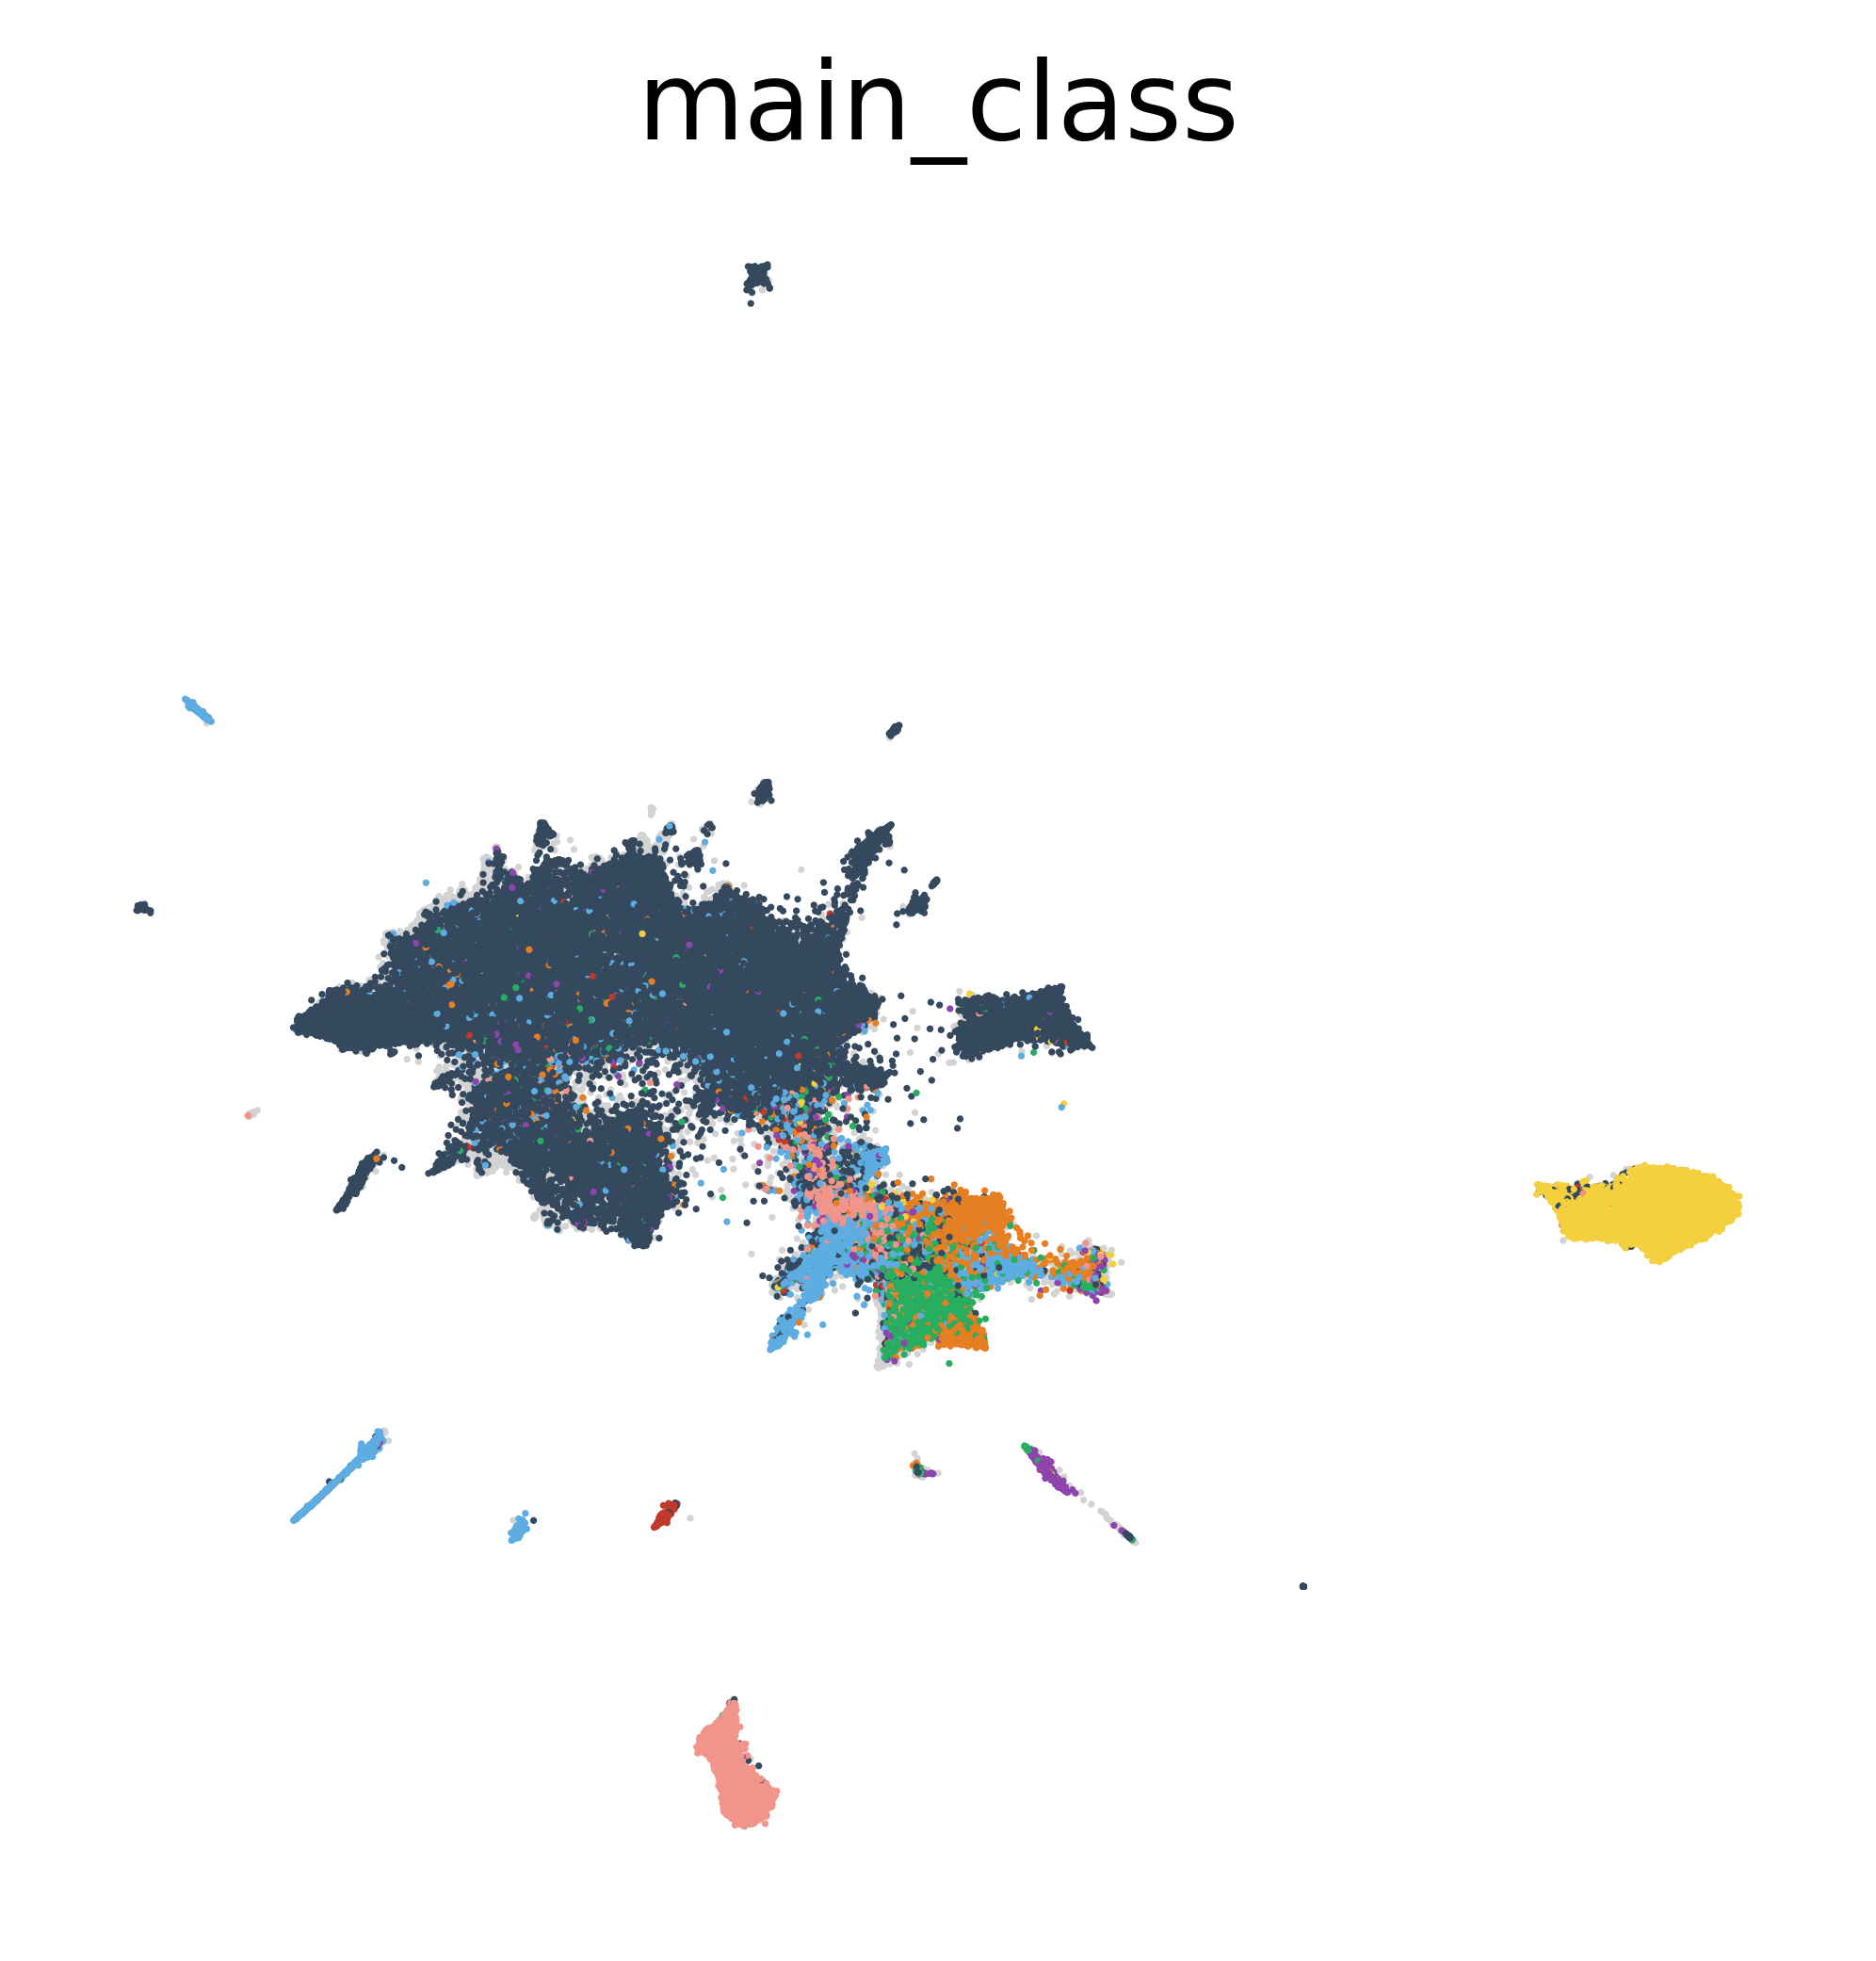

In [67]:
# Master mapping dictionary for both datasets
main_class_map = {
    # Photoreceptors
    'R1-6': 'Photoreceptor',
    'R7': 'Photoreceptor',
    'R8': 'Photoreceptor',
    'DRA': 'Photoreceptor',
    'OCR': 'Photoreceptor',

    # Cone
    'CONE-2': 'Cone',
    'CONE-1': 'Cone', 
    
    # Glia
    'SPG': 'Glia',
    'OCHG': 'Glia',
    'CHG': 'Glia',
    'PNG': 'Glia',
    'CG': 'Glia',
    'EG': 'Glia',
    'LEMG': 'Glia',
    'PGM': 'Glia',
    'ASTG': 'Glia',
    'ALG': 'Glia',

    # Fat
    'FAT-1': 'Fat',
    'FAT-2': 'Fat',

    #Epithelial
    'EPI': 'Epithelial',
    
    # Hemocytes
    'HE': 'Hemocytes',

    # Muscle
    'MUS': 'Muscle',

    # Neurons (catch-all for neuronal subtypes)
    'KC': 'Neuron',
    'KCy': 'Neuron',
    'KCab': 'Neuron',
    'KCapbp': 'Neuron',
    'ORN': 'Neuron', 
    'AudSN': 'Neuron', 
    'JON': 'Neuron', 
    'EB-RN': 'Neuron',
    'PAM-DAN': 'Neuron', 
    'DAN': 'Neuron',
    'SERN': 'Neuron',
    'OAN': 'Neuron',
    'OAN-TYRN': 'Neuron',
    'TYRN': 'Neuron',
    'Tm5a': 'Neuron',
    'Lai': 'Neuron',
    'TmY3': 'Neuron',
    'T4T5': 'Neuron',
    'TmY4': 'Neuron',
    'LC12': 'Neuron',
    'JON': 'Neuron',
    'T1': 'Neuron',
    'AL-PN': 'Neuron',
    'L3': 'Neuron', 
    'T4T5ab': 'Neuron',
    'LC17': 'Neuron',
    'LPLC2': 'Neuron',
    'Tm9': 'Neuron', 
    'LC4': 'Neuron',
    'TmY14': 'Neuron',
    'LC10a': 'Neuron',
    'Tm1': 'Neuron',
    'L2': 'Neuron',
    'EB-RN': 'Neuron',
    'Mi1': 'Neuron',
    'KCab': 'Neuron',
    'KCapbp': 'Neuron',
    'Mi15': 'Neuron',
    'Mi4': 'Neuron',
    'Mi9': 'Neuron',
    'T2': 'Neuron',
    'T2a': 'Neuron',
    'Tm2': 'Neuron', 
    'T4T5cd': 'Neuron',
    'CLKN': 'Neuron',
    'Dm9': 'Neuron',
    'Dm10': 'Neuron',
    'DAN': 'Neuron',
    'KCy': 'Neuron',
    'LAWF1': 'Neuron',
    'L5': 'Neuron',
    'T3': 'Neuron',
    'PAM-DAN': 'Neuron',
    'LC10b': 'Neuron',
    'L1': 'Neuron',
    'L4': 'Neuron',
    'ORN': 'Neuron',
    'PB': 'Neuron',
    'Dm3': 'Neuron',
    'LLPC1': 'Neuron',
    'Dm8': 'Neuron',
    'LPC1': 'Neuron',
    'LC14': 'Neuron',
    'TmY8': 'Neuron',
    'Tm4': 'Neuron',
    'LAWF2': 'Neuron',
    'dFB': 'Neuron',
    'Dm2': 'Neuron',
    'C3': 'Neuron',
    'LC16': 'Neuron',
    'LPLC1': 'Neuron',
    'C2': 'Neuron',
    'LC21': 'Neuron',
    'Dm12': 'Neuron',
    'TmY5a': 'Neuron',
    'Pm4': 'Neuron',
    'Tm20': 'Neuron',
    'AudSN': 'Neuron',
    'LC22-LPLC4': 'Neuron',
    'LC11': 'Neuron',
    'SERN': 'Neuron',
    'LC10d': 'Neuron',
    'Pm3': 'Neuron',
    'Dm4': 'Neuron',
    'LC18': 'Neuron', 
    'Dm11': 'Neuron',
    'LC6': 'Neuron',
    'Dm1': 'Neuron',
    'LC20': 'Neuron',
    'OAN': 'Neuron',
    'Pm2': 'Neuron',
    'Pm1': 'Neuron',
    'TYRN': 'Neuron',
    'Tm5c': 'Neuron',
    'LC13': 'Neuron',
    'DCN': 'Neuron',
    'Tm29': 'Neuron',

    # Miscellaneous / Unknown
    'Unannotated': 'Unannotated'
}

# Canonical order (same for both)
MAIN_CLASSES = [
    'Photoreceptor','Cone','Glia','Fat','Epithelial','Hemocytes','Muscle','Neuron','Unannotated'
]

MAIN_COLORS = {
    'Photoreceptor': '#F4D03F',
    'Cone':          '#E67E22',
    'Glia':          '#5DADE2',
    'Fat':           '#F1948A',
    'Epithelial':    '#27AE60',
    'Hemocytes':     '#C0392B',
    'Muscle':        '#8E44AD',
    'Neuron':        '#34495E',
    'Unannotated':   '#BDC3C7',
}

def assign_main_class(adata, column_name):
    def _map(lbl):
        if pd.isna(lbl):
            return 'Unannotated'
        return main_class_map.get(lbl, 'Unannotated')
    adata.obs['main_class'] = adata.obs[column_name].apply(_map)
    # Force identical category set/order in both objects
    adata.obs['main_class'] = pd.Categorical(adata.obs['main_class'], categories=MAIN_CLASSES, ordered=False)
    # Store the palette in the same order as MAIN_CLASSES
    adata.uns['main_class_colors'] = [MAIN_COLORS[c] for c in MAIN_CLASSES]
    return adata

# Apply to both datasets (using your chosen source column for each)
adata_1 = assign_main_class(integrated_davie_data.copy(), column_name='all_celltype')

# Ensure stable categories/colors across datasets
MAIN_CLASSES = ['Photoreceptor','Cone','Glia','Fat','Epithelial','Hemocytes','Muscle','Neuron','Unannotated']
adata_1.obs['main_class'] = pd.Categorical(adata_1.obs['main_class'].astype('object').fillna('Unannotated'),
                                           categories=MAIN_CLASSES, ordered=False)

# Build list of non-Unannotated groups actually present
keep = [c for c in MAIN_CLASSES if c != 'Unannotated' and (adata_1.obs['main_class'] == c).any()]

# 1) Unannotated first (background)
ax = sc.pl.umap(
    adata_1, color='main_class', groups=['Unannotated'],
    size=2, alpha=0.15, frameon=False, legend_loc=None, title='Dopp', show=False
)

# 2) Then overlay all other classes
sc.pl.umap(
    adata_1, color='main_class', groups=keep,
    size=3, alpha=1.0, frameon=False, legend_loc=None,
    ax=ax, show=True
)


In [20]:
print(integrated_davie_data.obs['annotation'].unique().tolist())

[nan, 'unannotated', 'Pm1/Pm2', 'Astrocyte-like', 'Dopaminergic', 'C2/C3', 'Mt1', 'Serotonergic', 'Tm1/TmY8', 'TmY14', 'Tm9', 'Ensheathing Glia', 'Dm8/Tm5c', 'IPC', 'Subperineurial Glia', 'Gr43a neurons', 'dFB', 'T4/T5', 'L1/L2/L3/L4/L5', 'Mip', 'OPN: adPN and lPN', 'G-KC', 'Pm1/Pm2/Pm3', 'a/b-KC', 'Mi1', 'DCN', 'Peptidergic', 'Octopaminergic-Tyraminergic', 'Clock neurons', "a'/b'-KC", 'Poxn', 'Lawf1', 'Photoreceptors', 'T2/T3', 'Hemocytes', 'Capa neurons', 'Chiasm Glia', 'T1', 'Lawf2', 'Pm3', 'MBON', 'Ensheathing glia', 'Cortex Glia', 'Perineurial glia', 'Tm5ab', 'DN1', 'CCAP']


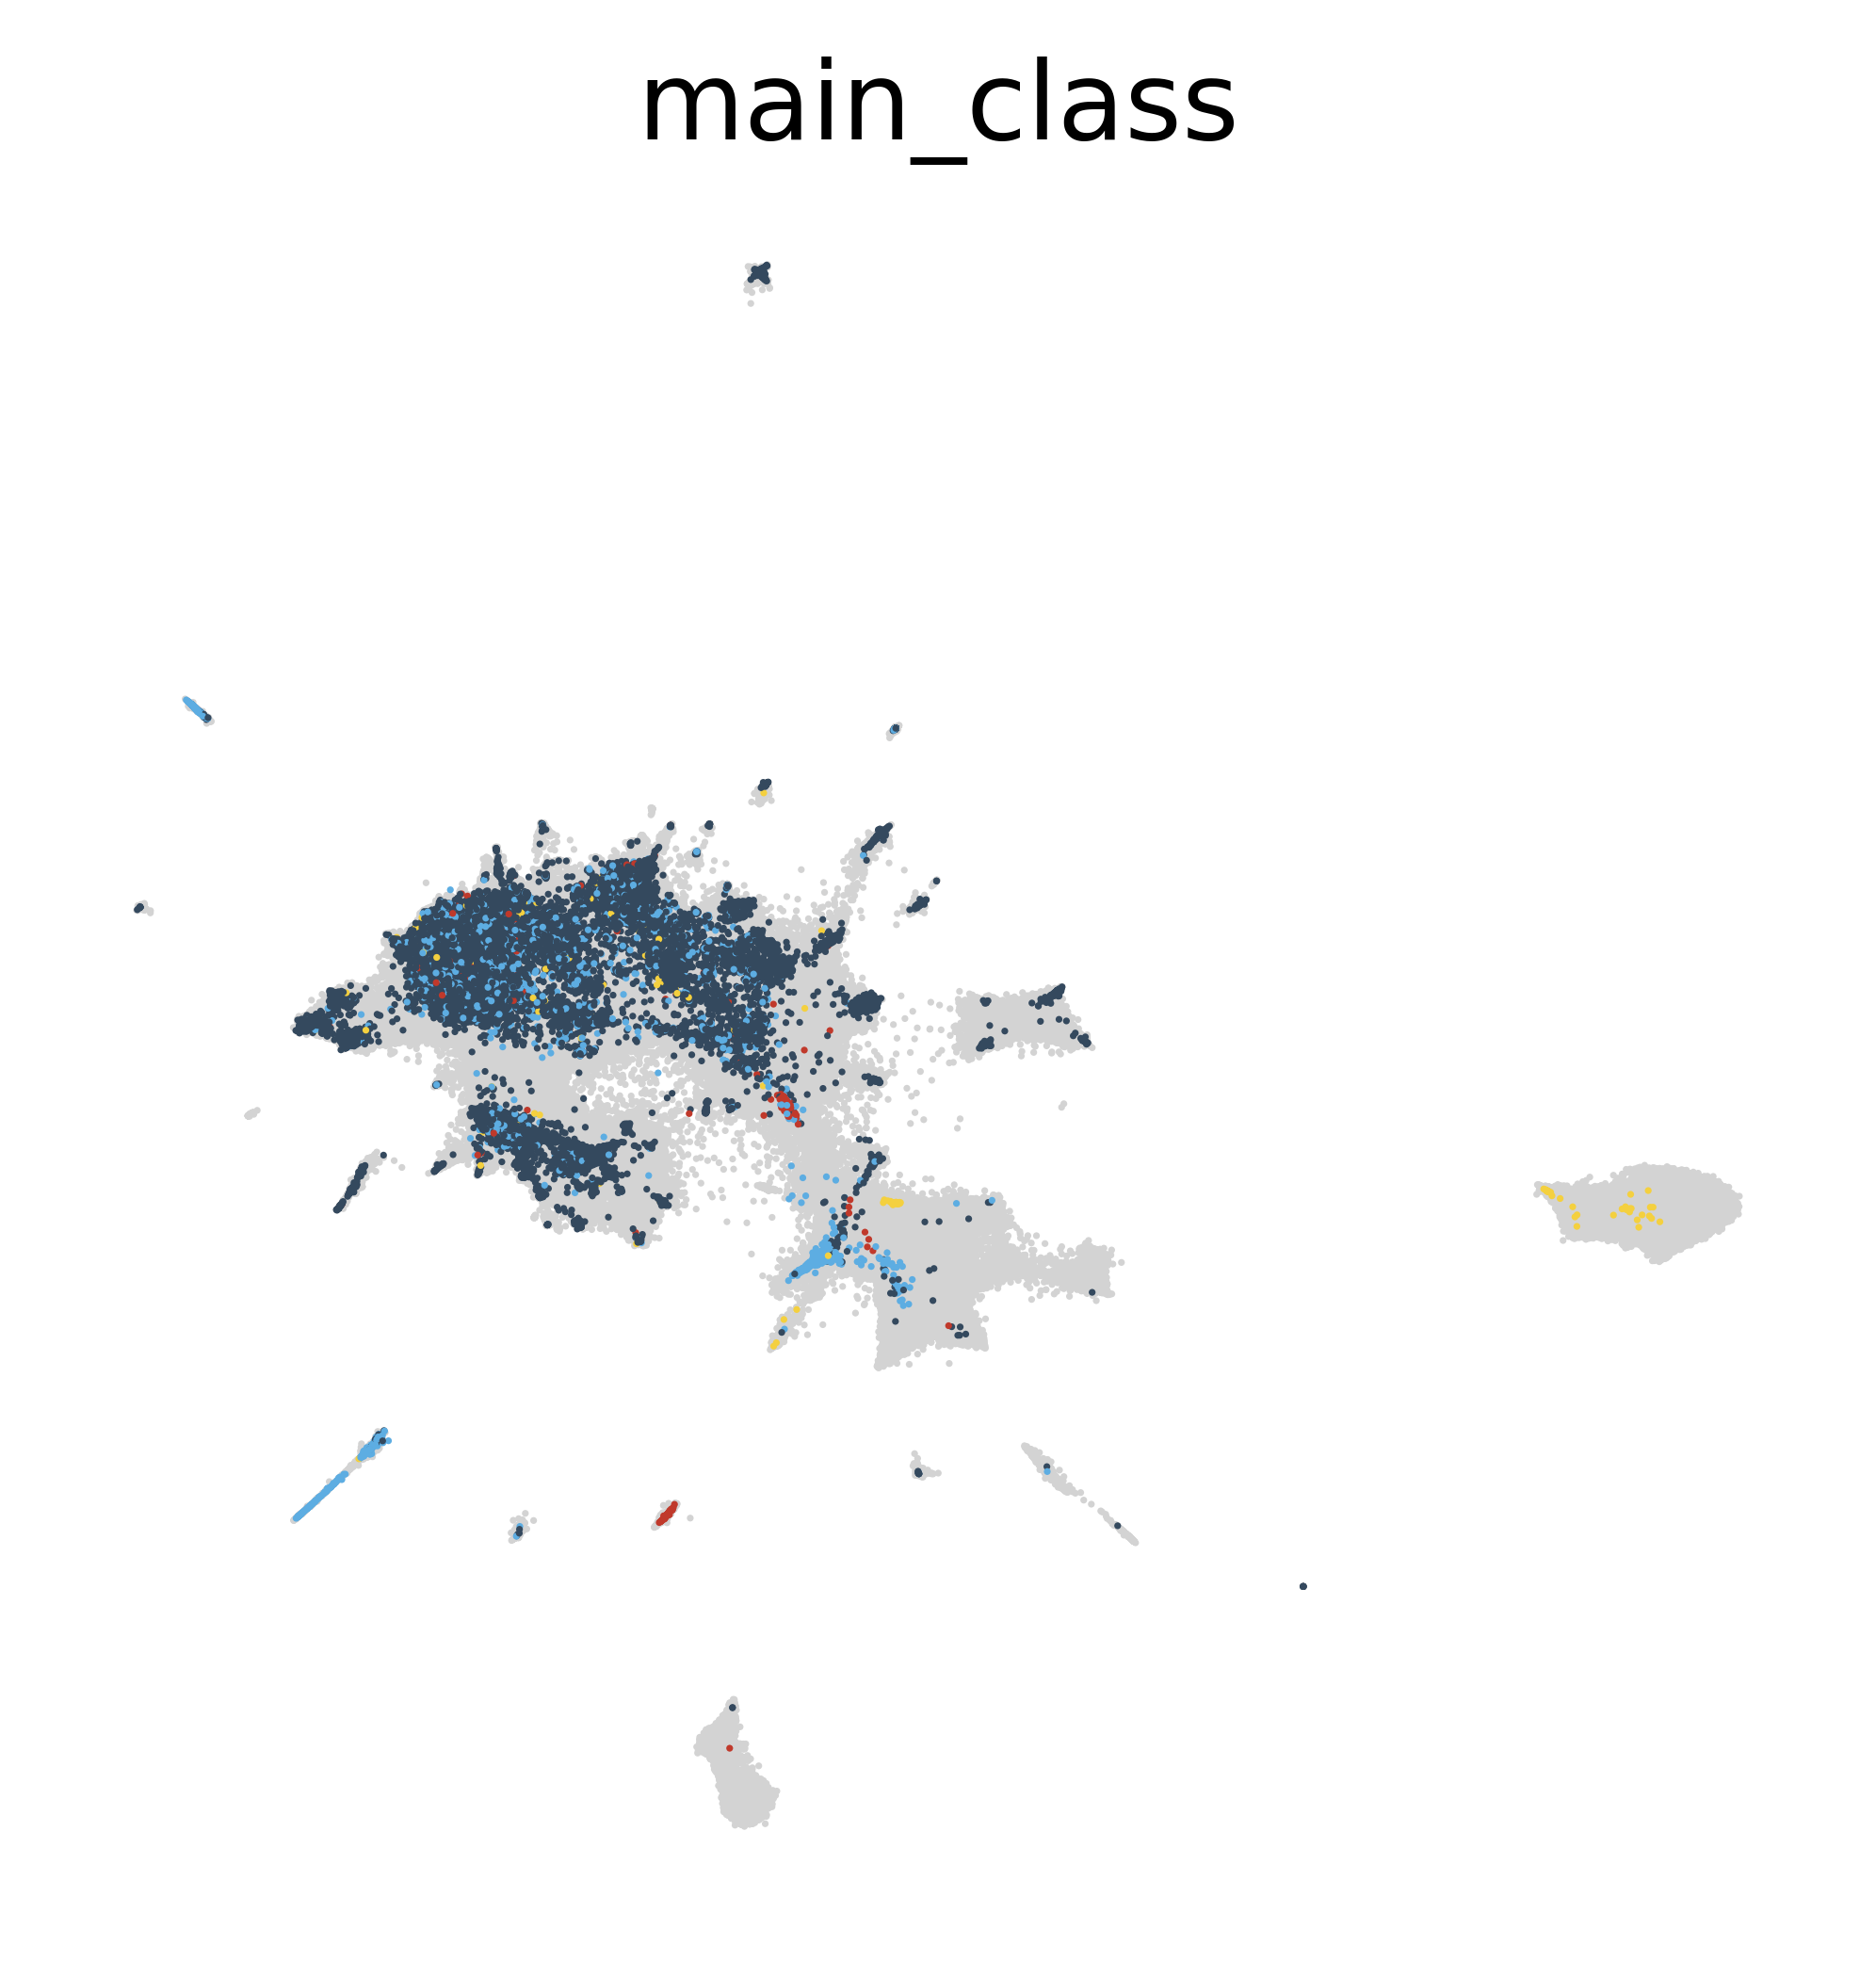

In [68]:
# Master mapping dictionary for both datasets
main_class_map = {
    # Photoreceptors
    'Photoreceptors': 'Photoreceptor',
    
    # Glia
    'Astrocyte-like': 'Glia',
    'Ensheathing Glia': 'Glia',
    'Subperineurial Glia' : 'Glia',
    'Ensheathing glia': 'Glia',
    'Perineurial glia': 'Glia',
    'Cortex Glia': 'Glia',
    
    # Hemocytes
    'Hemocytes': 'Hemocytes',

    # Neurons (catch-all for neuronal subtypes)
    'Pm1/Pm2': 'Neuron',
    'Dopaminergic': 'Neuron',
    'C2/C3': 'Neuron',
    'Mt1': 'Neuron',
    'Serotonergic': 'Neuron',
    'Tm1/TmY8': 'Neuron',
    'TmY14': 'Neuron',
    'Tm9': 'Neuron',
    'Dm8/Tm5c': 'Neuron',
    'IPC': 'Neuron', 
    'Gr43a neurons': 'Neuron',
    'dFB': 'Neuron', 
    'T4/T5': 'Neuron',
    'L1/L2/L3/L4/L5': 'Neuron',
    'Mip': 'Neuron',
    'OPN: adPN and lPN': 'Neuron',
    'G-KC': 'Neuron', 
    'Pm1/Pm2/Pm3': 'Neuron', 
    'a/b-KC': 'Neuron', 
    'Mi1': 'Neuron', 
    'DCN': 'Neuron', 
    'Peptidergic': 'Neuron',
    'Octopaminergic-Tyraminergic': 'Neuron',
    'Clock neurons': 'Neuron',
    "a'/b'-KC": 'Neuron',
    'Poxn': 'Neuron', 
    'Lawf1': 'Neuron',
    'T2/T3': 'Neuron', 
    'Capa neurons': 'Neuron', 
    'Chiasm Glia': 'Neuron',
    'T1': 'Neuron', 
    'Lawf2': 'Neuron', 
    'Pm3': 'Neuron', 
    'MBON': 'Neuron', 
    'Tm5ab': 'Neuron',
    'DN1': 'Neuron', 
    'CCAP': 'Neuron',
    
    # Miscellaneous / Unknown
    'unannotated': 'Unannotated'
}

# Canonical order (same for both)
MAIN_CLASSES = [
    'Photoreceptor','Cone','Glia','Fat','Epithelial','Hemocytes','Muscle','Neuron','Unannotated'
]

MAIN_COLORS = {
    'Photoreceptor': '#F4D03F',
    'Cone':          '#E67E22',
    'Glia':          '#5DADE2',
    'Fat':           '#F1948A',
    'Epithelial':    '#27AE60',
    'Hemocytes':     '#C0392B',
    'Muscle':        '#8E44AD',
    'Neuron':        '#34495E',
    'Unannotated':   '#BDC3C7',
}

def assign_main_class(adata, column_name):
    def _map(lbl):
        if pd.isna(lbl):
            return 'Unannotated'
        return main_class_map.get(lbl, 'Unannotated')
    adata.obs['main_class'] = adata.obs[column_name].apply(_map)
    # Force identical category set/order in both objects
    adata.obs['main_class'] = pd.Categorical(adata.obs['main_class'], categories=MAIN_CLASSES, ordered=False)
    # Store the palette in the same order as MAIN_CLASSES
    adata.uns['main_class_colors'] = [MAIN_COLORS[c] for c in MAIN_CLASSES]
    return adata

# Apply to both datasets (using your chosen source column for each)
adata_2 = assign_main_class(integrated_davie_data.copy(), column_name='annotation')

# Ensure stable categories/colors across datasets
MAIN_CLASSES = ['Photoreceptor','Cone','Glia','Fat','Epithelial','Hemocytes','Muscle','Neuron','Unannotated']
adata_2.obs['main_class'] = pd.Categorical(adata_2.obs['main_class'].astype('object').fillna('Unannotated'),
                                           categories=MAIN_CLASSES, ordered=False)

# Build list of non-Unannotated groups actually present
keep = [c for c in MAIN_CLASSES if c != 'Unannotated' and (adata_2.obs['main_class'] == c).any()]

# 1) Unannotated first (background)
ax = sc.pl.umap(
    adata_2, color='main_class', groups=['Unannotated'],
    size=2, alpha=0.15, frameon=False, legend_loc=None, title='Dopp', show=False
)

# 2) Then overlay all other classes
sc.pl.umap(
    adata_2, color='main_class', groups=keep,
    size=3, alpha=1.0, frameon=False, legend_loc=None,
    ax=ax, show=True
)


# Dopp

In [103]:
dopp = sc.read_h5ad("/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2024:10:11/dopp.h5ad")

In [104]:
# Identify mitochondrial genes
dopp.var['mt'] = dopp.var_names.str.startswith('mt:')
dopp.var['tRNA'] = dopp.var_names.str.contains('tRNA')
dopp.var['ribo'] = dopp.var_names.str.contains('rRNA')

In [105]:
# Normalize and log-transform `ozel`
sc.pp.normalize_total(dopp, target_sum=1e4)
sc.pp.log1p(dopp)

# Identify highly variable genes for `ozel`
sc.pp.highly_variable_genes(dopp, flavor='seurat', n_top_genes=5000, inplace=True)

# Identify genes to exclude from common gene selection
excluded_genes = set(adata.var_names[adata.var['mt'] | adata.var['tRNA'] | adata.var['ribo']]) | \
                 set(dopp.var_names[dopp.var['mt'] | dopp.var['tRNA'] | dopp.var['ribo']])

# Get the original common genes based on highly variable genes
common_genes = list(set(adata.var_names[adata.var['highly_variable']]) &
                    set(dopp.var_names[dopp.var['highly_variable']]))

# Remove excluded genes from common genes
common_genes = list(set(common_genes) - excluded_genes)

adata_subset = adata[:, common_genes]
dopp_subset = dopp[:, common_genes]

len(common_genes)

/ru-auth/local/home/pkim/miniconda3/envs/workshop_2024/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


1568

In [106]:
# Concatenate adata and ozel after subsetting to common genes
import anndata as ad
combined_adata_dopp = ad.concat([adata_subset, dopp_subset], axis=0, join='outer', label='dataset', keys=['adata', 'dopp'])

# Prepare dataset list for Scanorama
adata_dopp_list = [combined_adata_dopp[combined_adata_dopp.obs['dataset'] == batch] for batch in combined_adata_dopp.obs['dataset'].unique()]

# Integrate using Scanorama
import scanorama
integrated_dopp_data = scanorama.correct_scanpy(adata_dopp_list, return_dimred=True)


Found 1568 genes among all datasets
[[0.         0.16753152]
 [0.         0.        ]]
Processing datasets (0, 1)


In [107]:
# Combine the integrated Scanorama datasets
integrated_dopp_data = ad.concat(
    integrated_dopp_data,
    axis=0,
    label='dataset',
    keys=combined_adata_dopp.obs['dataset'].unique(),
    merge='same'
)

# Assign Scanorama embeddings
integrated_dopp_data.obsm['X_scanorama'] = np.vstack([a.obsm['X_scanorama'] for a in integrated_dopp_data])


In [108]:
sc.tl.pca(integrated_dopp_data, n_comps=120, svd_solver='arpack')
sc.pp.neighbors(integrated_dopp_data, n_neighbors=50, n_pcs=120)
sc.tl.umap(integrated_dopp_data, min_dist=0.01)

In [233]:
print(integrated_dopp_data.obs['all_celltype'].unique().tolist())

[nan, 'Tm5a', 'R1-6', 'R7', 'Lai', 'TmY3', 'CONE-1', 'EPI', 'FAT-1', 'T4T5', 'OCHG', 'TmY4', 'LC12', 'JON', 'T1', 'AL-PN', 'L3', 'T4T5ab', 'LC17', 'LPLC2', 'Tm9', 'LC4', 'ALG', 'TmY14', 'CONE-2', 'PGM', 'LC10a', 'Tm1', 'L2', 'CG', 'EB-RN', 'Mi1', 'KCab', 'KCapbp', 'Mi15', 'HE', 'Mi4', 'MUS', 'Mi9', 'T2', 'FAT-2', 'T2a', 'SPG', 'Tm2', 'DRA', 'T4T5cd', 'CLKN', 'R8', 'Dm9', 'Dm10', 'DAN', 'KCy', 'LAWF1', 'L5', 'T3', 'PAM-DAN', 'PNG', 'LC10b', 'L1', 'L4', 'EG', 'ORN', 'PB', 'Dm3', 'LLPC1', 'Dm8', 'LPC1', 'CHG', 'LC14', 'TmY8', 'Tm4', 'LAWF2', 'dFB', 'Dm2', 'C3', 'LC16', 'LPLC1', 'C2', 'LEMG', 'LC21', 'Dm12', 'TmY5a', 'OCR', 'Pm4', 'Tm20', 'AudSN', 'LC22-LPLC4', 'LC11', 'SERN', 'LC10d', 'Pm3', 'Dm4', 'LC18', 'Dm11', 'LC6', 'Dm1', 'LC20', 'OAN', 'Pm2', 'Pm1', 'TYRN', 'Tm5c', 'LC13', 'DCN', 'Tm29']


In [232]:
integrated_dopp_data.obs.loc[integrated_dopp_data.obs['all_celltype'] == 'Unannotated', 'all_celltype'] = np.nan

In [242]:
integrated_dopp_data.obs['annotation'] = integrated_dopp_data.obs['annotation'].astype('string')
integrated_dopp_data.obs.loc[integrated_dopp_data.obs['annotation'] == 'Unannotated', 'annotation'] = np.nan
integrated_dopp_data.obs.loc[integrated_dopp_data.obs['annotation'] == 'EG_0', 'annotation'] = "EG"
integrated_dopp_data.obs.loc[integrated_dopp_data.obs['annotation'] == 'EG_1', 'annotation'] = "EG"
integrated_dopp_data.obs.loc[integrated_dopp_data.obs['annotation'] == 'EG_2', 'annotation'] = "EG"
integrated_dopp_data.obs.loc[integrated_dopp_data.obs['annotation'] == 'ring_1', 'annotation'] = "EB-RN"
integrated_dopp_data.obs.loc[integrated_dopp_data.obs['annotation'] == 'ring_2', 'annotation'] = "EB-RN"
integrated_dopp_data.obs.loc[integrated_dopp_data.obs['annotation'] == 'ALG_0', 'annotation'] = "ALG"

In [109]:
#integrated_dopp_data.write_h5ad('/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:01:31/dopp_adata_integrated_2.h5ad')

In [70]:
#loading the correct adata
adata = sc.read_h5ad('/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:01:22/all_data_combined_post_scrublet_neuron.h5ad')

In [26]:
integrated_dopp_data = sc.read_h5ad('/lustre/fs4/yng_lab/scratch/pkim/Singlecell/2025:01:31/dopp_adata_integrated_2.h5ad')

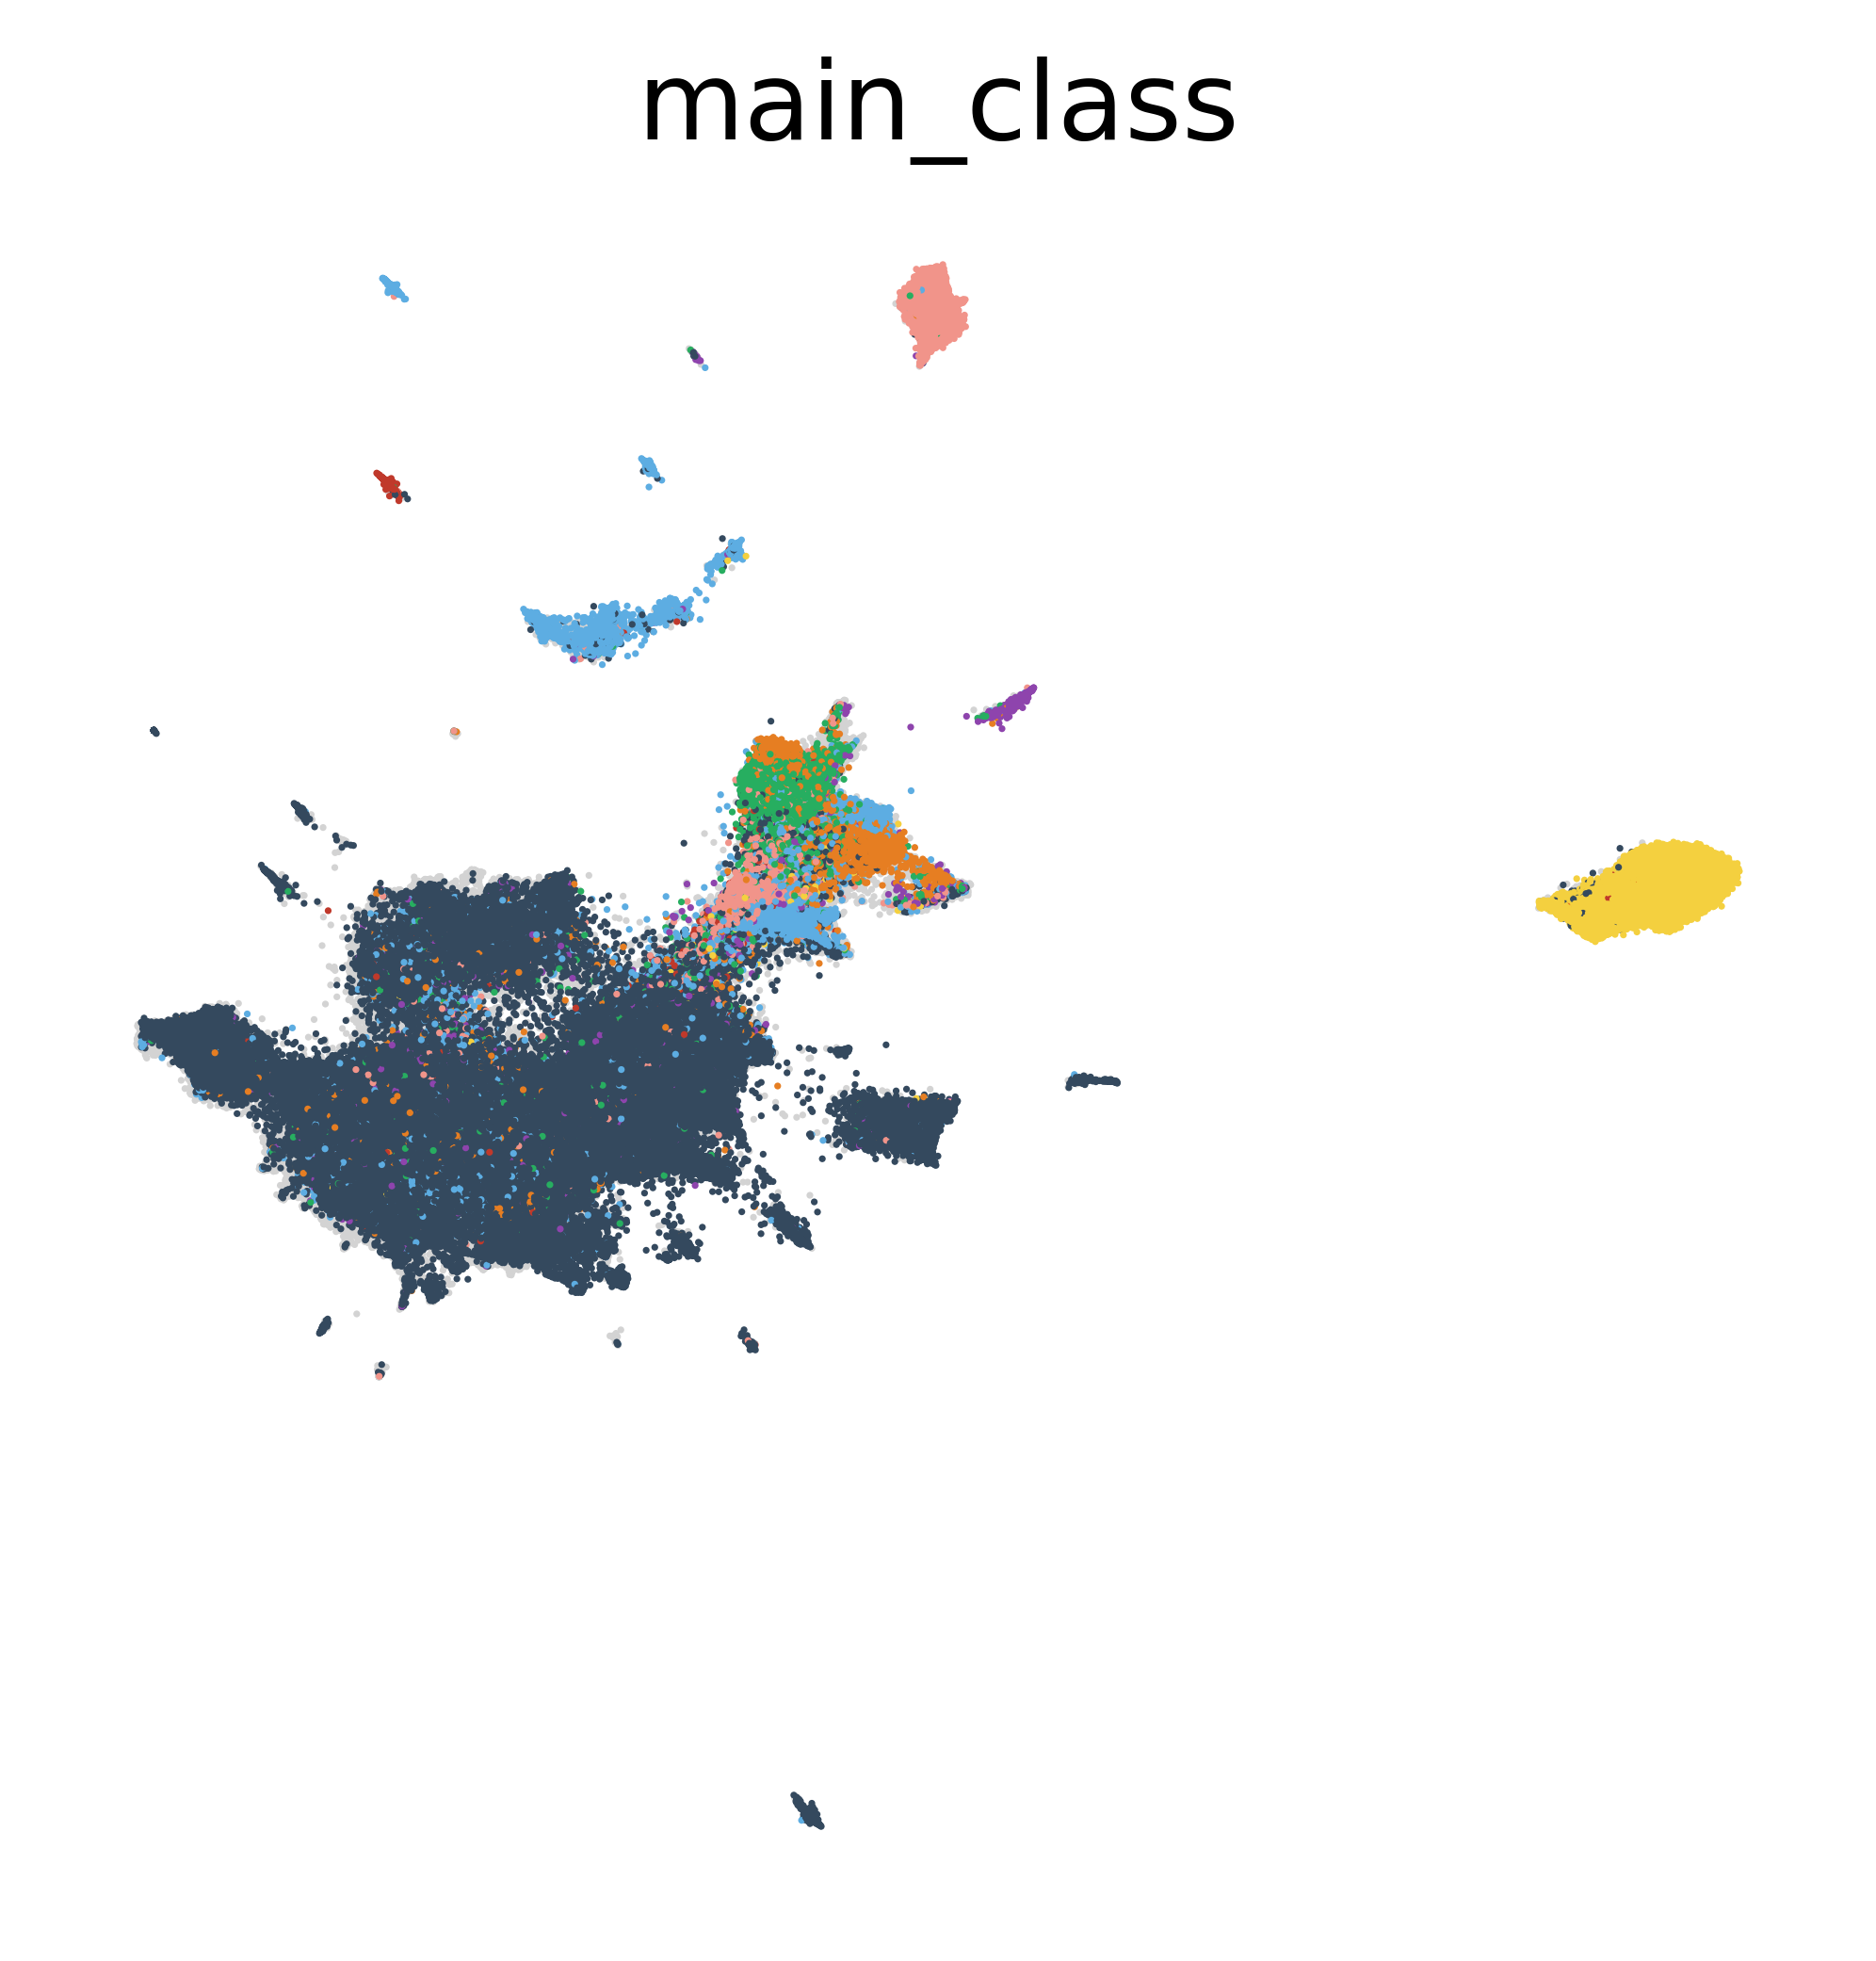

In [66]:
# Master mapping dictionary for both datasets
main_class_map = {
    # Photoreceptors
    'R1-6': 'Photoreceptor',
    'R7': 'Photoreceptor',
    'R8': 'Photoreceptor',
    'DRA': 'Photoreceptor',
    'OCR': 'Photoreceptor',

    # Cone
    'CONE-2': 'Cone',
    'CONE-1': 'Cone', 
    
    # Glia
    'SPG': 'Glia',
    'OCHG': 'Glia',
    'CHG': 'Glia',
    'PNG': 'Glia',
    'CG': 'Glia',
    'EG': 'Glia',
    'LEMG': 'Glia',
    'PGM': 'Glia',
    'ASTG': 'Glia',
    'ALG': 'Glia',

    # Fat
    'FAT-1': 'Fat',
    'FAT-2': 'Fat',

    #Epithelial
    'EPI': 'Epithelial',
    
    # Hemocytes
    'HE': 'Hemocytes',

    # Muscle
    'MUS': 'Muscle',

    # Neurons (catch-all for neuronal subtypes)
    'KC': 'Neuron',
    'KCy': 'Neuron',
    'KCab': 'Neuron',
    'KCapbp': 'Neuron',
    'ORN': 'Neuron', 
    'AudSN': 'Neuron', 
    'JON': 'Neuron', 
    'EB-RN': 'Neuron',
    'PAM-DAN': 'Neuron', 
    'DAN': 'Neuron',
    'SERN': 'Neuron',
    'OAN': 'Neuron',
    'OAN-TYRN': 'Neuron',
    'TYRN': 'Neuron',
    'Tm5a': 'Neuron',
    'Lai': 'Neuron',
    'TmY3': 'Neuron',
    'T4T5': 'Neuron',
    'TmY4': 'Neuron',
    'LC12': 'Neuron',
    'JON': 'Neuron',
    'T1': 'Neuron',
    'AL-PN': 'Neuron',
    'L3': 'Neuron', 
    'T4T5ab': 'Neuron',
    'LC17': 'Neuron',
    'LPLC2': 'Neuron',
    'Tm9': 'Neuron', 
    'LC4': 'Neuron',
    'TmY14': 'Neuron',
    'LC10a': 'Neuron',
    'Tm1': 'Neuron',
    'L2': 'Neuron',
    'EB-RN': 'Neuron',
    'Mi1': 'Neuron',
    'KCab': 'Neuron',
    'KCapbp': 'Neuron',
    'Mi15': 'Neuron',
    'Mi4': 'Neuron',
    'Mi9': 'Neuron',
    'T2': 'Neuron',
    'T2a': 'Neuron',
    'Tm2': 'Neuron', 
    'T4T5cd': 'Neuron',
    'CLKN': 'Neuron',
    'Dm9': 'Neuron',
    'Dm10': 'Neuron',
    'DAN': 'Neuron',
    'KCy': 'Neuron',
    'LAWF1': 'Neuron',
    'L5': 'Neuron',
    'T3': 'Neuron',
    'PAM-DAN': 'Neuron',
    'LC10b': 'Neuron',
    'L1': 'Neuron',
    'L4': 'Neuron',
    'ORN': 'Neuron',
    'PB': 'Neuron',
    'Dm3': 'Neuron',
    'LLPC1': 'Neuron',
    'Dm8': 'Neuron',
    'LPC1': 'Neuron',
    'LC14': 'Neuron',
    'TmY8': 'Neuron',
    'Tm4': 'Neuron',
    'LAWF2': 'Neuron',
    'dFB': 'Neuron',
    'Dm2': 'Neuron',
    'C3': 'Neuron',
    'LC16': 'Neuron',
    'LPLC1': 'Neuron',
    'C2': 'Neuron',
    'LC21': 'Neuron',
    'Dm12': 'Neuron',
    'TmY5a': 'Neuron',
    'Pm4': 'Neuron',
    'Tm20': 'Neuron',
    'AudSN': 'Neuron',
    'LC22-LPLC4': 'Neuron',
    'LC11': 'Neuron',
    'SERN': 'Neuron',
    'LC10d': 'Neuron',
    'Pm3': 'Neuron',
    'Dm4': 'Neuron',
    'LC18': 'Neuron', 
    'Dm11': 'Neuron',
    'LC6': 'Neuron',
    'Dm1': 'Neuron',
    'LC20': 'Neuron',
    'OAN': 'Neuron',
    'Pm2': 'Neuron',
    'Pm1': 'Neuron',
    'TYRN': 'Neuron',
    'Tm5c': 'Neuron',
    'LC13': 'Neuron',
    'DCN': 'Neuron',
    'Tm29': 'Neuron',

    # Miscellaneous / Unknown
    'Unannotated': 'Unannotated'
}

import pandas as pd, scanpy as sc
# Canonical order (same for both)
MAIN_CLASSES = [
    'Photoreceptor','Cone','Glia','Fat','Epithelial','Hemocytes','Muscle','Neuron','Unannotated'
]

MAIN_COLORS = {
    'Photoreceptor': '#F4D03F',
    'Cone':          '#E67E22',
    'Glia':          '#5DADE2',
    'Fat':           '#F1948A',
    'Epithelial':    '#27AE60',
    'Hemocytes':     '#C0392B',
    'Muscle':        '#8E44AD',
    'Neuron':        '#34495E',
    'Unannotated':   '#BDC3C7',
}

def assign_main_class(adata, column_name):
    def _map(lbl):
        if pd.isna(lbl):
            return 'Unannotated'
        return main_class_map.get(lbl, 'Unannotated')
    adata.obs['main_class'] = adata.obs[column_name].apply(_map)
    # Force identical category set/order in both objects
    adata.obs['main_class'] = pd.Categorical(adata.obs['main_class'], categories=MAIN_CLASSES, ordered=False)
    # Store the palette in the same order as MAIN_CLASSES
    adata.uns['main_class_colors'] = [MAIN_COLORS[c] for c in MAIN_CLASSES]
    return adata

# Apply to both datasets (using your chosen source column for each)
adata_1 = assign_main_class(integrated_dopp_data.copy(), column_name='all_celltype')
adata_2 = assign_main_class(integrated_dopp_data.copy(), column_name='annotation')

# Ensure stable categories/colors across datasets
MAIN_CLASSES = ['Photoreceptor','Cone','Glia','Fat','Epithelial','Hemocytes','Muscle','Neuron','Unannotated']
adata_1.obs['main_class'] = pd.Categorical(adata_1.obs['main_class'].astype('object').fillna('Unannotated'),
                                           categories=MAIN_CLASSES, ordered=False)

# Build list of non-Unannotated groups actually present
keep = [c for c in MAIN_CLASSES if c != 'Unannotated' and (adata_1.obs['main_class'] == c).any()]

# 1) Unannotated first (background)
ax = sc.pl.umap(
    adata_1, color='main_class', groups=['Unannotated'],
    size=2, alpha=0.15, frameon=False, legend_loc=None, title='Dopp', show=False
)

# 2) Then overlay all other classes
sc.pl.umap(
    adata_1, color='main_class', groups=keep,
    size=3, alpha=1.0, frameon=False, legend_loc=None,
    ax=ax, show=True
)


In [30]:
print(integrated_dopp_data.obs['annotation'].unique().tolist())

[nan, 'nonPAM', 'ALG_0', 'y', 'EG_0', 'EG_2', 'ab', 'adPN', 'ALG', 'EG_1', 'abp', 'PG', 'dFB', '5-HT', 'PAM', 'T4/T5', 'CXG', 'ring_1', 'ring_2', 'Tm1/TmY8', 'PB', 'T1', 'Mi1', 'clock', 'Tyr', 'Oct']


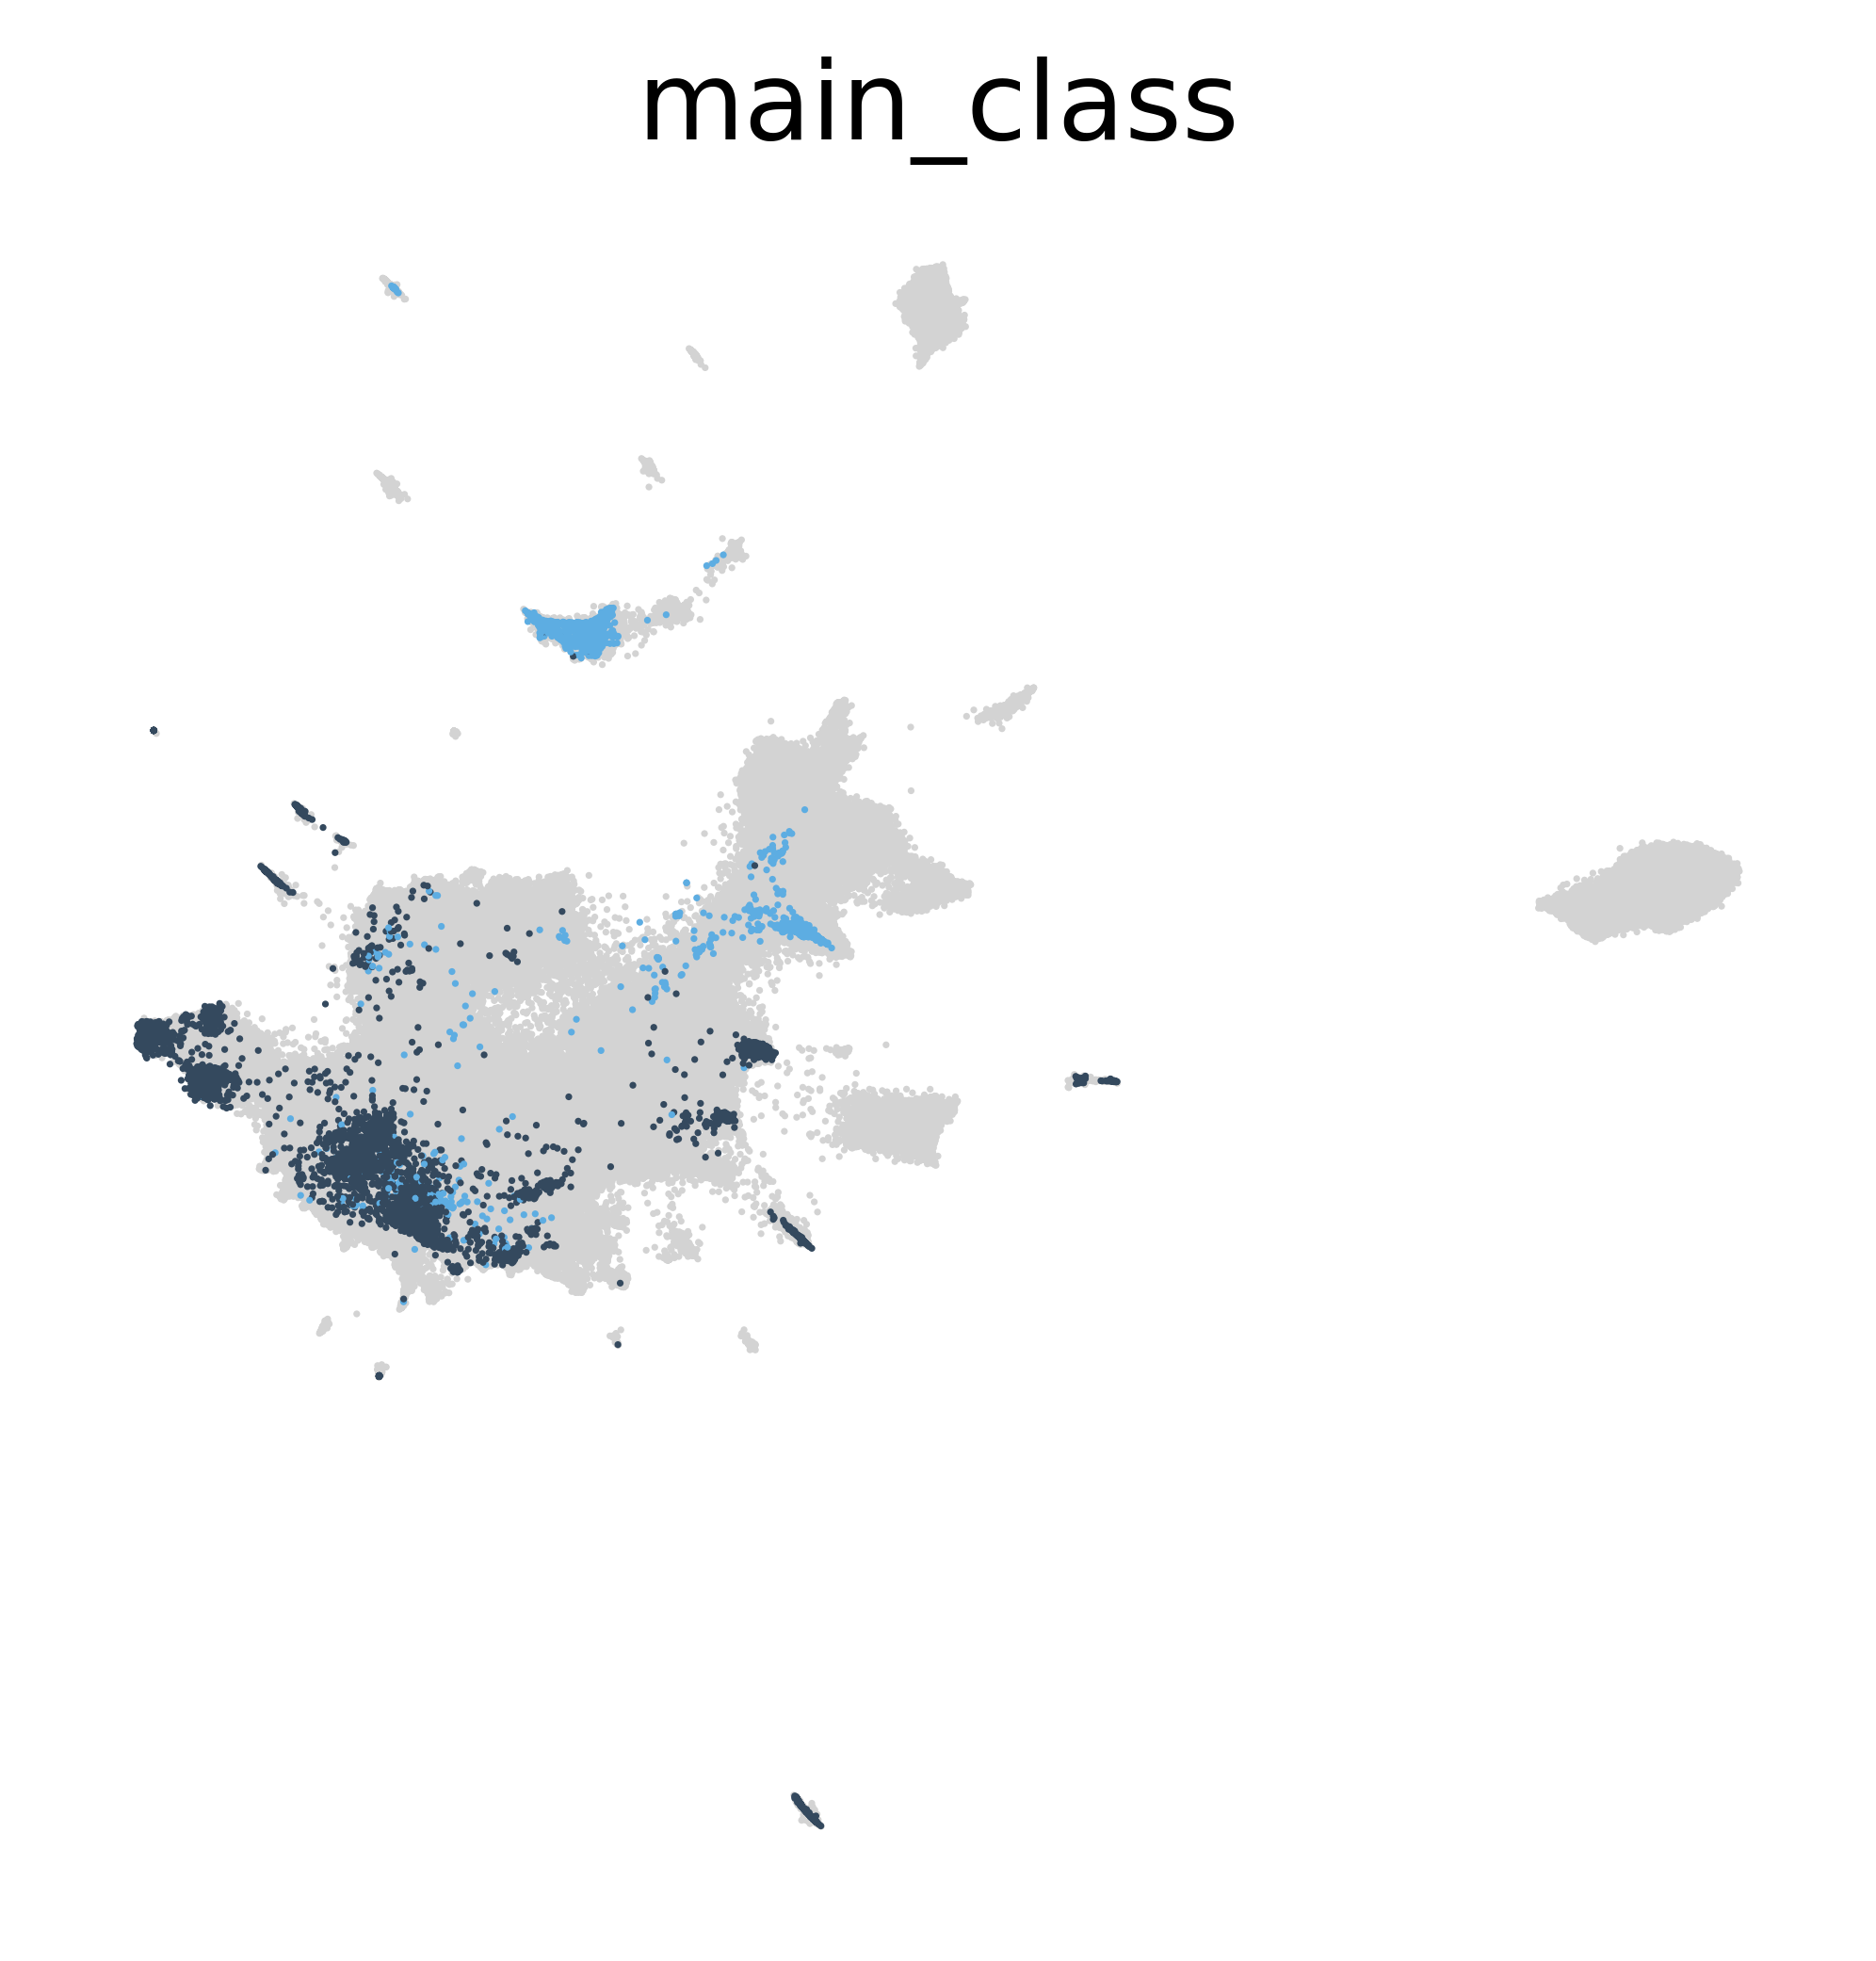

In [65]:
# Master mapping dictionary for both datasets

main_class_map = {
    # Glia
    'ALG_0': 'Glia',
    'EG_0': 'Glia',
    'EG_2': 'Glia',
    'EG_1': 'Glia',
    'ALG': 'Glia',
    'PG': 'Glia',
    'CXG': 'Glia',
    
    # Neurons (catch-all for neuronal subtypes)
    'nonPAM': 'Neuron',
    'y': 'Neuron',
    'ab': 'Neuron',
    'adPN': 'Neuron',
    'abp': 'Neuron',
    'dFB': 'Neuron',
    '5-HT': 'Neuron',
    'PAM': 'Neuron',
    'T4/T5': 'Neuron',
    'ring_1': 'Neuron',
    'ring_2': 'Neuron',
    'Tm1/TmY8': 'Neuron',
    'PB': 'Neuron',
    'T1': 'Neuron',
    'Mi1': 'Neuron',
    'clock': 'Neuron',
    'Tyr': 'Neuron',
    'Oct': 'Neuron',

    # Miscellaneous / Unknown
    'Unannotated': 'Unannotated'
}

import pandas as pd, scanpy as sc
# Canonical order (same for both)
MAIN_CLASSES = [
    'Photoreceptor','Cone','Glia','Fat','Epithelial','Hemocytes','Muscle','Neuron','Unannotated'
]

MAIN_COLORS = {
    'Photoreceptor': '#F4D03F',
    'Cone':          '#E67E22',
    'Glia':          '#5DADE2',
    'Fat':           '#F1948A',
    'Epithelial':    '#27AE60',
    'Hemocytes':     '#C0392B',
    'Muscle':        '#8E44AD',
    'Neuron':        '#34495E',
    'Unannotated':   '#BDC3C7',
}

def assign_main_class(adata, column_name):
    def _map(lbl):
        if pd.isna(lbl):
            return 'Unannotated'
        return main_class_map.get(lbl, 'Unannotated')
    adata.obs['main_class'] = adata.obs[column_name].apply(_map)
    # Force identical category set/order in both objects
    adata.obs['main_class'] = pd.Categorical(adata.obs['main_class'], categories=MAIN_CLASSES, ordered=False)
    # Store the palette in the same order as MAIN_CLASSES
    adata.uns['main_class_colors'] = [MAIN_COLORS[c] for c in MAIN_CLASSES]
    return adata

# Apply to both datasets (using your chosen source column for each)
adata_2 = assign_main_class(integrated_dopp_data.copy(), column_name='annotation')

# Ensure stable categories/colors across datasets
MAIN_CLASSES = ['Photoreceptor','Cone','Glia','Fat','Epithelial','Hemocytes','Muscle','Neuron','Unannotated']
adata_2.obs['main_class'] = pd.Categorical(adata_2.obs['main_class'].astype('object').fillna('Unannotated'),
                                           categories=MAIN_CLASSES, ordered=False)

# Build list of non-Unannotated groups actually present
keep = [c for c in MAIN_CLASSES if c != 'Unannotated' and (adata_2.obs['main_class'] == c).any()]

# 1) Unannotated first (background)
ax = sc.pl.umap(
    adata_2, color='main_class', groups=['Unannotated'],
    size=2, alpha=0.15, frameon=False, legend_loc=None, title='Dopp', show=False
)

# 2) Then overlay all other classes
sc.pl.umap(
    adata_2, color='main_class', groups=keep,
    size=3, alpha=1.0, frameon=False, legend_loc=None,
    ax=ax, show=True
)
